### Importing all the packages

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
#from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import balanced_accuracy_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_curve
from sklearn import metrics
from scipy import stats
import scikitplot as skplt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.simplefilter(action='ignore')

In [2]:
import os
os.listdir('C:\\Users\\Rideema Malji\\OneDrive\\Desktop\\Others\\Upwork\\model optimization\\')

['Decision_tree.png',
 'DT_acuracy.png',
 'Final deliverables',
 'Final deliverables.zip',
 'Final_deliverables_v2',
 'Final_deliverables_v2.zip',
 'financialdistress.xls',
 'Independent features.docx',
 'Interquantile_Geometric_classification.docx',
 'Simple_Statistical_method_for_classification.pdf',
 'Simple_Statistical_method_for_classification.pptx']

### Reading the Input file

In [3]:
#df=pd.read_csv('financialdistress.csv')
df = pd.read_excel ('C:\\Users\\Rideema Malji\\OneDrive\\Desktop\\Others\\Upwork\\model optimization\\financialdistress.xls', sheet_name='Sheet1')

In [4]:
%matplotlib inline

In [5]:
df.columns

Index(['Companies', 'MScore', 'MScore Binary', 'ROA', 'CR', 'QR', 'AccRT',
       'AccPT', 'InvT', 'AT', 'GPM', 'NPM', 'ROE', 'CCL', 'NPTA', 'NPTL',
       'DEQ', 'TLTA', 'EBITDAR', 'EBITDATA', 'WCTA', 'CTA', 'CTL', 'CATA',
       'CLTA', 'AR', 'AP', 'EBITDA', 'Rating', 'R_Score', 'EV', 'MarketCap',
       'Rev_G', 'NI_G', 'D_G', 'CG_Score', 'ARO', 'BoardS', 'ShareR', 'Comp'],
      dtype='object')

In [6]:
###Analysing the dependent variable first####

Text(0.5, 1.0, 'First glance of the MScore')

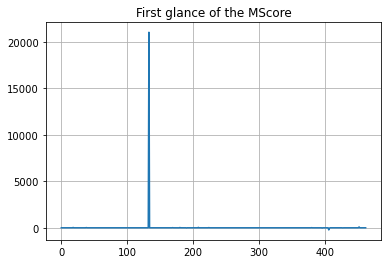

In [7]:
plt.plot(df['MScore'].values)    ####Based on the visualisation I see visual outliers so lets try to remove them and see if we have any impact on shape of dataset
plt.grid(True)
df_new=df.loc[(df['MScore']<40) & (df['MScore']>-40)] ###Static thresholds values
plt.title('First glance of the MScore')

In [8]:
df

Companies    MScore  MScore Binary       ROA        CR        QR  \
0       ENB.TO -3.139361              0  0.036651  0.491470  0.399857   
1     BAM-A.TO -2.844616              0  0.010143  0.864695  0.733200   
2        CP.TO  0.269938              1  0.041832  0.427984  0.353593   
3       CNQ.TO -3.755082              0  0.099967  0.800593  0.592024   
4       NTR.TO -3.145775              0  0.063118  1.112754  0.604195   
..         ...       ...            ...       ...       ...       ...   
458      NVI.V -3.304670              0 -0.012543  0.929688  0.690223   
459      TTZ.V -3.392792              0  0.155359  7.861406  7.303970   
460      CHN.V -3.872002              0  0.033698  1.077998  1.077998   
461  RCG-PB.TO -0.576305              1 -0.009094  1.095585  1.095585   
462   AX-PE.TO -3.449364              0  0.085047  0.356267  0.290368   

          AccRT        AccPT        InvT        AT  ...            EV  \
0     47.928980    34.661469   18.724274  0.278751  ...  1.825730e+11   
1     77.587382   140.426510   48.801641  0.193684  ...  2.675664e+11   
2     37.390244     0.000000   24.019882  0.117268  ...  8.257092e+10   
3     34.562458     8.921136   25.363379  0.428540  ...  9.231347e+10   
4     70.676602     0.000000  126.193520  0.554750  ...  6.134212e+10   
..          ...          ...         ...       ...  ...           ...   
458   56.987813    78.922903  157.862108  0.761088  ...  6.397385e+06   
459   35.066274    27.650878   70.104428  0.443488  ...  1.995745e+06   
460  150.042592    85.394251    0.000000  1.028721  ...  3.538023e+06   
461  842.774588  1819.352549    0.000000  0.148248  ... -4.007280e+08   
462   13.493286    31.977383  126.352180  0.091673  ...  1.744164e+09   

        MarketCap     Rev_G       NI_G       D_G  CG_Score  ARO  BoardS  \
0    1.072190e+11  0.204262   0.840321  0.130693       6.0  3.0     9.0   
1    1.043284e+11  0.206830  30.597015  0.123276       8.0  4.0     6.0   
2    6.251292e+10  0.036965   0.166939  0.996330       1.0  1.0     1.0   
3    7.677947e+10  0.878337  18.618391 -0.241225       7.0  4.0     8.0   
4    5.099512e+10  0.325426   5.869281  0.078024       2.0  1.0     2.0   
..            ...       ...        ...       ...       ...  ...     ...   
458  4.010435e+06  0.447050   0.935005 -0.111403       NaN  NaN     NaN   
459  3.495102e+06  0.152444   0.892480 -0.092201       NaN  NaN     NaN   
460  4.736498e+06 -0.209263   1.513089  0.027204       NaN  NaN     NaN   
461  0.000000e+00  3.343881  -1.701012 -0.147397       NaN  NaN     NaN   
462  0.000000e+00 -0.085894  17.065033 -0.179926       7.0  8.0     7.0   

     ShareR  Comp  
0       4.0   3.0  
1       9.0   6.0  
2       1.0   1.0  
3       7.0   1.0  
4       4.0   5.0  
..      ...   ...  
458     NaN   NaN  
459     NaN   NaN  
460     NaN   NaN  
461     NaN   NaN  
462     1.0  10.0  

[463 rows x 40 columns]

In [9]:
df_new.shape

(457, 40)

In [10]:
%matplotlib inline

Text(0.5, 1.0, 'We see some sensible data here , we can consider this base data')

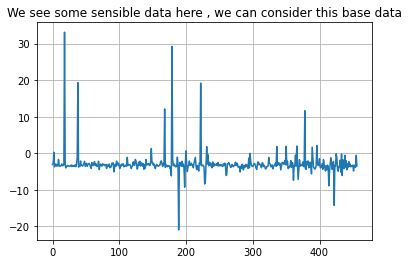

In [11]:
plt.plot(df_new['MScore'].values)
plt.grid(True)
plt.title('We see some sensible data here , we can consider this base data')

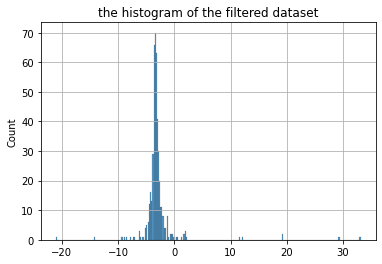

In [12]:
sns.histplot(df_new['MScore'].values)
plt.title('the histogram of the filtered dataset') #####So when we removed the ouliers based on the visual study , we got the results which has following data distribution ===> Left skewed gaussian distribution
plt.grid(True)

In [13]:
#####Lets seperate the outliers first and train the Normal data ahead, we can have different generative model on ouliered dat

In [14]:
signal_under_observation=df_new['MScore']

In [15]:
Q1 = np.percentile(signal_under_observation , 25)
Q3 = np.percentile(signal_under_observation , 75)
# method 2.
Q1,Q3 = np.percentile(signal_under_observation , [25,75])  

IQR = Q3 - Q1
ul = Q3+0.8*IQR  ####muliplication factors are set as per the data analysis
ll = Q1-4*IQR    ####muliplication factors are set as per the data analysis

outliers = signal_under_observation[(signal_under_observation > ul) | (signal_under_observation < ll)]
outliers

2       0.269938
9      -1.716216
18     33.117717
37     -1.193099
38     19.310621
         ...    
438    -0.244356
440    -1.814596
443    -0.576477
445    -2.077997
461    -0.576305
Name: MScore, Length: 63, dtype: float64

In [16]:
df_new['MScore Binary'].value_counts()

0    403
1     54
Name: MScore Binary, dtype: int64

In [17]:
df_new.loc[outliers.index]['MScore Binary'].value_counts()

1    54
0     9
Name: MScore Binary, dtype: int64

In [18]:
outliers_df=df_new.loc[outliers.index]
outliers_df_1=outliers_df.loc[df_new['MScore Binary']==1]['MScore']
outliers_df_0=outliers_df.loc[df_new['MScore Binary']==0]['MScore']

In [19]:
%matplotlib inline

Text(0.5, 1.0, 'Detection of Mscore Binary of 1 and 0')

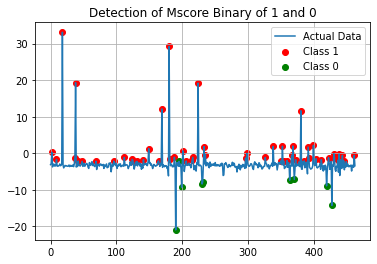

In [20]:
###Lets visualize these outliers##
plt.plot(df_new['MScore'])
plt.scatter(outliers_df_1.index,outliers_df_1.values,color='red')
plt.scatter(outliers_df_0.index,outliers_df_0.values,color='green')
plt.grid('True')
plt.legend(['Actual Data','Class 1','Class 0'])
plt.title('Detection of Mscore Binary of 1 and 0')

In [21]:
####The total number of outliers are 63 , 63/457 ~ 13% of total dataset ####
df_new.drop(outliers.index,inplace=True)
df_new.reset_index(drop=True,inplace=True)

In [22]:
c1=df_new.loc[df_new['MScore Binary']==1]

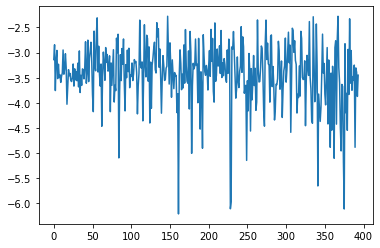

In [23]:
plt.plot(df_new['MScore'].values)  #####Lets work on these MScores they are uniform in nature
plt.scatter(c1.index,c1['MScore'].values,color='red')

<AxesSubplot:ylabel='Count'>

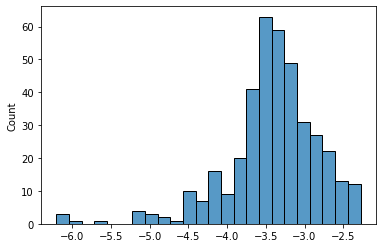

In [24]:
sns.histplot(df_new['MScore'].values)  ####A skewed gaussian distribuion after removing the outliers from original dataset

In [25]:
df_new['MScore Binary'].value_counts() ####removed outliers dataset  All the Binary score of 1 are removed

0    394
Name: MScore Binary, dtype: int64

In [26]:
df_new_c1=df_new.loc[df_new['MScore Binary']==0]
df_new_c2=df_new.loc[df_new['MScore Binary']==1]

In [28]:
%matplotlib inline

<AxesSubplot:>

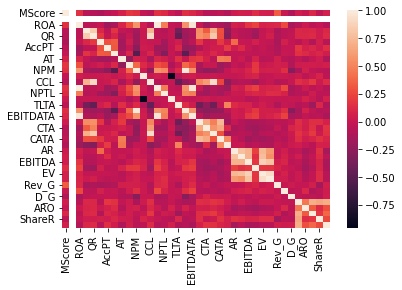

In [29]:
sns.heatmap(df_new.corr()) #####Are there any specific feature which can help us generating the gaussianmixture model for class 0

In [30]:
df_log=df.copy()

In [32]:
df=df_new.copy()  ###Making a copy for running the next results as it is###

In [34]:
df.head(10)

Companies    MScore  MScore Binary       ROA         CR         QR  \
0    ENB.TO -3.139361              0  0.036651   0.491470   0.399857   
1  BAM-A.TO -2.844616              0  0.010143   0.864695   0.733200   
2    CNQ.TO -3.755082              0  0.099967   0.800593   0.592024   
3    NTR.TO -3.145775              0  0.063118   1.112754   0.604195   
4    ATD.TO -2.956788              0  0.090678   1.217852   0.818510   
5     SU.TO -3.517070              0  0.049189   1.055582   0.660352   
6   SHOP.TO -3.231686              0  0.218487  12.151585  12.151585   
7    WCN.TO -3.497346              0  0.042044   0.837786   0.837786   
8    CSU.TO -3.441699              0  0.053763   0.745632   0.731410   
9    NGT.TO -3.593046              0  0.028745   2.899774   2.226451   

       AccRT       AccPT        InvT        AT  ...            EV  \
0  47.928980   34.661469   18.724274  0.278751  ...  1.825730e+11   
1  77.587382  140.426510   48.801641  0.193684  ...  2.675664e+11   
2  34.562458    8.921136   25.363379  0.428540  ...  9.231347e+10   
3  70.676602    0.000000  126.193520  0.554750  ...  6.134212e+10   
4  15.008550   21.598434   16.930669  2.122558  ...  7.148077e+10   
5  43.484361   60.656113   76.378494  0.467309  ...  6.994020e+10   
6  52.864445   22.477642    0.000000  0.345712  ...  1.318688e+11   
7  42.105984   23.311397    0.000000  0.418462  ...  4.668530e+10   
8  60.178187   59.463481   24.013158  0.885709  ...  4.488103e+10   
9  10.064228   15.469645   84.075148  0.301302  ...  6.236159e+10   

      MarketCap     Rev_G       NI_G       D_G  CG_Score  ARO  BoardS  ShareR  \
0  1.072190e+11  0.204262   0.840321  0.130693       6.0  3.0     9.0     4.0   
1  1.043284e+11  0.206830  30.597015  0.123276       8.0  4.0     6.0     9.0   
2  7.677947e+10  0.878337  18.618391 -0.241225       7.0  4.0     8.0     7.0   
3  5.099512e+10  0.325426   5.869281  0.078024       2.0  1.0     2.0     4.0   
4  6.418477e+10  0.372591  -0.008206 -0.016882       8.0  4.0     6.0    10.0   
5  5.379120e+10  0.586733   1.953693 -0.154155       3.0  3.0     1.0     4.0   
6  1.331983e+11  0.574286   8.122306  0.285457       9.0  9.0     5.0     9.0   
7  4.161857e+10  0.129521   2.019621  0.094333       3.0  5.0     4.0     5.0   
8  4.425703e+10  0.286722  -0.288991  1.646947      10.0  8.0    10.0     7.0   
9  6.105159e+10  0.063060  -0.587840  0.044935       1.0  8.0     2.0     5.0   

   Comp  
0   3.0  
1   6.0  
2   1.0  
3   5.0  
4   3.0  
5   5.0  
6   9.0  
7   1.0  
8   9.0  
9   1.0  

[10 rows x 40 columns]

In [40]:
df['MScore Binary'].value_counts()   ###It is highly imbalanced dataset 

0    394
Name: MScore Binary, dtype: int64

### Dropping Companies and MScore from the data-

Dropping companies because It is transactional information and will not help to predict Dependent Variable "MScore Binary"

Dropping MScore because It has been used to drive Dependent Variable "MScore Binary"

In [41]:
drop_columns1= ['Companies','MScore']

df = df.drop(drop_columns1, axis = 1)

In [42]:
df.tail(10)

MScore Binary       ROA        CR        QR       AccRT       AccPT  \
384              0 -0.219433  2.328511  1.460431   77.264600   91.287378   
385              0 -0.029839  1.257295  1.257295  145.828605   18.615405   
386              0  0.124424  2.281931  1.880841   36.165904    0.000000   
387              0  0.014719  0.542049  0.477460   61.345260   61.087028   
388              0 -0.045305  1.610326  1.545040  100.461657    0.000000   
389              0 -0.095475  0.510201  0.413636    8.729595  129.399913   
390              0 -0.012543  0.929688  0.690223   56.987813   78.922903   
391              0  0.155359  7.861406  7.303970   35.066274   27.650878   
392              0  0.033698  1.077998  1.077998  150.042592   85.394251   
393              0  0.085047  0.356267  0.290368   13.493286   31.977383   

           InvT        AT        GPM        NPM  ...            EV  \
384  143.254406  1.365185  34.882671 -16.073474  ...  1.343774e+07   
385    0.000000  0.977621  76.612535  -3.052240  ...  4.382240e+06   
386  111.162034  0.958964  61.304348  12.974828  ...  6.912226e+06   
387   15.141513  1.806412  39.693274   0.814803  ...  3.402773e+07   
388    5.784522  1.895325  10.358447  -2.390332  ...  1.809366e+08   
389   15.534517  1.696008   2.901459  -5.629373  ...  9.263160e+06   
390  157.862108  0.761088  46.201534  -1.648091  ...  6.397385e+06   
391   70.104428  0.443488  55.042845  35.031097  ...  1.995745e+06   
392    0.000000  1.028721  49.456853   3.275731  ...  3.538023e+06   
393  126.352180  0.091673  56.683091  92.771377  ...  1.744164e+09   

       MarketCap     Rev_G       NI_G       D_G  CG_Score  ARO  BoardS  \
384  11133978.60  0.308754   0.624117  0.046451       NaN  NaN     NaN   
385   8636240.00 -0.090030   0.684848 -0.396088       NaN  NaN     NaN   
386   8758225.62  0.178533   0.262806 -0.538462       NaN  NaN     NaN   
387  29371720.00 -0.081981   1.130156  0.155016       NaN  NaN     NaN   
388   5499633.40 -0.009460  -3.662471 -0.014233       NaN  NaN     NaN   
389   8472160.00 -0.072205   0.156098  0.090966       NaN  NaN     NaN   
390   4010435.16  0.447050   0.935005 -0.111403       NaN  NaN     NaN   
391   3495101.96  0.152444   0.892480 -0.092201       NaN  NaN     NaN   
392   4736498.30 -0.209263   1.513089  0.027204       NaN  NaN     NaN   
393         0.00 -0.085894  17.065033 -0.179926       7.0  8.0     7.0   

     ShareR  Comp  
384     NaN   NaN  
385     NaN   NaN  
386     NaN   NaN  
387     NaN   NaN  
388     NaN   NaN  
389     NaN   NaN  
390     NaN   NaN  
391     NaN   NaN  
392     NaN   NaN  
393     1.0  10.0  

[10 rows x 38 columns]

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MScore Binary  394 non-null    int64  
 1   ROA            394 non-null    float64
 2   CR             394 non-null    float64
 3   QR             394 non-null    float64
 4   AccRT          394 non-null    float64
 5   AccPT          394 non-null    float64
 6   InvT           394 non-null    float64
 7   AT             394 non-null    float64
 8   GPM            394 non-null    float64
 9   NPM            394 non-null    float64
 10  ROE            394 non-null    float64
 11  CCL            394 non-null    float64
 12  NPTA           394 non-null    float64
 13  NPTL           394 non-null    float64
 14  DEQ            394 non-null    float64
 15  TLTA           394 non-null    float64
 16  EBITDAR        394 non-null    float64
 17  EBITDATA       394 non-null    float64
 18  WCTA      

In [92]:
df.shape

(394, 17)

In [45]:
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(394, 38)
(394, 38)


In [46]:
df.describe().transpose()

count          mean           std           min           25%  \
MScore Binary  394.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
ROA            394.0  2.916894e-03  2.060137e-01 -1.832157e+00 -2.632196e-02   
CR             394.0  2.563401e+00  3.936003e+00  5.612813e-02  9.555116e-01   
QR             394.0  1.956333e+00  2.724123e+00  3.775745e-02  6.958018e-01   
AccRT          394.0  8.164154e+01  1.545021e+02  0.000000e+00  3.024037e+01   
AccPT          394.0  5.274739e+01  7.940016e+01  0.000000e+00  1.638092e+01   
InvT           394.0  1.466654e+02  9.947775e+02  0.000000e+00  0.000000e+00   
AT             394.0  5.999688e-01  5.225030e-01  1.023208e-02  2.097362e-01   
GPM            394.0  3.949128e+01  2.946078e+01 -1.930245e+02  2.322721e+01   
NPM            394.0 -8.505560e+00  1.583652e+02 -2.156485e+03 -5.533167e+00   
ROE            394.0 -9.527209e-01  2.025419e+01 -4.002222e+02 -3.684673e-02   
CCL            394.0  1.112908e+00  2.214625e+00  0.000000e+00  1.064337e-01   
NPTA           394.0  2.916894e-03  2.060137e-01 -1.832157e+00 -2.632196e-02   
NPTL           394.0  1.476730e-02  1.144686e+00 -6.469465e+00 -4.839544e-02   
DEQ            394.0  3.459862e+00  9.852280e+01 -6.662941e+02  9.457732e-02   
TLTA           394.0  5.321755e-01  2.768809e-01  7.311451e-03  3.510461e-01   
EBITDAR        394.0  1.418105e-01  1.517328e+00 -2.037100e+01  7.103283e-02   
EBITDATA       394.0  8.422662e-02  2.056966e-01 -1.694820e+00  4.445165e-02   
WCTA           394.0  1.326467e-01  2.096511e-01 -5.271415e-01 -7.016978e-03   
CTA            394.0  1.196893e-01  1.530742e-01  0.000000e+00  1.824522e-02   
CTL            394.0  5.650294e-01  1.600764e+00  0.000000e+00  2.819939e-02   
CATA           394.0  3.315859e-01  2.410933e-01  2.587468e-03  1.312633e-01   
CLTA           394.0  1.989392e-01  1.639344e-01  3.480701e-03  8.377098e-02   
AR             394.0  4.019669e+08  1.306171e+09  0.000000e+00  1.108379e+07   
AP             394.0  3.291845e+08  1.656007e+09  0.000000e+00  5.047197e+06   
EBITDA         394.0  6.443799e+08  1.903286e+09 -1.742816e+09  1.091286e+07   
R_Score        394.0  4.177665e+00  6.683759e-01  2.000000e+00  4.000000e+00   
EV             394.0  6.562873e+09  2.045377e+10 -4.311252e+08  2.634054e+08   
MarketCap      394.0  4.636645e+09  1.328048e+10  0.000000e+00  2.215933e+08   
Rev_G          394.0  2.356205e-01  3.719559e-01 -9.041387e-01  1.057568e-02   
NI_G           394.0  2.632904e+00  1.471778e+01 -3.058423e+01 -2.827542e-01   
D_G            394.0  3.840229e-01  2.513648e+00 -1.000000e+00 -1.621769e-01   
CG_Score       220.0  5.395455e+00  2.824061e+00  1.000000e+00  3.000000e+00   
ARO            220.0  5.527273e+00  2.732216e+00  1.000000e+00  3.000000e+00   
BoardS         220.0  5.381818e+00  2.794260e+00  1.000000e+00  3.000000e+00   
ShareR         220.0  4.881818e+00  2.980092e+00  1.000000e+00  2.000000e+00   
Comp           220.0  5.350000e+00  2.836528e+00  1.000000e+00  3.000000e+00   

                        50%           75%           max  
MScore Binary  0.000000e+00  0.000000e+00  0.000000e+00  
ROA            3.331128e-02  7.250124e-02  8.461594e-01  
CR             1.548694e+00  2.833282e+00  4.966856e+01  
QR             1.148625e+00  1.995286e+00  2.289885e+01  
AccRT          5.006038e+01  8.084777e+01  1.677620e+03  
AccPT          3.327075e+01  6.345642e+01  8.139187e+02  
InvT           4.474141e+01  1.030218e+02  1.897107e+04  
AT             4.440773e-01  8.315567e-01  3.807305e+00  
GPM            3.834542e+01  5.835024e+01  9.828897e+01  
NPM            5.664797e+00  1.678616e+01  4.502972e+02  
ROE            7.877057e-02  1.611172e-01  2.788235e+01  
CCL            3.784169e-01  1.101402e+00  1.786524e+01  
NPTA           3.331128e-02  7.250124e-02  8.461594e-01  
NPTL           5.834356e-02  1.601988e-01  1.639842e+01  
DEQ            4.575249e-01  1.120769e+00  1.835889e+03  
TLTA           5.208947e-01  6.784896e-01  1.7

# Performing EDA

### Checking the Null Values- Five variables 'CG_Score','ARO','BoardS','ShareR','Comp' contains most of null values, So we are dropping these.

In [47]:
df.isnull().sum()

MScore Binary      0
ROA                0
CR                 0
QR                 0
AccRT              0
AccPT              0
InvT               0
AT                 0
GPM                0
NPM                0
ROE                0
CCL                0
NPTA               0
NPTL               0
DEQ                0
TLTA               0
EBITDAR            0
EBITDATA           0
WCTA               0
CTA                0
CTL                0
CATA               0
CLTA               0
AR                 0
AP                 0
EBITDA             0
Rating             0
R_Score            0
EV                 0
MarketCap          0
Rev_G              0
NI_G               0
D_G                0
CG_Score         174
ARO              174
BoardS           174
ShareR           174
Comp             174
dtype: int64

In [48]:
# Dropping these variables as their most of the data is NULL
drop_columns1= ['CG_Score','ARO','BoardS','ShareR','Comp']
df = df.drop(drop_columns1, axis = 1)

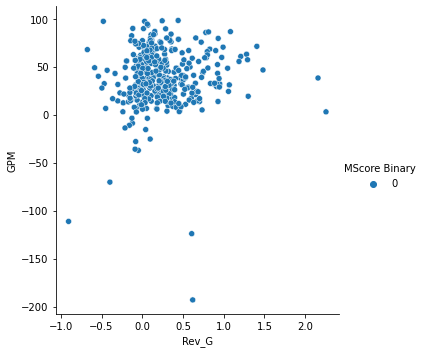

In [49]:
sns.relplot(x="Rev_G", y="GPM", hue="MScore Binary",data=df);  ###We can now at least see the outliers on the edge are 1 

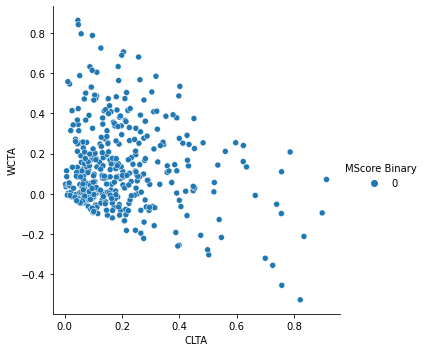

In [50]:
sns.relplot(x="CLTA", y="WCTA", hue="MScore Binary",data=df);   ###We can see the outliers on the edge are 1

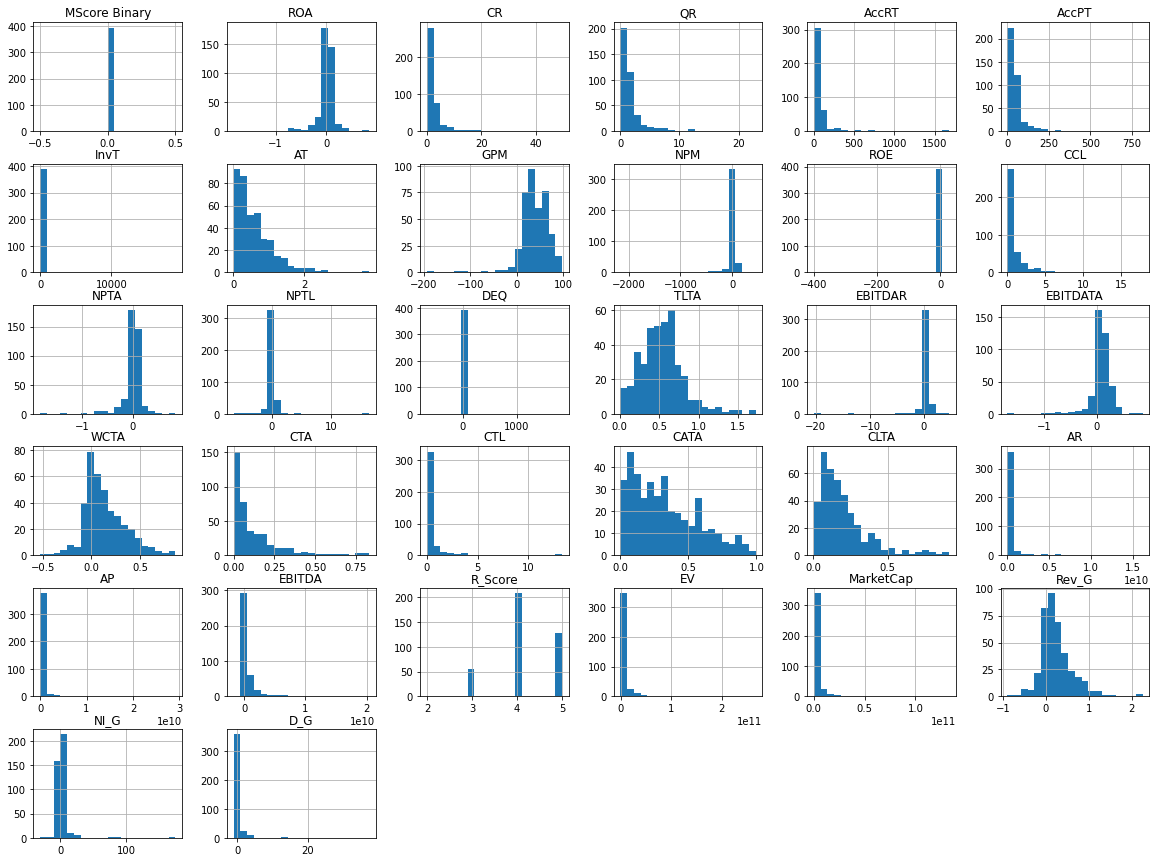

In [51]:
%matplotlib inline
df.hist(bins=20, figsize=(20,15))
plt.show()

### Log Transformation of Right skewed Variables

In [52]:
log_var = ['CR','QR','AT','ROE','CATA','CLTA','EBITDA','EV','Rev_G','NI_G']

log_var = ['CR','QR','AT','R_Score','EV']

#fig = plt.figure (figsize = (24,18))
for j in range (len (log_var)) :
    var = log_var[j]
    transformed = "log_"+ var
    transformed =  var
    df[transformed] = np.log(df[var])
    df[transformed] = np.sqrt(df[var]+1)
    #sub = fig.add_subplot(5, 5, j + 1)
#    sub.set_xlabel(var)
#    df[transformed].plot (kind ='hist')

In [53]:
df['Rating'].unique()

array(['A+', 'S-', 'B', 'B+', 'A', 'A-', 'B-', 'C+'], dtype=object)

In [54]:
#df.drop(['Companies'],axis=True,inplace=True)

In [55]:
#####Using standard scaler transformation#######3
df['Rating'] = df['Rating'].replace({"B-": "B","C+": "B","S": "B"})######Alreadt given logic###
df['Rating'].replace({'A+':9,'A':8,'A-':7,'B+':6,'B':5,'B-':4,'C+':3,'S':2,'S-':1},inplace=True)

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(df)
df_cluster = mms.transform(df)
df_cluster=pd.DataFrame(df_cluster,columns=df.columns)
df_cluster.index=df.index
df=df_cluster

In [56]:
df

MScore Binary       ROA        CR        QR     AccRT     AccPT  \
0              0.0  0.697755  0.136512  0.089860  0.028570  0.042586   
1              0.0  0.687858  0.335448  0.372616  0.046248  0.172531   
2              0.0  0.721395  0.313486  0.299189  0.020602  0.010961   
3              0.0  0.707637  0.401167  0.306808  0.042129  0.000000   
4              0.0  0.717927  0.422825  0.405924  0.008946  0.026536   
..             ...       ...       ...       ...       ...       ...   
389            0.0  0.648423  0.153866  0.117878  0.005204  0.158984   
390            0.0  0.679387  0.355224  0.353200  0.033969  0.096967   
391            0.0  0.742076  0.760538  0.841436  0.020902  0.033973   
392            0.0  0.696652  0.393344  0.480349  0.089438  0.104917   
393            0.0  0.715824       NaN       NaN  0.008043  0.039288   

         InvT        AT       GPM       NPM  ...        AR        AP  \
0    0.000987       NaN  0.768468  0.832303  ...  0.383961  0.153418   
1    0.002572       NaN  0.715775  0.829268  ...  1.000000  1.000000   
2    0.001337  0.244998  0.773114  0.836208  ...  0.193254  0.027560   
3    0.006652  0.411009  0.779151  0.831624  ...  0.333333  0.000000   
4    0.000892  0.864107  0.722745  0.828898  ...  0.160436  0.127564   
..        ...       ...       ...       ...  ...       ...       ...   
389  0.000819  0.805969  0.672561  0.825100  ...  0.000027  0.000224   
390  0.008321  0.551479  0.821198  0.826627  ...  0.000070  0.000053   
391  0.003695  0.272636  0.851548  0.840698  ...  0.000010  0.000005   
392  0.000000  0.658571  0.832373  0.828516  ...  0.000190  0.000060   
393  0.006660       NaN  0.857178  0.862848  ...  0.000963  0.001261   

       EBITDA  Rating   R_Score        EV  MarketCap     Rev_G      NI_G  \
0    0.720483   1.000  1.000000  0.971516   0.804958  0.350878  0.152998   
1    1.000000   0.000  1.000000  1.000000   0.783256  0.351691  0.297875   
2    0.819469   1.000  0.775240  0.920187   0.576430  0.564265  0.239554   
3    0.382753   1.000  1.000000  0.889104   0.382851  0.389234  0.177482   
4    0.317780   1.000  1.000000  0.900765   0.481874  0.404165  0.148866   
..        ...     ...       ...       ...        ...       ...       ...   
389  0.078957   0.500  0.469335  0.147719   0.000064  0.263359  0.149666   
390  0.079008   0.500  0.469335  0.112728   0.000030  0.427736  0.153459   
391  0.078969   0.875  0.775240  0.000000   0.000026  0.334475  0.153252   
392  0.078975   0.500  0.000000  0.055918   0.000036  0.219972  0.156273   
393  0.099745   0.625  0.469335  0.607217   0.000000  0.259026  0.231991   

          D_G  
0    0.029586  
1    0.029392  
2    0.019854  
3    0.028208  
4    0.025725  
..        ...  
389  0.028547  
390  0.023251  
391  0.023754  
392  0.026878  
393  0.021458  

[394 rows x 33 columns]

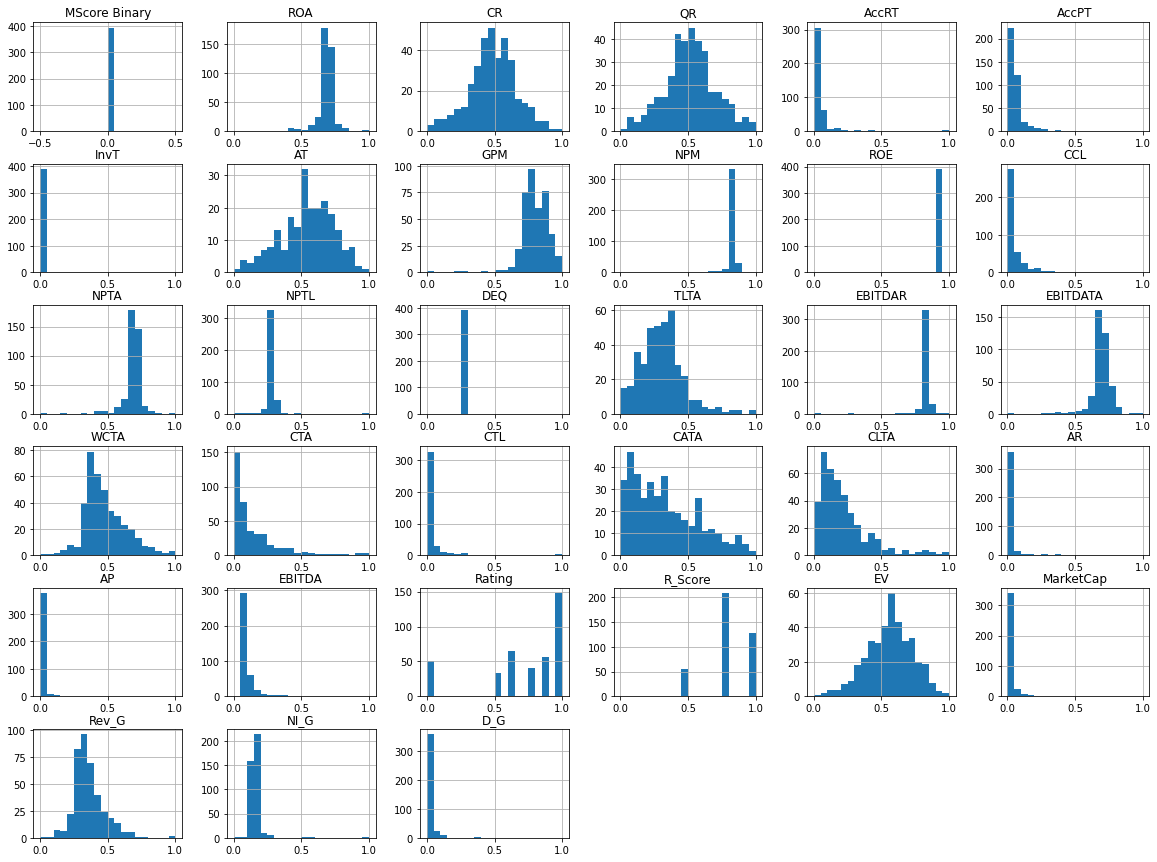

In [58]:
%matplotlib inline
df.hist(bins=20, figsize=(20,15))
plt.show()

# Was build earlier when i was not thinking of generating any generative model

In [59]:
###Representing the values of ratings in quantitative way#####   
####Instead of imputing the values with median we can use knn imputer####
from sklearn.impute import KNNImputer
imputer =KNNImputer(n_neighbors=2)
knn_raw_data_numeric=imputer.fit_transform(df)
knn_raw_data_numeric=pd.DataFrame(knn_raw_data_numeric,columns=df.columns)
knn_raw_data_numeric.index=df.index
df=knn_raw_data_numeric.copy()

In [60]:
# Replacing Missing values with Median of that column
##cols_mean = ['AT','EV']
#for col1 in cols_mean:
#    df[col1]= df[col1].fillna(df[col1].mean())

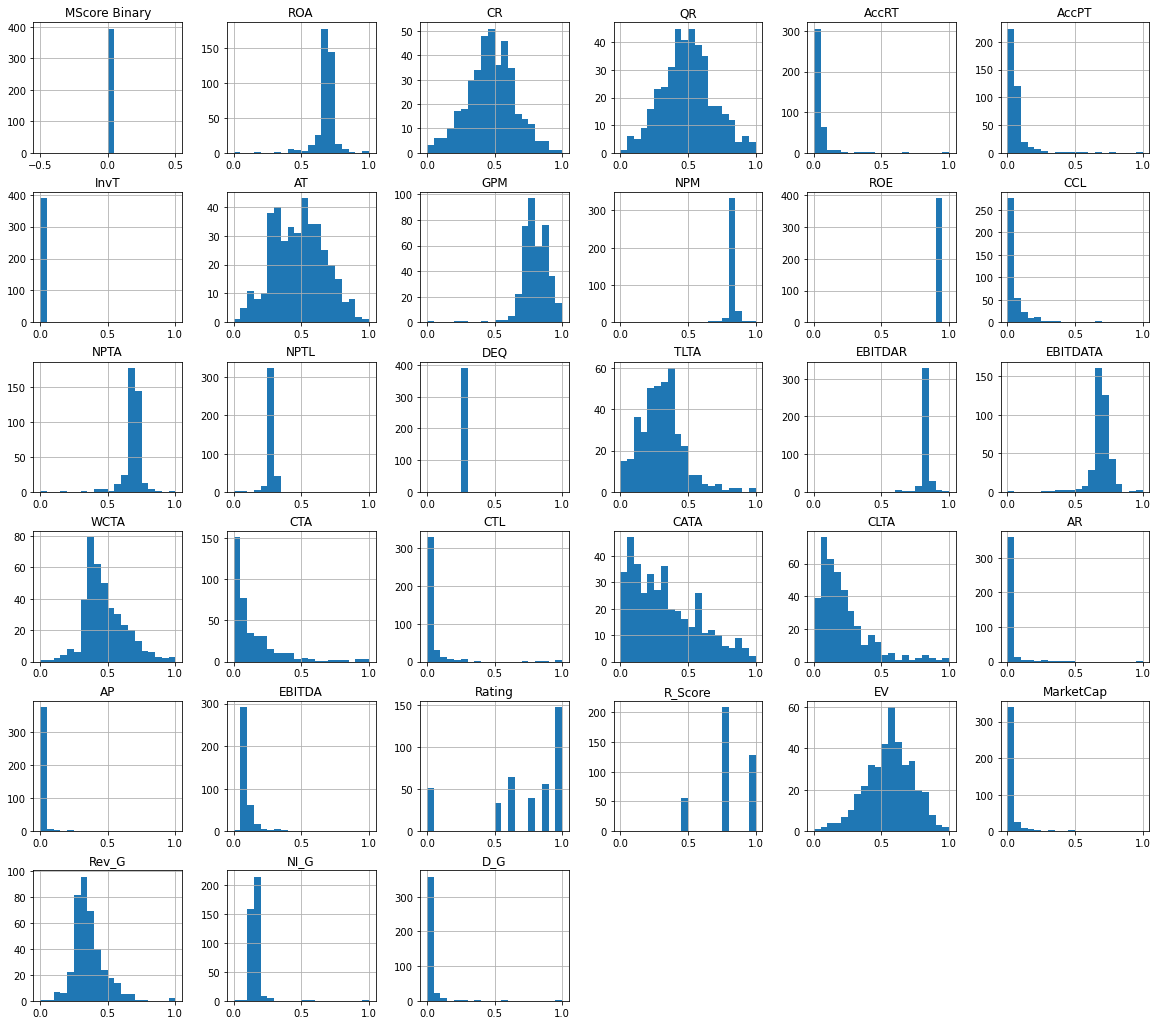

In [61]:
%matplotlib inline
df.hist(bins=20, figsize=(20,18))
plt.show()

In [62]:
###Applying MinMaxScaler for better results###########

In [63]:
df

MScore Binary       ROA        CR        QR     AccRT     AccPT  \
0              0.0  0.697755  0.136512  0.089860  0.028570  0.042586   
1              0.0  0.687858  0.335448  0.372616  0.046248  0.172531   
2              0.0  0.721395  0.313486  0.299189  0.020602  0.010961   
3              0.0  0.707637  0.401167  0.306808  0.042129  0.000000   
4              0.0  0.717927  0.422825  0.405924  0.008946  0.026536   
..             ...       ...       ...       ...       ...       ...   
389            0.0  0.648423  0.153866  0.117878  0.005204  0.158984   
390            0.0  0.679387  0.355224  0.353200  0.033969  0.096967   
391            0.0  0.742076  0.760538  0.841436  0.020902  0.033973   
392            0.0  0.696652  0.393344  0.480349  0.089438  0.104917   
393            0.0  0.715824  0.422091  0.452881  0.008043  0.039288   

         InvT        AT       GPM       NPM  ...        AR        AP  \
0    0.000987  0.277652  0.768468  0.832303  ...  0.383961  0.153418   
1    0.002572  0.536756  0.715775  0.829268  ...  1.000000  1.000000   
2    0.001337  0.244998  0.773114  0.836208  ...  0.193254  0.027560   
3    0.006652  0.411009  0.779151  0.831624  ...  0.333333  0.000000   
4    0.000892  0.864107  0.722745  0.828898  ...  0.160436  0.127564   
..        ...       ...       ...       ...  ...       ...       ...   
389  0.000819  0.805969  0.672561  0.825100  ...  0.000027  0.000224   
390  0.008321  0.551479  0.821198  0.826627  ...  0.000070  0.000053   
391  0.003695  0.272636  0.851548  0.840698  ...  0.000010  0.000005   
392  0.000000  0.658571  0.832373  0.828516  ...  0.000190  0.000060   
393  0.006660  0.456859  0.857178  0.862848  ...  0.000963  0.001261   

       EBITDA  Rating   R_Score        EV  MarketCap     Rev_G      NI_G  \
0    0.720483   1.000  1.000000  0.971516   0.804958  0.350878  0.152998   
1    1.000000   0.000  1.000000  1.000000   0.783256  0.351691  0.297875   
2    0.819469   1.000  0.775240  0.920187   0.576430  0.564265  0.239554   
3    0.382753   1.000  1.000000  0.889104   0.382851  0.389234  0.177482   
4    0.317780   1.000  1.000000  0.900765   0.481874  0.404165  0.148866   
..        ...     ...       ...       ...        ...       ...       ...   
389  0.078957   0.500  0.469335  0.147719   0.000064  0.263359  0.149666   
390  0.079008   0.500  0.469335  0.112728   0.000030  0.427736  0.153459   
391  0.078969   0.875  0.775240  0.000000   0.000026  0.334475  0.153252   
392  0.078975   0.500  0.000000  0.055918   0.000036  0.219972  0.156273   
393  0.099745   0.625  0.469335  0.607217   0.000000  0.259026  0.231991   

          D_G  
0    0.029586  
1    0.029392  
2    0.019854  
3    0.028208  
4    0.025725  
..        ...  
389  0.028547  
390  0.023251  
391  0.023754  
392  0.026878  
393  0.021458  

[394 rows x 33 columns]

## Performing Correlation Test

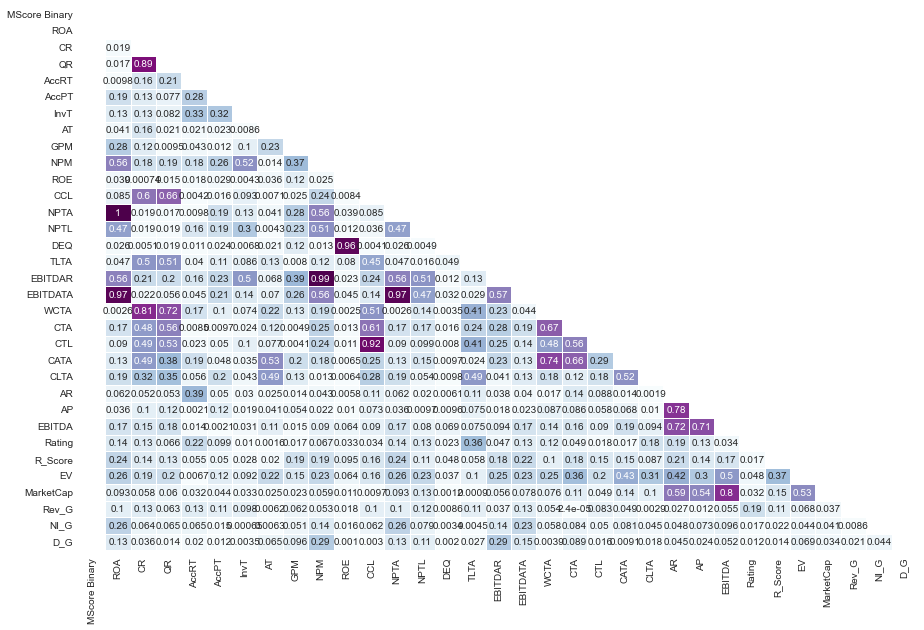

In [64]:
##Check for multicollinearity

#Plotting the Correlation Matrix

def correlation_plot(df):
    
    corr = abs(df.corr()) 
    lower_triangle = np.tril(corr, k = -1) 
    mask = lower_triangle == 0  

    plt.figure(figsize = (15,10))  
    sns.set_style(style = 'white')  
    sns.heatmap(lower_triangle, center=0.5, cmap= 'BuPu', xticklabels = corr.index,
                yticklabels = corr.columns,cbar = False, annot= True, linewidths= 1, mask = mask)   
    plt.show()
    
correlation_plot(df)

### This step will check and remove all Highly Correlated variables. To Run this step, we need to set flag run_column_correlation_test = 1

In [65]:
df.columns

Index(['MScore Binary', 'ROA', 'CR', 'QR', 'AccRT', 'AccPT', 'InvT', 'AT',
       'GPM', 'NPM', 'ROE', 'CCL', 'NPTA', 'NPTL', 'DEQ', 'TLTA', 'EBITDAR',
       'EBITDATA', 'WCTA', 'CTA', 'CTL', 'CATA', 'CLTA', 'AR', 'AP', 'EBITDA',
       'Rating', 'R_Score', 'EV', 'MarketCap', 'Rev_G', 'NI_G', 'D_G'],
      dtype='object')

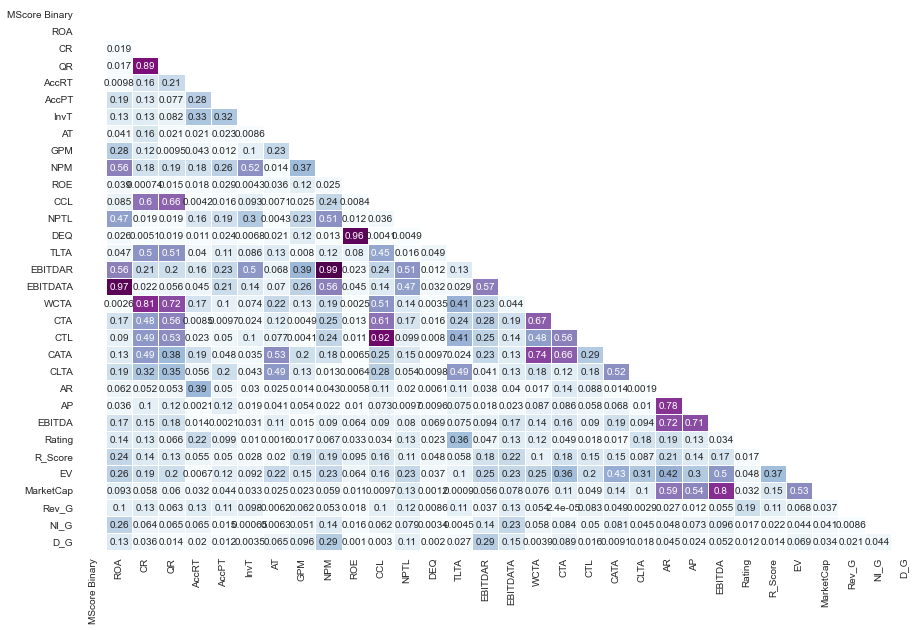

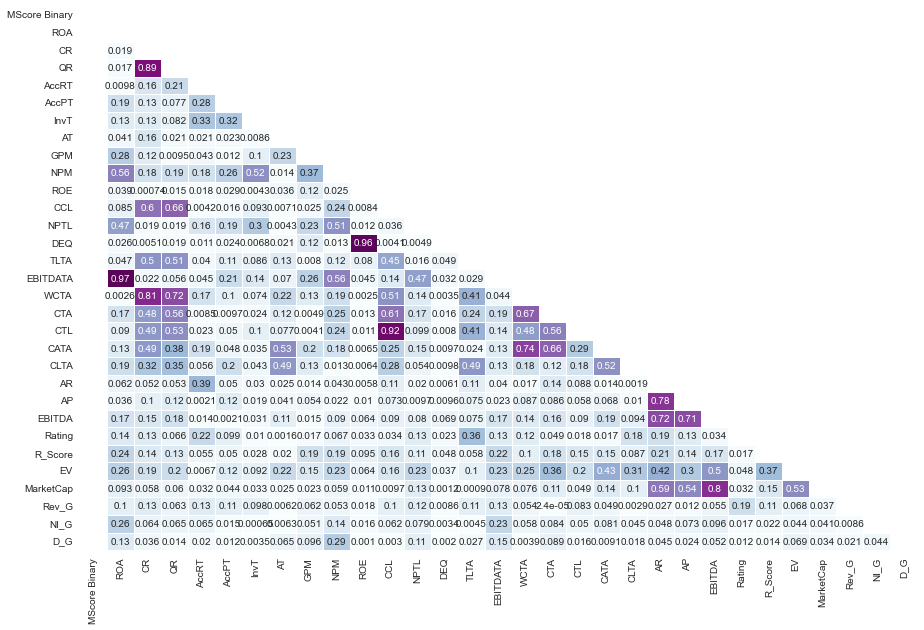

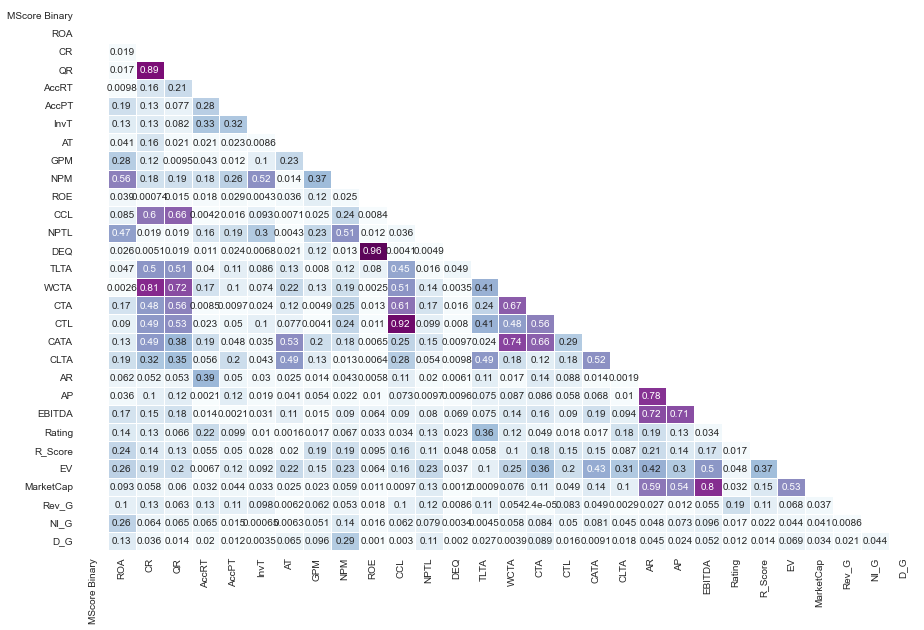

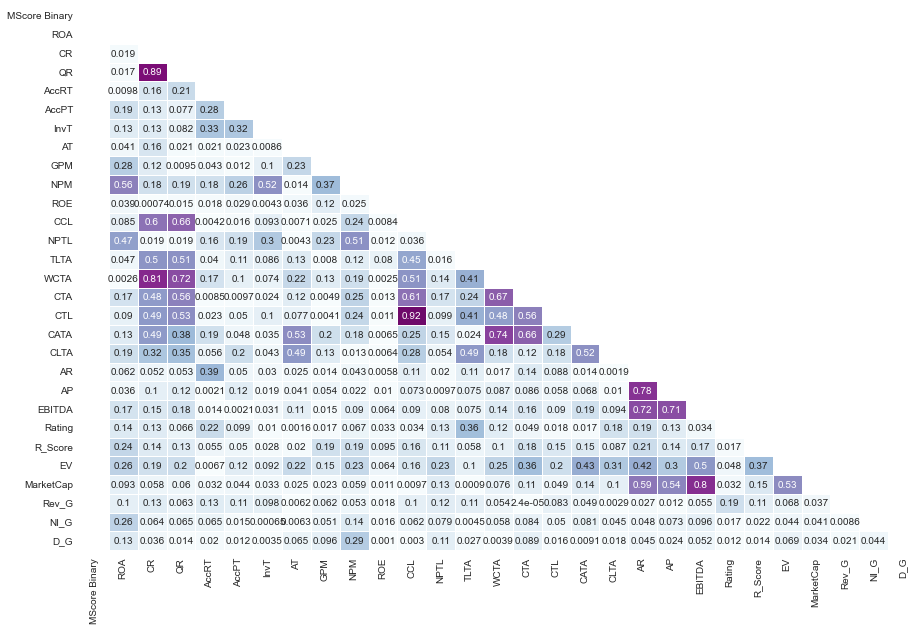

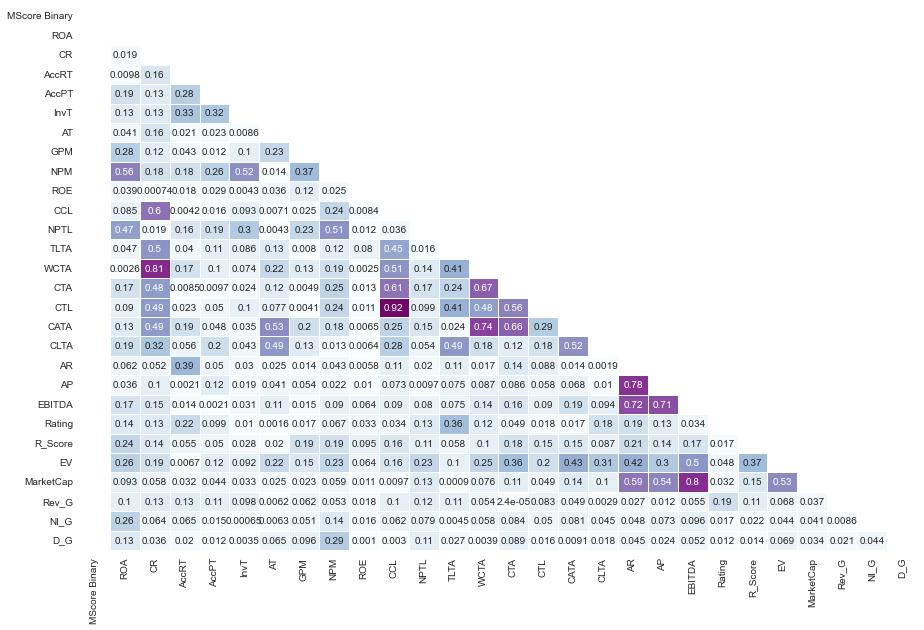

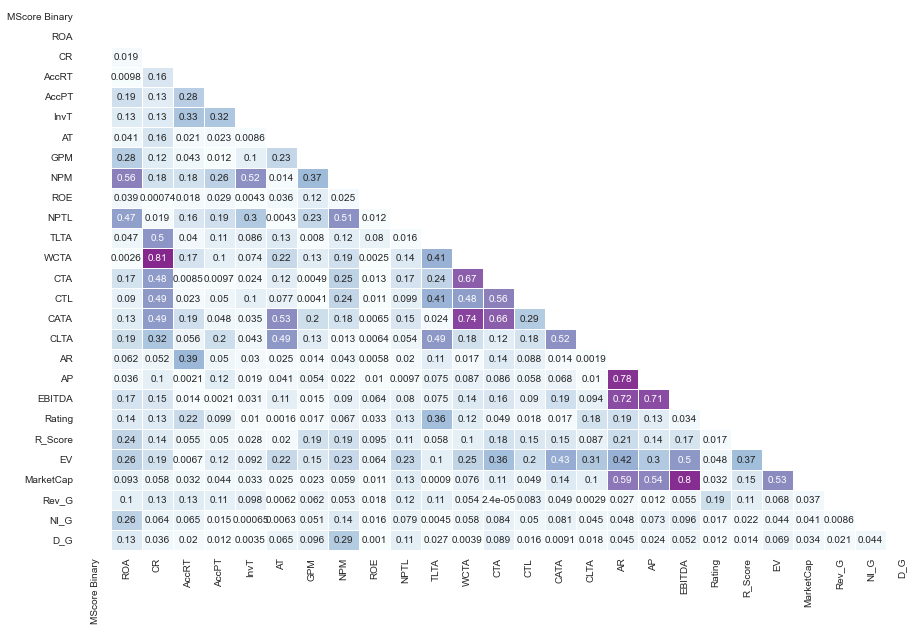

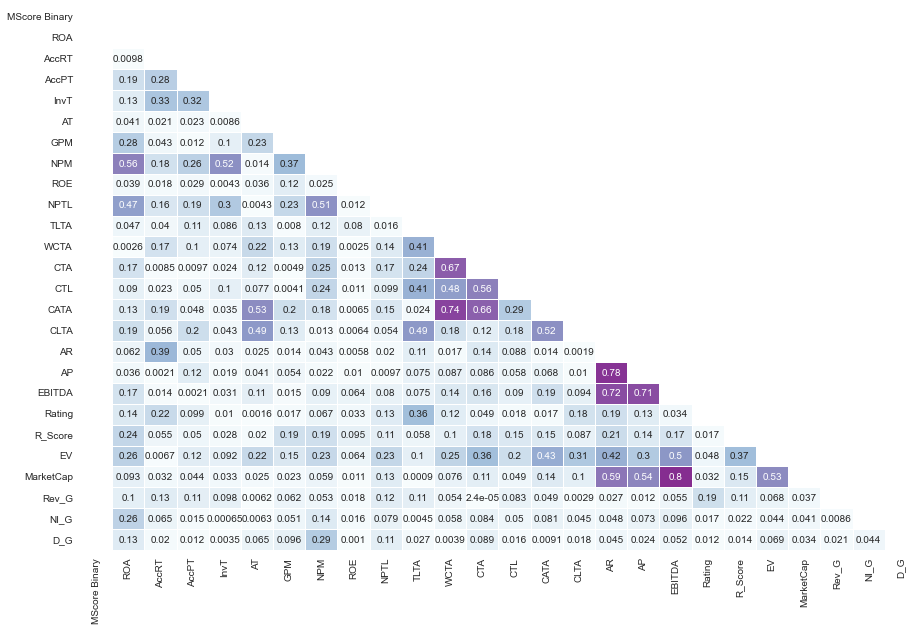

In [66]:
run_column_correlation_test =1 ###Why are we dropping both of the highly correlated signals ==> we can drop one of the 2 highly correlated signals           
if run_column_correlation_test == 1:
    
    drop_columns1= ['NPTA']
    df = df.drop(drop_columns1, axis = 1)
    correlation_plot(df)

    drop_columns1= ['EBITDAR']
    df = df.drop(drop_columns1, axis = 1)
    correlation_plot(df)

    drop_columns1= ['EBITDATA']
    df = df.drop(drop_columns1, axis = 1)
    correlation_plot(df)

    drop_columns1= ['DEQ']
    df = df.drop(drop_columns1, axis = 1)
    correlation_plot(df)

    drop_columns1= ['QR']
    df = df.drop(drop_columns1, axis = 1)
    correlation_plot(df)
    
    drop_columns1= ['CCL']
    df = df.drop(drop_columns1, axis = 1)
    correlation_plot(df)

    drop_columns1= ['CR']
    df = df.drop(drop_columns1, axis = 1)
    correlation_plot(df)

    #drop_columns1= ['EBITDA']
    #df = df.drop(drop_columns1, axis = 1)
    #correlation_plot(df)

    #drop_columns1= ['AR']
    #df = df.drop(drop_columns1, axis = 1)
    #correlation_plot(df)
    
    #drop_columns1= ['CATA']
    #df = df.drop(drop_columns1, axis = 1)
    #correlation_plot(df)

    #drop_columns1= ['WCTA']
    #df = df.drop(drop_columns1, axis = 1)
    #correlation_plot(df)

    #drop_columns1= ['CTA']
    #df = df.drop(drop_columns1, axis = 1)
    #correlation_plot(df)

    #drop_columns1= ['CLTA']
    #df = df.drop(drop_columns1, axis = 1)
    #correlation_plot(df)

    #drop_columns1= ['MarketCap']
    #df = df.drop(drop_columns1, axis = 1)
    #correlation_plot(df)

    #drop_columns1= ['NPTL']
    #df = df.drop(drop_columns1, axis = 1)
    #correlation_plot(df)

    #drop_columns1= ['NPM']
    #df = df.drop(drop_columns1, axis = 1)
    #correlation_plot(df)

# Using Box Plot to identify outliers

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'MScore Binary'),
  Text(1, 0, 'ROA'),
  Text(2, 0, 'AccRT'),
  Text(3, 0, 'AccPT'),
  Text(4, 0, 'InvT'),
  Text(5, 0, 'AT'),
  Text(6, 0, 'GPM'),
  Text(7, 0, 'NPM'),
  Text(8, 0, 'ROE'),
  Text(9, 0, 'NPTL'),
  Text(10, 0, 'TLTA'),
  Text(11, 0, 'WCTA'),
  Text(12, 0, 'CTA'),
  Text(13, 0, 'CTL'),
  Text(14, 0, 'CATA'),
  Text(15, 0, 'CLTA'),
  Text(16, 0, 'AR'),
  Text(17, 0, 'AP'),
  Text(18, 0, 'EBITDA'),
  Text(19, 0, 'Rating'),
  Text(20, 0, 'R_Score'),
  Text(21, 0, 'EV'),
  Text(22, 0, 'MarketCap'),
  Text(23, 0, 'Rev_G'),
  Text(24, 0, 'NI_G'),
  Text(25, 0, 'D_G')])

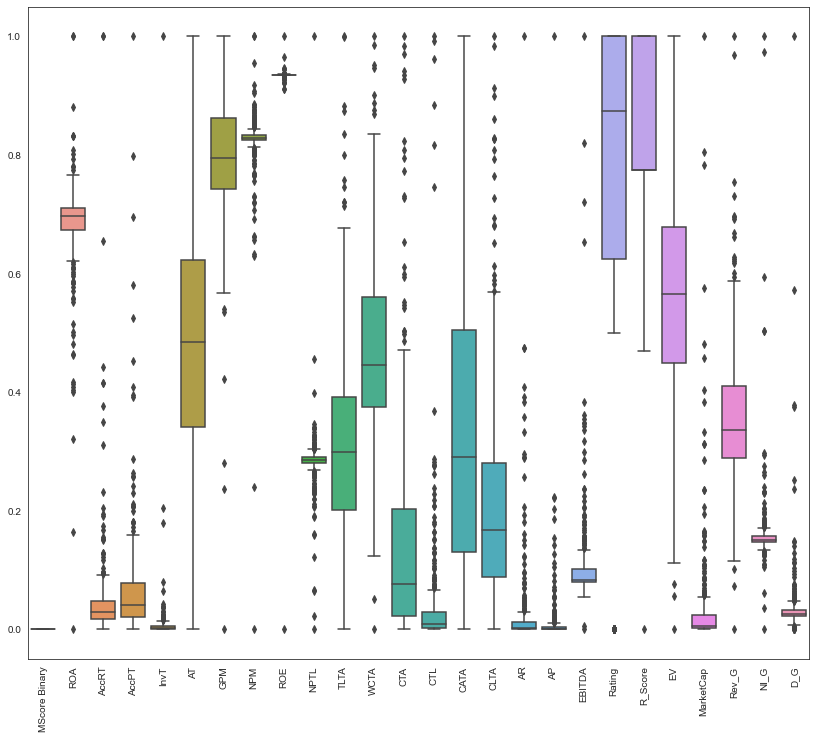

In [67]:
#Check for Outliers
plt.figure(figsize=(14,12))
sns.boxplot(data=df)
plt.xticks(rotation=90)

### This step will check and remove all variables that contains Outliers. To Run this step, we need to set flag run_boxplot_outlier_test = 1

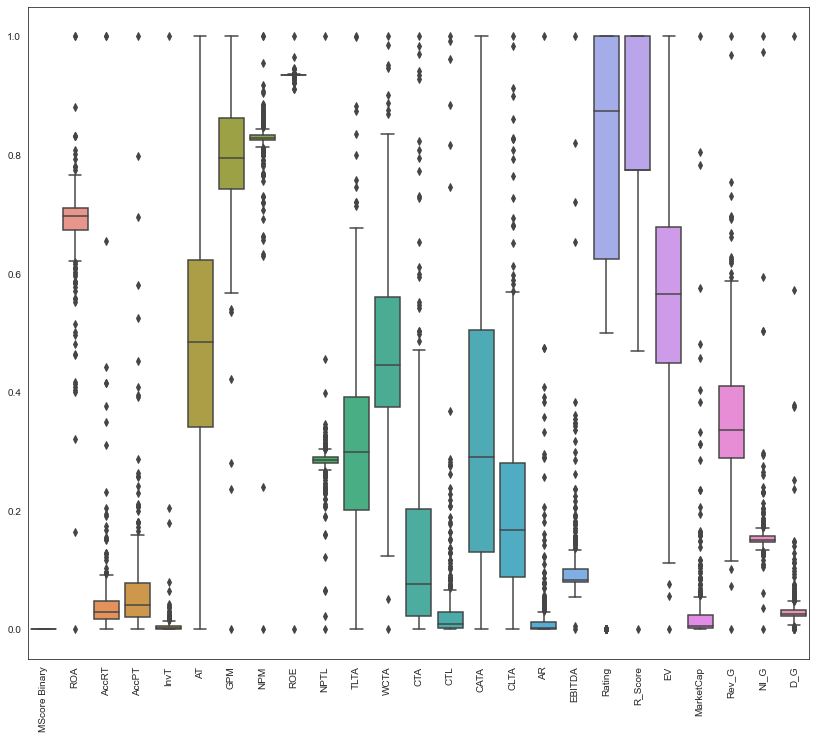

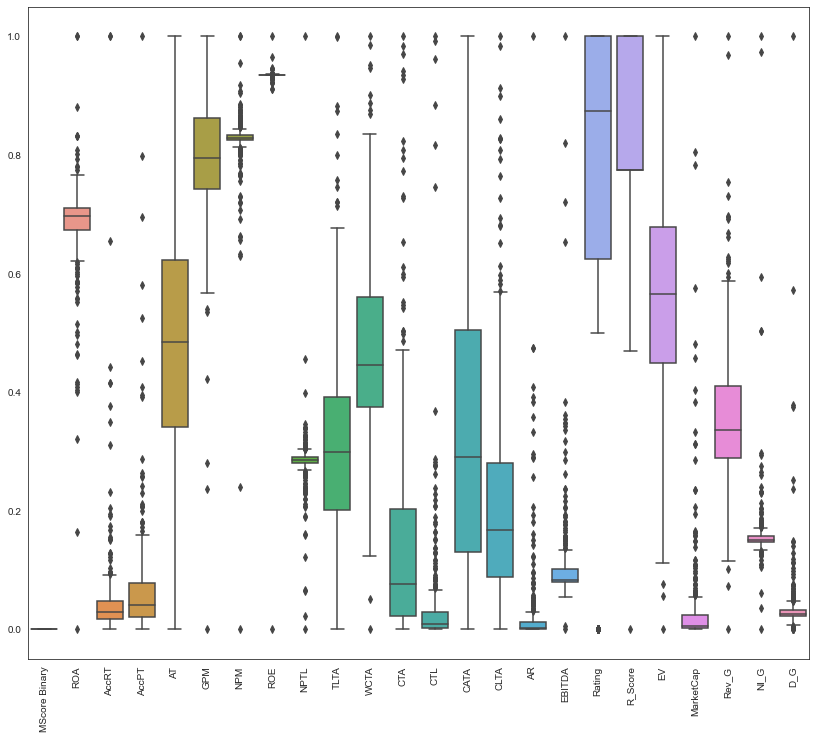

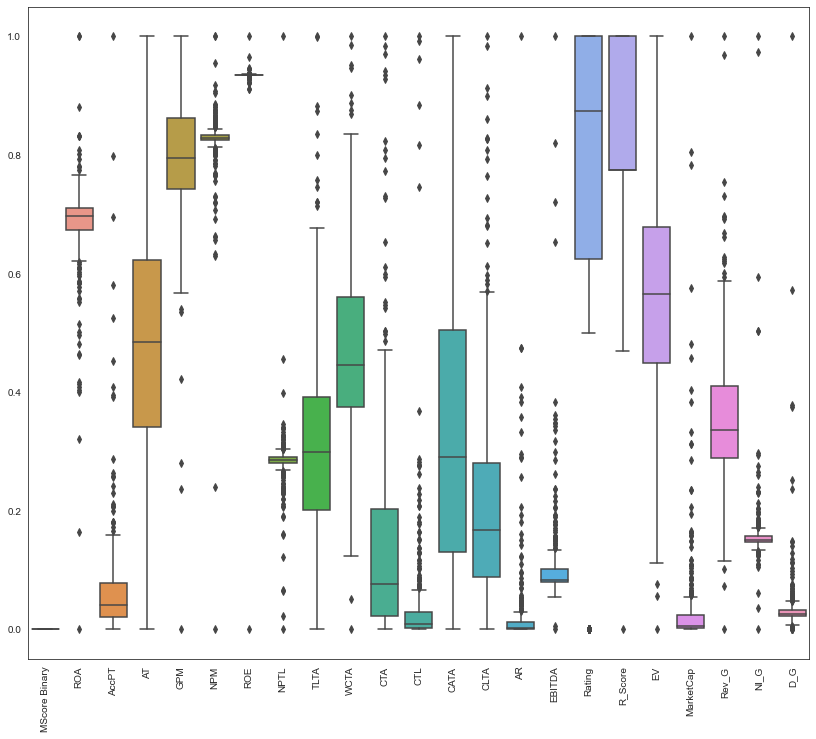

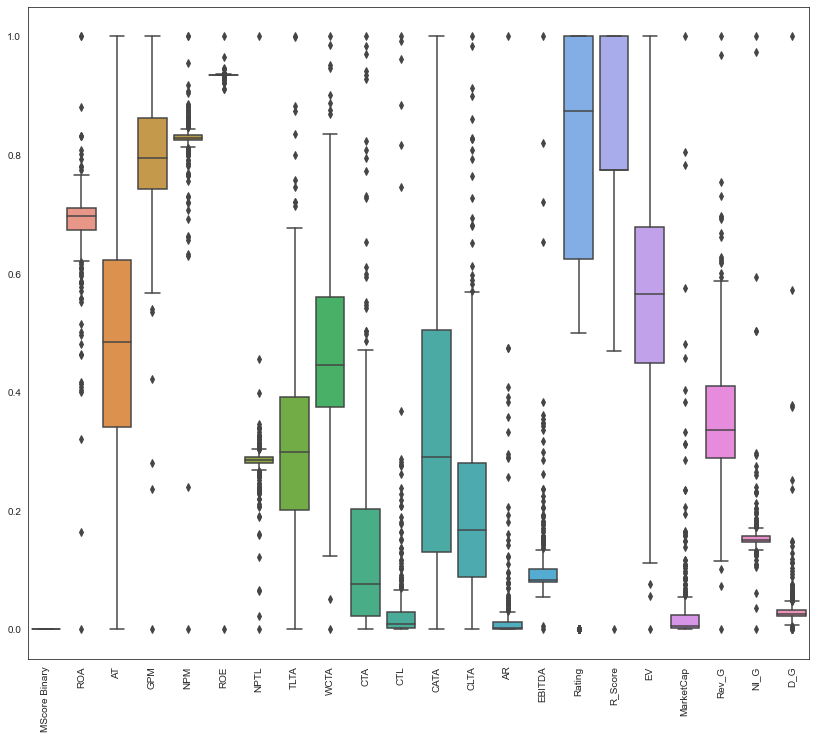

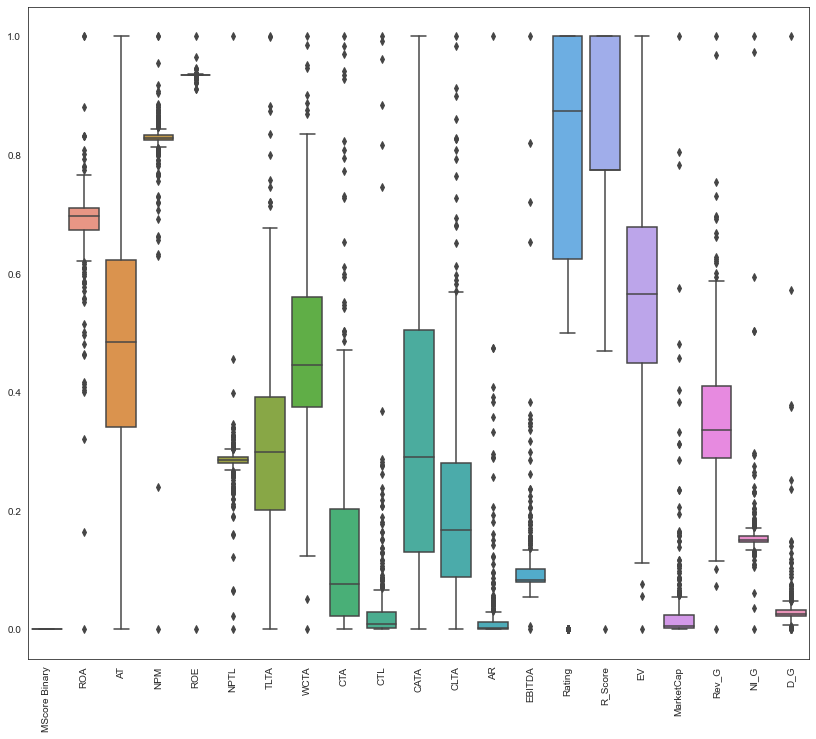

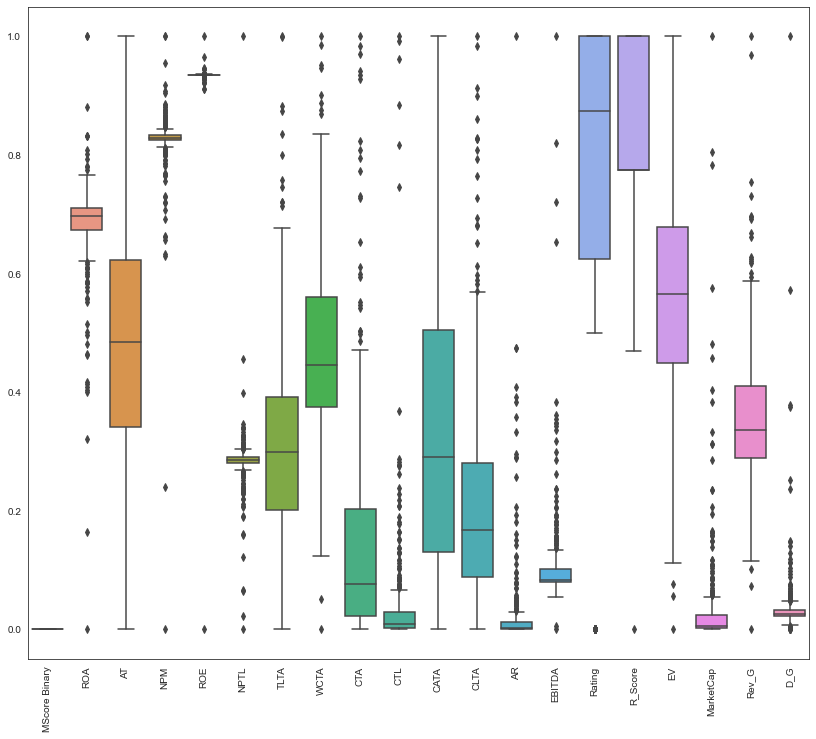

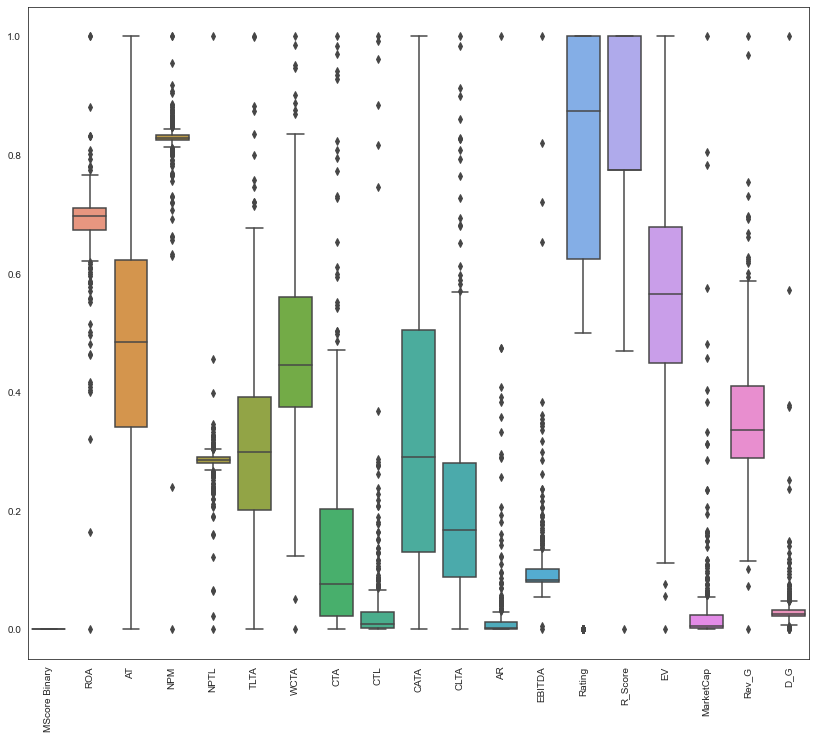

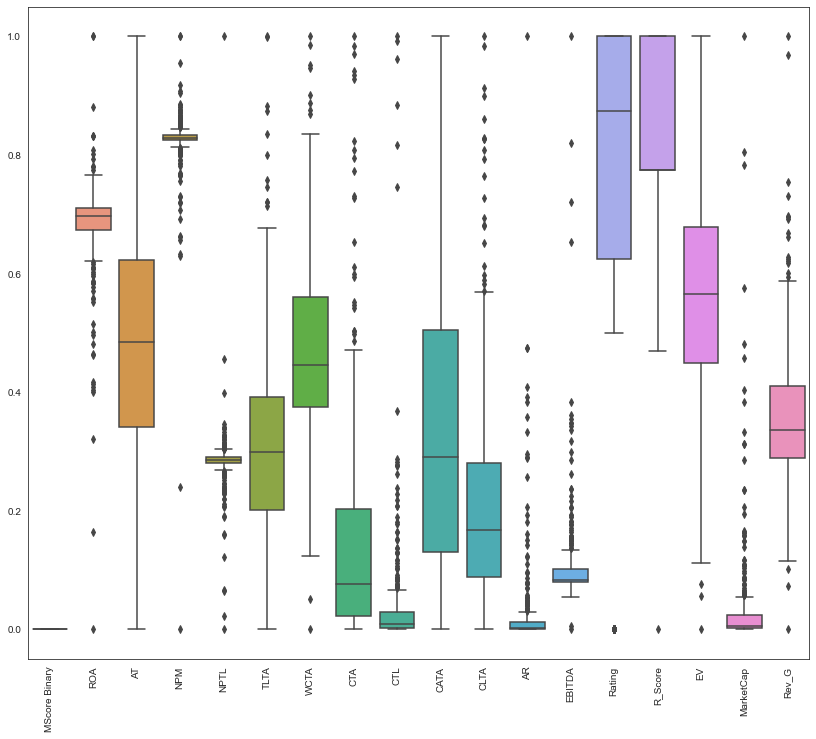

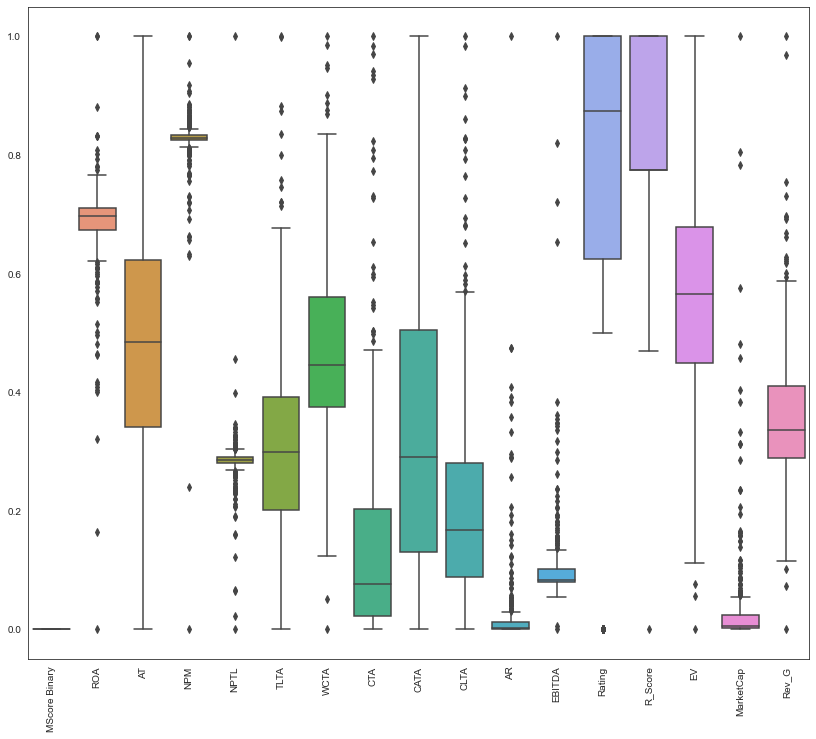

In [68]:
run_boxplot_outlier_test =1 
if run_boxplot_outlier_test == 1:

    drop_columns1= ['AP']
    df = df.drop(drop_columns1, axis = 1)
    #Check for Outliers
    plt.figure(figsize=(14,12))
    sns.boxplot(data=df)
    plt.xticks(rotation=90)


    drop_columns1= ['InvT']
    df = df.drop(drop_columns1, axis = 1)
    #Check for Outliers
    plt.figure(figsize=(14,12))
    sns.boxplot(data=df)
    plt.xticks(rotation=90)


    drop_columns1= ['AccRT']
    df = df.drop(drop_columns1, axis = 1)
    #Check for Outliers
    plt.figure(figsize=(14,12))
    sns.boxplot(data=df)
    plt.xticks(rotation=90)


    drop_columns1= ['AccPT']
    df = df.drop(drop_columns1, axis = 1)
    #Check for Outliers
    plt.figure(figsize=(14,12))
    sns.boxplot(data=df)
    plt.xticks(rotation=90)


    drop_columns1= ['GPM']
    df = df.drop(drop_columns1, axis = 1)
    #Check for Outliers
    plt.figure(figsize=(14,12))
    sns.boxplot(data=df)
    plt.xticks(rotation=90)


    drop_columns1= ['NI_G']
    df = df.drop(drop_columns1, axis = 1)
    #Check for Outliers
    plt.figure(figsize=(14,12))
    sns.boxplot(data=df)
    plt.xticks(rotation=90)


    #drop_columns1= ['Rev_G']
    #df = df.drop(drop_columns1, axis = 1)
    #Check for Outliers
    #plt.figure(figsize=(14,12))
    #sns.boxplot(data=df)
    #plt.xticks(rotation=90)


    drop_columns1= ['ROE']
    df = df.drop(drop_columns1, axis = 1)
    #Check for Outliers
    plt.figure(figsize=(14,12))
    sns.boxplot(data=df)
    plt.xticks(rotation=90)


    drop_columns1= ['D_G']
    df = df.drop(drop_columns1, axis = 1)
    #Check for Outliers
    plt.figure(figsize=(14,12))
    sns.boxplot(data=df)
    plt.xticks(rotation=90)
    plt.xticks(rotation=90)


    drop_columns1= ['CTL']
    df = df.drop(drop_columns1, axis = 1)
    #Check for Outliers
    plt.figure(figsize=(14,12))
    sns.boxplot(data=df)
    plt.xticks(rotation=90)


In [69]:
df

MScore Binary       ROA        AT       NPM      NPTL      TLTA  \
0              0.0  0.697755  0.277652  0.832303  0.285472  0.360306   
1              0.0  0.687858  0.536756  0.829268  0.283583  0.378196   
2              0.0  0.721395  0.244998  0.836208  0.291344  0.298074   
3              0.0  0.707637  0.411009  0.831624  0.288158  0.302442   
4              0.0  0.717927  0.864107  0.828898  0.289746  0.334018   
..             ...       ...       ...       ...       ...       ...   
389            0.0  0.648423  0.805969  0.825100  0.278811  0.590618   
390            0.0  0.679387  0.551479  0.826627  0.282460  0.714090   
391            0.0  0.742076  0.272636  0.840698  0.337538  0.068302   
392            0.0  0.696652  0.658571  0.828516  0.284440  0.556283   
393            0.0  0.715824  0.456859  0.862848  0.290931  0.266173   

         WCTA       CTA      CATA      CLTA        AR    EBITDA  Rating  \
0    0.339946  0.002045  0.050897  0.114819  0.383961  0.720483   1.000   
1    0.363253  0.039196  0.142529  0.179092  1.000000  1.000000   0.000   
2    0.365567  0.011717  0.075557  0.102576  0.193254  0.819469   1.000   
3    0.399681  0.012060  0.276928  0.269939  0.333333  0.382753   1.000   
4    0.411353  0.087471  0.247150  0.219667  0.160436  0.317780   1.000   
..        ...       ...       ...       ...       ...       ...     ...   
389  0.123556  0.105275  0.370856  0.793884  0.000027  0.078957   0.500   
390  0.342034  0.378151  0.690770  0.808947  0.000070  0.079008   0.500   
391  0.718771  0.552435  0.542050  0.071677  0.000010  0.078969   0.875   
392  0.430745  0.402508  0.990371  1.000000  0.000190  0.078975   0.500   
393  0.282801  0.058433  0.072341  0.225436  0.000963  0.099745   0.625   

      R_Score        EV  MarketCap     Rev_G  
0    1.000000  0.971516   0.804958  0.350878  
1    1.000000  1.000000   0.783256  0.351691  
2    0.775240  0.920187   0.576430  0.564265  
3    1.000000  0.889104   0.382851  0.389234  
4    1.000000  0.900765   0.481874  0.404165  
..        ...       ...        ...       ...  
389  0.469335  0.147719   0.000064  0.263359  
390  0.469335  0.112728   0.000030  0.427736  
391  0.775240  0.000000   0.000026  0.334475  
392  0.000000  0.055918   0.000036  0.219972  
393  0.469335  0.607217   0.000000  0.259026  

[394 rows x 17 columns]

In [70]:
df['MScore Binary'].value_counts()

0.0    394
Name: MScore Binary, dtype: int64

### Grouping B-, C+ and S which contains very low numbers of observation into B for Rating variable. This can reduce no. of distinct value for LabelEncoder step.

In [71]:
df['Rating'].value_counts()

1.000    148
0.625     65
0.875     56
0.000     51
0.750     40
0.500     34
Name: Rating, dtype: int64

### Using LabelEncoder to convert Categorical variable Rating to Numeric one.

In [72]:
#from sklearn import preprocessing
#data2 = df.copy()

#str_cols = data2.select_dtypes(include=['object']).columns
#clfs = {c:preprocessing.LabelEncoder() for c in str_cols}

#for col, clf in clfs.items():
#    data2[col] = clfs[col].fit_transform(data2[col])

#data2.head()

In [73]:
data2=df.copy()

In [74]:
X=data2.loc[:,data2.columns.drop(['MScore Binary'])]
X.head()

ROA        AT       NPM      NPTL      TLTA      WCTA       CTA  \
0  0.697755  0.277652  0.832303  0.285472  0.360306  0.339946  0.002045   
1  0.687858  0.536756  0.829268  0.283583  0.378196  0.363253  0.039196   
2  0.721395  0.244998  0.836208  0.291344  0.298074  0.365567  0.011717   
3  0.707637  0.411009  0.831624  0.288158  0.302442  0.399681  0.012060   
4  0.717927  0.864107  0.828898  0.289746  0.334018  0.411353  0.087471   

       CATA      CLTA        AR    EBITDA  Rating  R_Score        EV  \
0  0.050897  0.114819  0.383961  0.720483     1.0  1.00000  0.971516   
1  0.142529  0.179092  1.000000  1.000000     0.0  1.00000  1.000000   
2  0.075557  0.102576  0.193254  0.819469     1.0  0.77524  0.920187   
3  0.276928  0.269939  0.333333  0.382753     1.0  1.00000  0.889104   
4  0.247150  0.219667  0.160436  0.317780     1.0  1.00000  0.900765   

   MarketCap     Rev_G  
0   0.804958  0.350878  
1   0.783256  0.351691  
2   0.576430  0.564265  
3   0.382851  0.389234  
4   0.481874  0.404165

In [75]:
np.set_printoptions(suppress=True)

### This step will check and remove all Highly Correlated variables. To Run this step, we need to set flag run_VIF_test = 1

### We can set only one flag either   run_column_correlation_test or run_VIF_test

In [76]:
run_VIF_test =0
if run_VIF_test == 1:

    # check the VIF of the predictors
    vif_series = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index=X.columns,
    dtype=float,
    )
    make_float = lambda x: "{:,.6f}".format(x)
    print("Result of VIF Test is : ")
    print("==========================")
    print(vif_series.apply(make_float))

    
    X.drop(["ROA"], axis=1, inplace=True)
    # check the VIF of the predictors
    vif_series = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index=X.columns,
    dtype=float,
    )
    make_float = lambda x: "{:,.6f}".format(x)
    print("Result of VIF Test is : ")
    print("==========================")
    print(vif_series.apply(make_float))

    
    X.drop(["WCTA"], axis=1, inplace=True)
    # check the VIF of the predictors
    vif_series = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index=X.columns,
    dtype=float,
    )
    make_float = lambda x: "{:,.6f}".format(x)
    print("Result of VIF Test is : ")
    print("==========================")
    print(vif_series.apply(make_float))


    
    X.drop(["NPM"], axis=1, inplace=True)
    # check the VIF of the predictors
    vif_series = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index=X.columns,
    dtype=float,
    )
    make_float = lambda x: "{:,.6f}".format(x)
    print("Result of VIF Test is : ")
    print("==========================")
    print(vif_series.apply(make_float))


    
    X.drop(["EV"], axis=1, inplace=True)
    # check the VIF of the predictors
    vif_series = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index=X.columns,
    dtype=float,
    )
    make_float = lambda x: "{:,.6f}".format(x)
    print("Result of VIF Test is : ")
    print("==========================")
    print(vif_series.apply(make_float))


    
    X.drop(["EBITDATA"], axis=1, inplace=True)
    # check the VIF of the predictors
    vif_series = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index=X.columns,
    dtype=float,
    )
    make_float = lambda x: "{:,.6f}".format(x)
    print("Result of VIF Test is : ")
    print("==========================")
    print(vif_series.apply(make_float))



    X.drop(["CATA"], axis=1, inplace=True)
    # check the VIF of the predictors
    vif_series = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index=X.columns,
    dtype=float,
    )
    make_float = lambda x: "{:,.6f}".format(x)
    print("Result of VIF Test is : ")
    print("==========================")
    print(vif_series.apply(make_float))    


    
    X.drop(["CCL"], axis=1, inplace=True)
    # check the VIF of the predictors
    vif_series = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index=X.columns,
    dtype=float,
    )
    make_float = lambda x: "{:,.6f}".format(x)
    print("Result of VIF Test is : ")
    print("==========================")
    print(vif_series.apply(make_float))


    
    X.drop(["ROE"], axis=1, inplace=True)
    # check the VIF of the predictors
    vif_series = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index=X.columns,
    dtype=float,
    )
    make_float = lambda x: "{:,.6f}".format(x)
    print("Result of VIF Test is : ")
    print("==========================")
    print(vif_series.apply(make_float))


    
    X.drop(["R_Score"], axis=1, inplace=True)
    # check the VIF of the predictors
    vif_series = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index=X.columns,
    dtype=float,
    )
    make_float = lambda x: "{:,.6f}".format(x)
    print("Result of VIF Test is : ")
    print("==========================")
    print(vif_series.apply(make_float))



In [31]:
#Check y as well
data2=df.copy()
y=pd.DataFrame(data2.loc[:,'MScore Binary'])
y.head()

MScore Binary
0              0
1              0
2              1
3              0
4              0

In [32]:
###Generative model approach##
X=data2.loc[:,data2.columns.drop(['MScore Binary'])]
X.head()

Companies    MScore       ROA        CR        QR      AccRT       AccPT  \
0    ENB.TO -3.139361  0.036651  0.491470  0.399857  47.928980   34.661469   
1  BAM-A.TO -2.844616  0.010143  0.864695  0.733200  77.587382  140.426510   
2     CP.TO  0.269938  0.041832  0.427984  0.353593  37.390244    0.000000   
3    CNQ.TO -3.755082  0.099967  0.800593  0.592024  34.562458    8.921136   
4    NTR.TO -3.145775  0.063118  1.112754  0.604195  70.676602    0.000000   

         InvT        AT        GPM  ...            EV     MarketCap     Rev_G  \
0   18.724274  0.278751  30.840645  ...  1.825730e+11  1.072190e+11  0.204262   
1   48.801641  0.193684  15.490354  ...  2.675664e+11  1.043284e+11  0.206830   
2   24.019882  0.117268  55.334584  ...  8.257092e+10  6.251292e+10  0.036965   
3   25.363379  0.428540  32.193949  ...  9.231347e+10  7.677947e+10  0.878337   
4  126.193520  0.554750  33.952800  ...  6.134212e+10  5.099512e+10  0.325426   

        NI_G       D_G  CG_Score  ARO  BoardS  ShareR  Comp  
0   0.840321  0.130693       6.0  3.0     9.0     4.0   3.0  
1  30.597015  0.123276       8.0  4.0     6.0     9.0   6.0  
2   0.166939  0.996330       1.0  1.0     1.0     1.0   1.0  
3  18.618391 -0.241225       7.0  4.0     8.0     7.0   1.0  
4   5.869281  0.078024       2.0  1.0     2.0     4.0   5.0  

[5 rows x 39 columns]

In [33]:
####Generating a gaussian mixture model for class 0 ====> Becasue we have successfuly classified the class 1 using inter quantile range

##If some new input comes

#1.apply Inter quantile range technique to see if it is and outlier with tuned parameters (0.8,4 for lower and upper boudary respectively)
#2.if it is claffied as an outlier===> Class 1 (Anomalies if there is a single chance of input being anomalous we term that as anomalous)
#3.if it is not then we recheck with another filter of gaussian mixture model developed below with 394 samples

In [34]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X,y_true=X[['EBITDA','Rev_G',]],y  ###Choose analysed parameters 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=123)

In [35]:
X_test

EBITDA     Rev_G
49   1.009800e+09 -0.053169
85   3.778000e+08  0.212047
34   2.310000e+07  0.215668
231  2.137280e+08  0.994170
236  7.426400e+07  0.118501
..            ...       ...
282  4.845788e+07  0.258356
216  6.504950e+08  0.757916
91   5.027000e+08  1.209106
335  3.972800e+07  0.361444
211  1.150310e+08  0.205721

[116 rows x 2 columns]

In [36]:
gmm=GaussianMixture(n_components=1, init_params='kmeans')
methods = ["kmeans", "random_from_data", "k-means++", "random"]
gmm.fit(X_train)

GaussianMixture()

In [37]:
accuracy_score(y_test,gmm.predict(X_test))

0.8879310344827587

In [38]:
accuracy_score(y_train,gmm.predict(X_train))

0.8760806916426513

In [39]:
##Saivng the model
import pickle
with open('generative_model_class_0_classifier.pkl', 'wb') as fid:
    pickle.dump(gmm, fid) 

In [40]:
#Check x and y shape
X.shape

(463, 2)

In [41]:
y.shape

(463, 1)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=123)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1) # 0.25 x 0.8 = 0.2

In [43]:
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)
#print('Validation', X_val.shape, y_val.shape)

Train (347, 2) (347, 1)
Test (116, 2) (116, 1)


### Performing Over Sampling using SMOTEENN method

In [44]:
#df_log.drop(['Companies'],axis=True,inplace=True)
df_log['Rating'] = df_log['Rating'].replace({"B-": "B","C+": "B","S": "B"})######Alreadt given logic###
df_log['Rating'].replace({'A+':9,'A':8,'A-':7,'B+':6,'B':5,'B-':4,'C+':3,'S':2,'S-':1},inplace=True)
y=pd.DataFrame(df_log.loc[:,'MScore Binary'])
X=df_log[['MScore']]
#X=df_log.loc[:,df_log.columns.drop(['MScore Binary'])]['MScore']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=123)

In [45]:
# Define the resampling method
from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

#method = ADASYN(random_state=42)
#method = SMOTE() 
method= SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))

In [46]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
# Define the resampling method
#method = SMOTE()
#method = RandomUnderSampler()
method =  RandomOverSampler()
# Create the resampled feature set
X_train_resampled, y_train_resampled = method.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = method.fit_resample(X_test, y_test)
#X_val_resampled, y_val_resampled = method.fit_resample(X_val, y_val)

In [47]:
print('Before ENNSampling, the shape of X_train: {}'.format(X_train.shape)) 
print('Before ENNSampling, the shape of y_train: {} \n'.format(y_train.shape)) 
print('After ENNSampling, the shape of X_train_resampled: {}'.format(X_train_resampled.shape)) 
print('After ENNSampling, the shape of y_train_resampled: {} \n'.format(y_train_resampled.shape))

Before ENNSampling, the shape of X_train: (347, 1)
Before ENNSampling, the shape of y_train: (347, 1) 

After ENNSampling, the shape of X_train_resampled: (608, 1)
After ENNSampling, the shape of y_train_resampled: (608, 1) 



In [48]:
print('Before ENNSampling, the shape of X_test: {}'.format(X_test.shape)) 
print('Before ENNSampling, the shape of y_test: {} \n'.format(y_test.shape)) 
print('After ENNSampling, the shape of X_test_resampled: {}'.format(X_test_resampled.shape)) 
print('After ENNSampling, the shape of y_test_resampled: {} \n'.format(y_test_resampled.shape))


Before ENNSampling, the shape of X_test: (116, 1)
Before ENNSampling, the shape of y_test: (116, 1) 

After ENNSampling, the shape of X_test_resampled: (206, 1)
After ENNSampling, the shape of y_test_resampled: (206, 1) 



### Performign Data standardization- We can use either MinMax or  Standard scale for data standardization

In [49]:
Select_Scale ='MinMax'  # Please Use only 'MinMax' or 'Standard'

if  Select_Scale =='MinMax':
    scaler=MinMaxScaler()
    scaler.fit(X_train_resampled)
    X_train_resampled = scaler.transform(X_train_resampled)
    X_test_resampled = scaler.transform(X_test_resampled)
    #X_val_resampled = scaler.transform(X_val_resampled)

elif Select_Scale =='Standard':
    np.set_printoptions(suppress=True)
    norm = preprocessing.StandardScaler().fit(X_train_resampled)
    X_train_resampled = norm.transform(X_train_resampled)
    norm = preprocessing.StandardScaler().fit(X_test_resampled)
    X_test_resampled = norm.transform(X_test_resampled)
    #norm = preprocessing.StandardScaler().fit(X_val_resampled)
    #X_val_resampled = norm.transform(X_val_resampled)
else:
    print("Please Select the correct Parameter to run this step")
    

In [50]:
#X_val_resampled

In [51]:
# converting Dependent Variable Y which is DataFrame into Array 
y_train_resampled = y_train_resampled['MScore Binary'].values
y_test_resampled = y_test_resampled['MScore Binary'].values
#y_val_resampled = y_val_resampled.Mscore.values

In [52]:
#Scale X test
X_test

MScore
49  -3.609638
85  -2.943280
34  -3.211135
231 -7.781487
236 -3.471734
..        ...
282 -3.650842
216 -1.136397
91  -2.634933
335 -3.264114
211 -3.254058

[116 rows x 1 columns]

In [53]:
X_test_resampled

array([[ 0.00194089],
       [ 0.00197247],
       [ 0.00195977],
       [ 0.00174317],
       [ 0.00194742],
       [ 0.00195045],
       [ 0.00193668],
       [ 0.0019328 ],
       [ 0.00190043],
       [ 0.00194168],
       [ 0.00189768],
       [ 0.00198313],
       [-0.00892324],
       [ 0.0019745 ],
       [ 0.00196463],
       [ 0.00198095],
       [ 0.00197023],
       [ 0.00194686],
       [ 0.001989  ],
       [ 0.00196198],
       [ 0.00198249],
       [ 0.0019501 ],
       [ 0.00194941],
       [ 0.00186818],
       [ 0.00193426],
       [ 0.00198347],
       [ 0.00191479],
       [ 0.00194886],
       [ 0.00195059],
       [ 0.00199902],
       [ 0.00197136],
       [ 0.0019345 ],
       [ 0.00194322],
       [ 0.00194095],
       [ 0.00197168],
       [ 0.00195368],
       [ 0.00195949],
       [ 0.00196702],
       [ 0.00195731],
       [ 0.00200707],
       [ 0.0020596 ],
       [ 0.00203062],
       [ 0.00194226],
       [ 0.00191485],
       [ 0.00194248],
       [ 0

In [54]:
#Explore the features available in your dataframe
count_y_train =y_train.value_counts()
print("Number of Train Data ",count_y_train)

# Explore the features available in your dataframe
count_y_test =y_test.value_counts()
print("Number of Test Data ",count_y_test)

# Explore the features available in your dataframe
#count_y_val =y_val.value_counts()
#print("Number of Validation Data ",count_y_val)

Number of Train Data  MScore Binary
0                304
1                 43
dtype: int64
Number of Test Data  MScore Binary
0                103
1                 13
dtype: int64


## Logistic Regression Base Model

In [55]:
#Logistic Regresion
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [56]:
logreg = logreg.fit(X_train, y_train)

### Logistic Classification Parameter Tuning 

In [57]:
X_train

MScore
436 -1.939010
343 -2.851283
416 -4.542408
431 -1.229854
360 -3.865409
..        ...
230 -8.443652
98  -3.232193
322 -4.137129
382 -4.405257
365 -3.537017

[347 rows x 1 columns]

In [58]:
from sklearn.model_selection import GridSearchCV
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 1, 100]
max_iter=[100,200,300,400,500]
solver= ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
hyperparameters = dict(C=C, penalty=penalty,solver= solver,max_iter= max_iter)
clf = GridSearchCV(logreg, hyperparameters, cv=10, verbose=0, scoring='accuracy',)
print(clf)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 1, 100],
                         'max_iter': [100, 200, 300, 400, 500],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')


In [59]:
#y_val_pred_log = clf.fit(X_val_resampled,y_val_resampled)
#y_train_pred_log = clf.fit(X_train_resampled,y_train_resampled)
result = clf.fit(X_train,y_train)

In [60]:
# get the best performing model fit on the whole training set
best_model = result.best_estimator_
print(best_model)

LogisticRegression(C=100, solver='newton-cg')


In [61]:
#Print all the Parameters that gave the best results:
print('Best Parameters',clf.best_params_)

Best Parameters {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [62]:
y_train_pred_log = best_model.predict(X_train)
#y_val_pred_log = clf.predict(X_val_resampled)
y_test_pred_log = best_model.predict(X_test)

In [63]:
y_test['MScore Binary'].value_counts()

0    103
1     13
Name: MScore Binary, dtype: int64

### Logistic Classification Performance Evaluation

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(y_train, y_train_pred_log))
print(classification_report(y_train, y_train_pred_log))
print("Accuracy Of Logistic Classification on Train Dataset is -->",accuracy_score(y_train, y_train_pred_log))
print("=================================\n")
print(confusion_matrix(y_test, y_test_pred_log))
print(classification_report(y_test, y_test_pred_log))
print("Accuracy Of Logistic Classification Test Dataset is-->",accuracy_score(y_test, y_test_pred_log))

print("=================================\n")
#print(confusion_matrix(y_val_resampled, y_val_pred_log))
#print(classification_report(y_val_resampled, y_val_pred_log))
#print("Accuracy Of Logistic Classification Validation Dataset is-->",accuracy_score(y_val_resampled, y_val_pred_log))


[[303   1]
 [ 29  14]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       304
           1       0.93      0.33      0.48        43

    accuracy                           0.91       347
   macro avg       0.92      0.66      0.72       347
weighted avg       0.92      0.91      0.89       347

Accuracy Of Logistic Classification on Train Dataset is --> 0.9135446685878963

[[103   0]
 [ 10   3]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       103
           1       1.00      0.23      0.38        13

    accuracy                           0.91       116
   macro avg       0.96      0.62      0.66       116
weighted avg       0.92      0.91      0.89       116

Accuracy Of Logistic Classification Test Dataset is--> 0.9137931034482759



In [65]:
#Cross-validation to address overfitting
from sklearn.model_selection import cross_val_score
#score=cross_val_score(clf, X_test_resampled, y_test_resampled, cv = 10, scoring='accuracy')
score=cross_val_score(best_model, X_test_resampled, y_test_resampled, cv = 10, scoring='accuracy')

print(score)
print("Mean 10-Fold: {}".format(np.mean(score)))

[0.47619048 0.52380952 0.47619048 0.47619048 0.47619048 0.47619048
 0.8        0.8        0.95       0.6       ]
Mean 10-Fold: 0.6054761904761905


In [ ]:
from sklearn.metrics import confusion_matrix
cmlog = confusion_matrix(y_test_resampled, y_test_pred_log)
print(cmlog)
plt.figure(figsize=(8,5))
heatmap=sns.heatmap(cmlog/np.sum(cmlog),annot=True, 
            fmt= '.1%', cmap= 'Blues',
            xticklabels = ['No-distress', 'distress'], 
            yticklabels = ['No-distress', 'distress'])
plt.xlabel("Predicted label") 
plt.ylabel("True label")
plt.title("Confusion Matrix - Financial Distress Prediction");

### Getting Optimal Threshold for Logistic Model

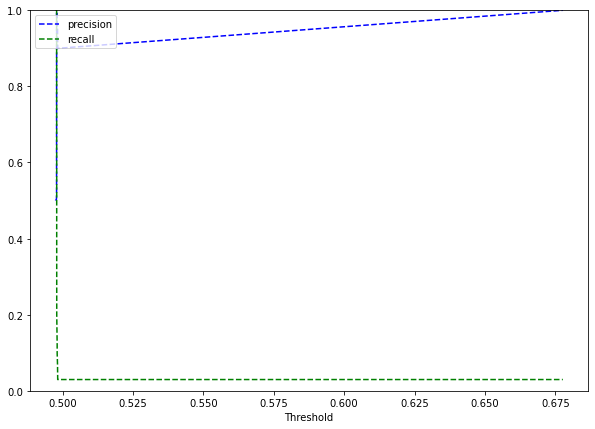

In [67]:
y_scores=best_model.predict_proba(X_train_resampled) #predict_proba gives the probability of each observation belonging to each class

precisions, recalls, thresholds = precision_recall_curve(y_train_resampled, y_scores[:,1])
 
#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [68]:
threshold_range = np.arange (0.4, 0.6, 0.01)
print(threshold_range)

[0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53
 0.54 0.55 0.56 0.57 0.58 0.59]


In [69]:
threshold1 = []
accuracy1 = []

#for p in np.unique(logclass.predict_proba(X_train_resampled_new)[:,1]):
for p in np.unique(threshold_range):
  threshold1.append(p)
  y_pred = (best_model.predict_proba(X_train_resampled)[:,1] >= p).astype(int)
  accuracy1.append(accuracy_score(y_train_resampled,y_pred))

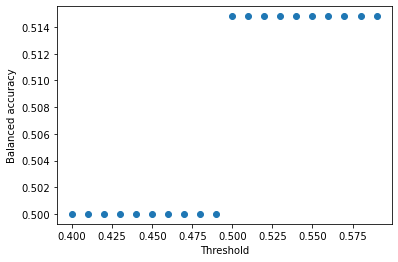

<Figure size 4000x2800 with 0 Axes>

In [70]:
plt.scatter(threshold1,accuracy1)

plt.xlabel("Threshold")
plt.ylabel("Balanced accuracy")
plt.figure(figsize=(10,7),dpi=400)
plt.show()

### Finding an optimal Thresold for classification

In [71]:
optimal_threshold = threshold1[np.argmax(accuracy1)]
print(optimal_threshold)

0.5000000000000001


### Prediction using the optimal Thresold for classification

In [72]:
y_train_pred_log = (best_model.predict_proba(X_train_resampled)[:,1] >= optimal_threshold).astype(int)
y_test_pred_log = (best_model.predict_proba(X_test_resampled)[:,1] >= optimal_threshold).astype(int)

### Re-Evaluation after setting the new threshold value 

In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(y_train_resampled, y_train_pred_log))
print(classification_report(y_train_resampled, y_train_pred_log))
print("Accuracy Of Logistic Classification on Train Dataset is -->",accuracy_score(y_train_resampled, y_train_pred_log))
print("=================================\n")
print(confusion_matrix(y_test_resampled, y_test_pred_log))
print(classification_report(y_test_resampled, y_test_pred_log))
print("Accuracy Of Logistic Classification Test Dataset is-->",accuracy_score(y_test_resampled, y_test_pred_log))


[[304   0]
 [295   9]]
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       304
           1       1.00      0.03      0.06       304

    accuracy                           0.51       608
   macro avg       0.75      0.51      0.37       608
weighted avg       0.75      0.51      0.37       608

Accuracy Of Logistic Classification on Train Dataset is --> 0.5148026315789473

[[103   0]
 [103   0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       103
           1       0.00      0.00      0.00       103

    accuracy                           0.50       206
   macro avg       0.25      0.50      0.33       206
weighted avg       0.25      0.50      0.33       206

Accuracy Of Logistic Classification Test Dataset is--> 0.5


### ROC Curve for Logistic Classification

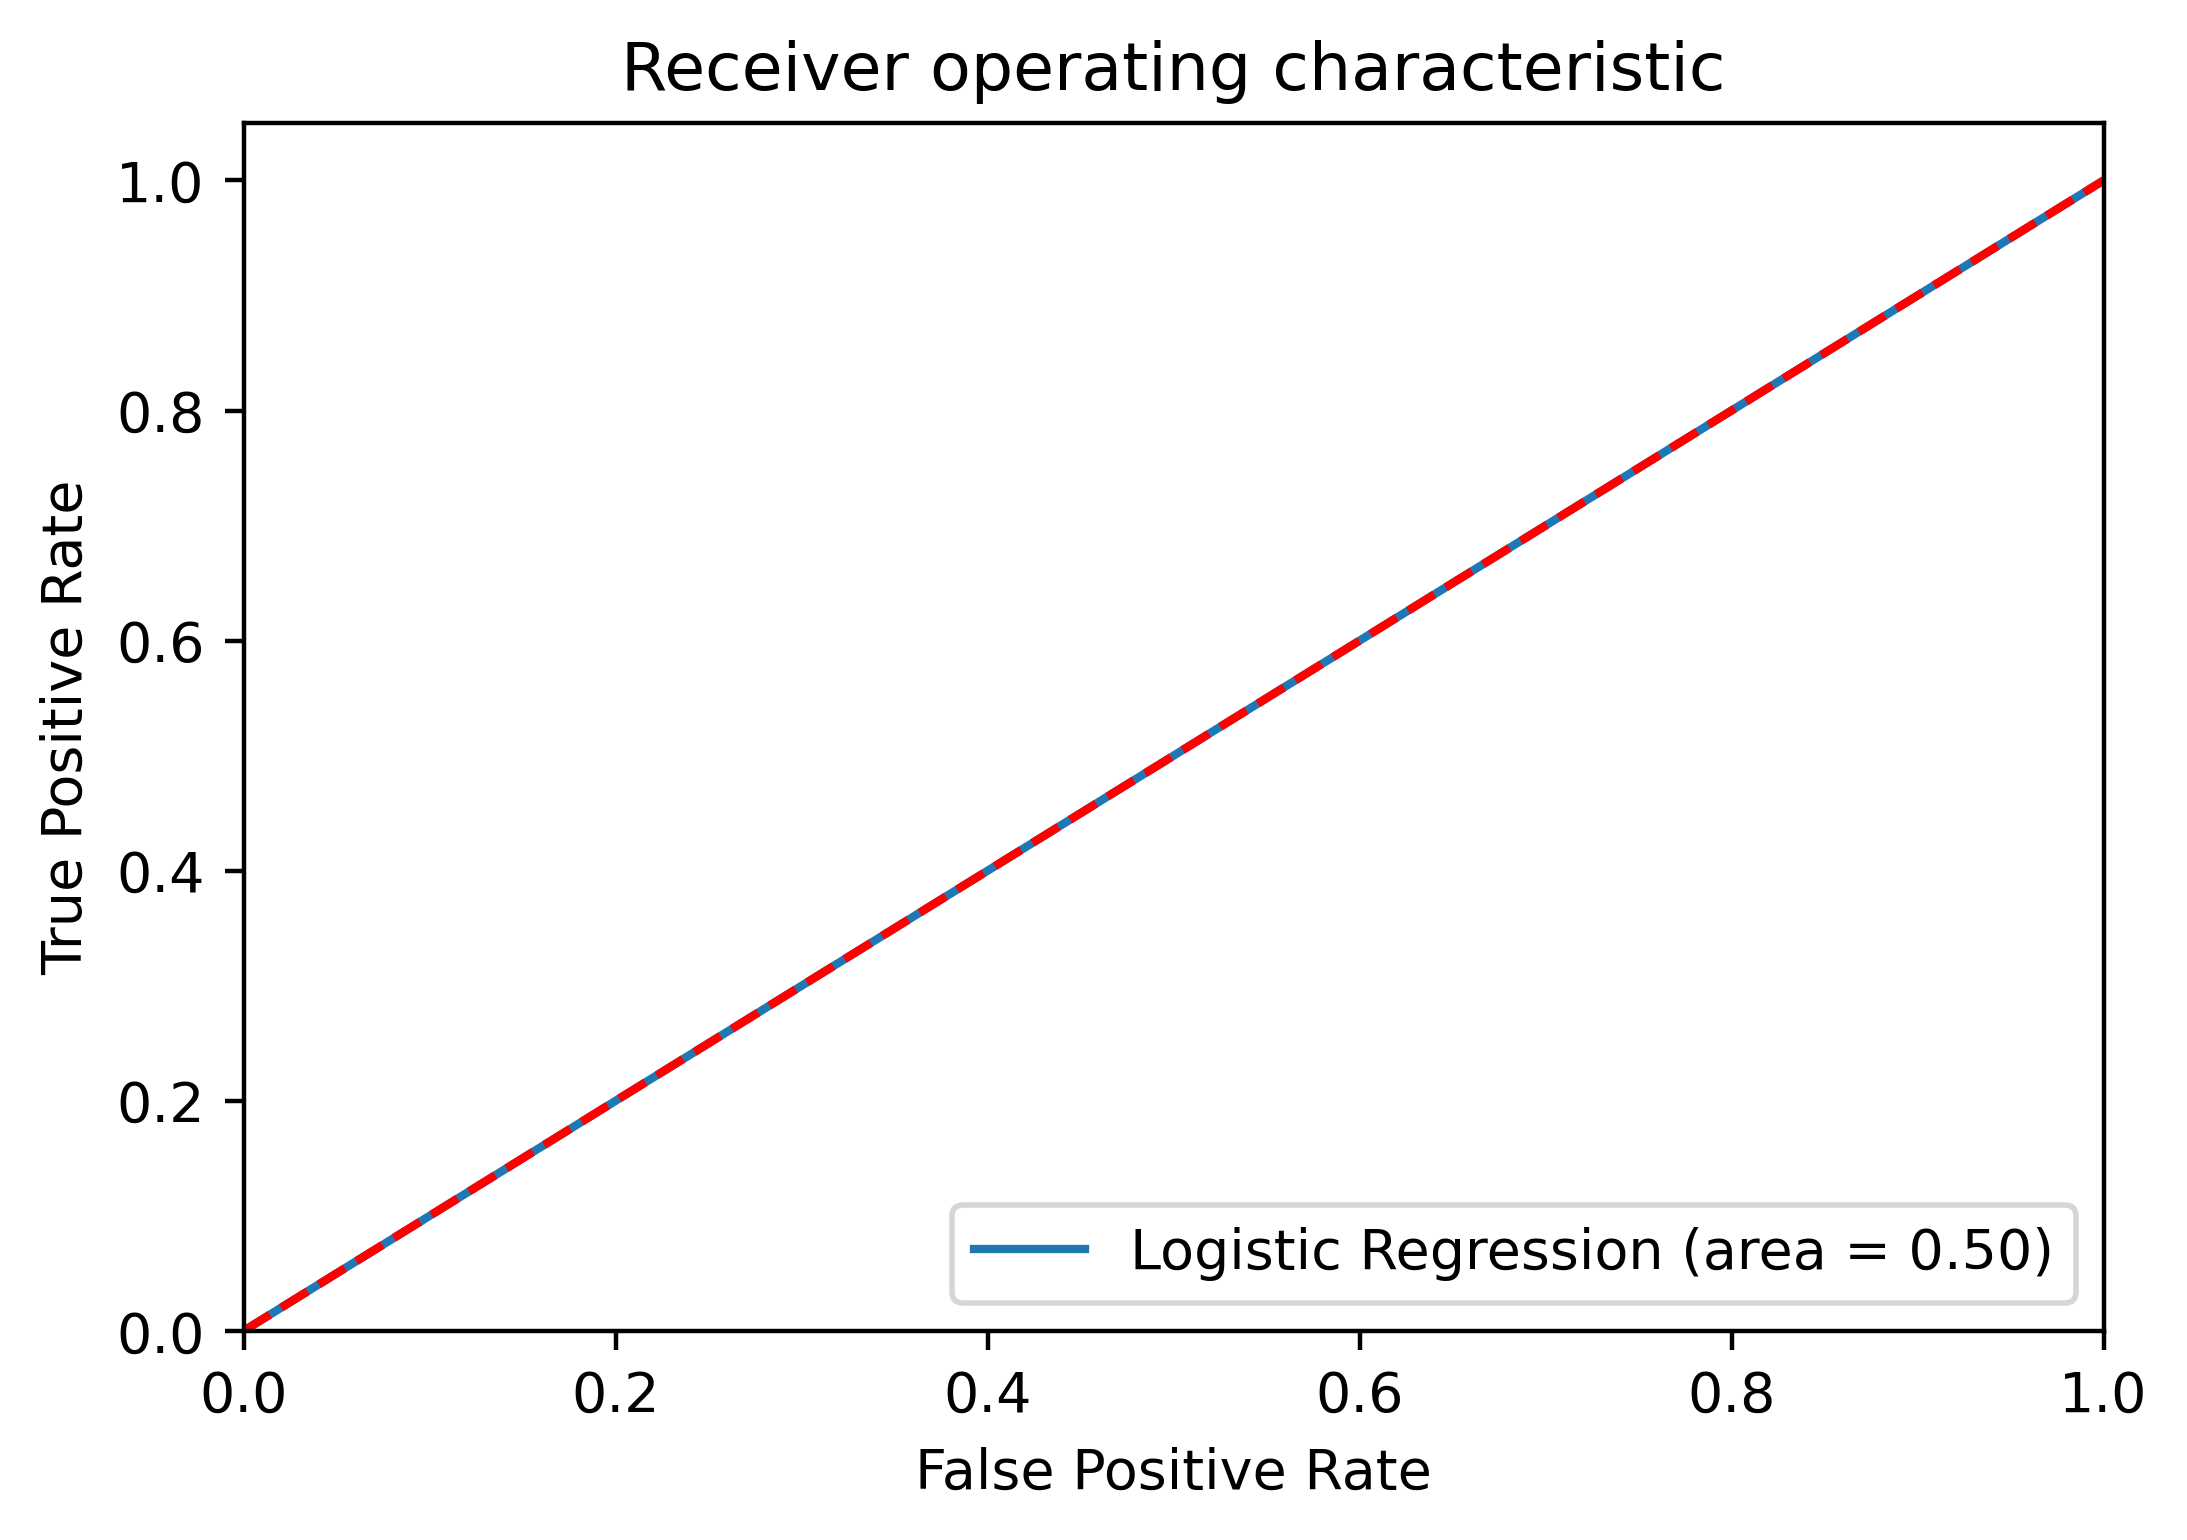

In [74]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_resampled, y_test_pred_log)
fpr, tpr, thresholds = roc_curve(y_test_resampled, y_test_pred_log)
plt.figure(dpi=400)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Decision Tree Classifer With Parameter Tuning

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "max_features":["auto","log2","sqrt"]}

DT=DecisionTreeClassifier()
CV_dt=GridSearchCV(DT, parameters, cv= 10)
CV_dt.fit(X_train_resampled, y_train_resampled)
 
print ("best params:", CV_dt.best_params_)
print ("Test Score:",CV_dt.score(X_test_resampled, y_test_resampled) )

best params: {'max_depth': 1, 'max_features': 'auto', 'min_samples_leaf': 1, 'splitter': 'best'}
Test Score: 0.9611650485436893


In [77]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier( max_depth=12, max_features='auto', min_samples_leaf= 4, splitter= 'best')

# Train Decision Tree Classifer
clf = clf.fit(X_train_resampled,y_train_resampled)

### Decision Tree Performance Evaluation

In [78]:
# check the accuracy on the training set
print("accuracy on the training set:",clf.score(X_train_resampled, y_train_resampled))

# check the accuracy on the test dataset
print("accuracy on the testing set:",clf.score(X_test_resampled, y_test_resampled))

accuracy on the training set: 0.9983552631578947
accuracy on the testing set: 0.9611650485436893


In [79]:
# Predict class labels for the train set
y_train_pred_DT = clf.predict(X_train_resampled)
# Confusion Matrix for train data
print('Confusion Matrix on train data')
print(confusion_matrix(y_train_resampled,y_train_pred_DT))

# Predict class labels for the test dataset
y_test_pred_DT = clf.predict(X_test_resampled)
# Confusion Matrix for test data
print('Confusion Matrix on test data')
print(confusion_matrix(y_test_resampled,y_test_pred_DT))

Confusion Matrix on train data
[[303   1]
 [  0 304]]
Confusion Matrix on test data
[[103   0]
 [  8  95]]


In [80]:
DT_confMat_train = confusion_matrix( y_train_resampled,y_train_pred_DT)
DT_confMat_test = confusion_matrix( y_test_resampled,y_test_pred_DT)

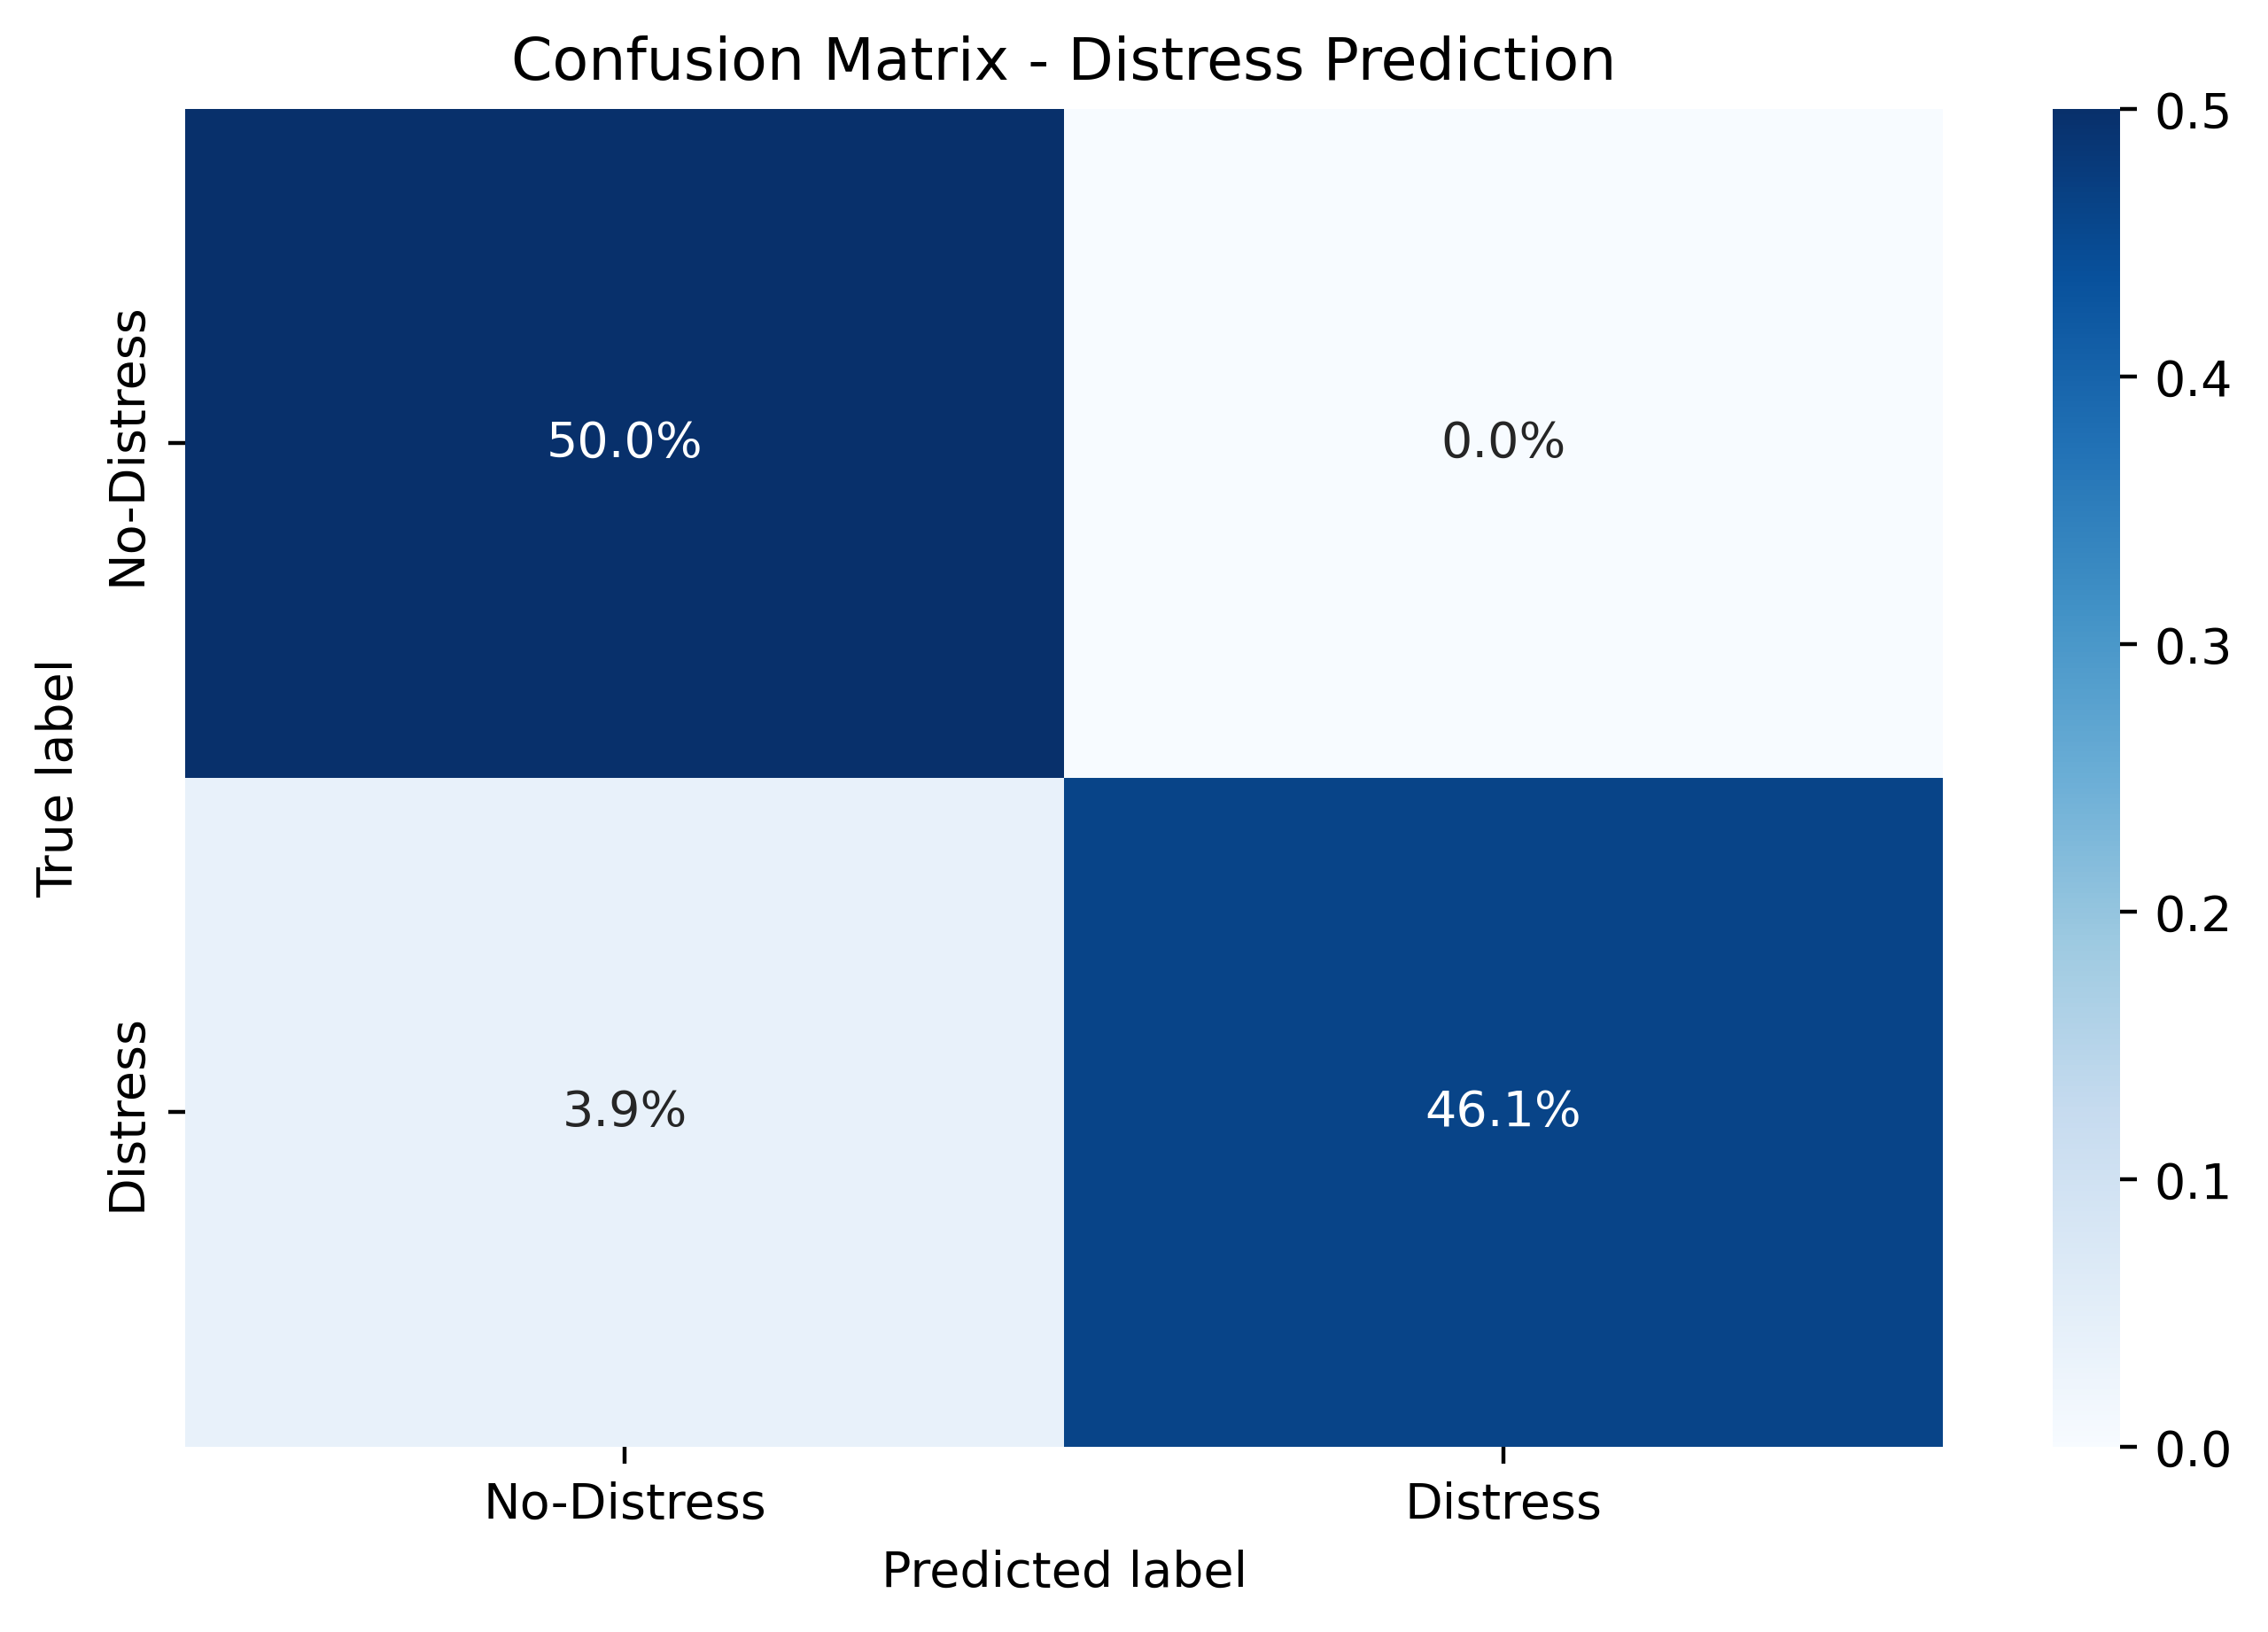

In [81]:
plt.figure(figsize=(8,5),dpi=400)
heatmap=sns.heatmap(DT_confMat_test/np.sum(DT_confMat_test),annot=True, 
            fmt= '.1%', cmap= 'Blues',
            xticklabels = ['No-Distress', 'Distress'], 
            yticklabels = ['No-Distress', 'Distress'])
plt.xlabel("Predicted label") 
plt.ylabel("True label")
plt.title("Confusion Matrix - Distress Prediction");

In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(y_train_resampled, y_train_pred_DT))
print(classification_report(y_train_resampled, y_train_pred_DT))
print("Accuracy Of Decision Tree Classification on Train Dataset is -->",accuracy_score(y_train_resampled, y_train_pred_DT))
print("=================================\n")
print(confusion_matrix(y_test_resampled, y_test_pred_DT))
print(classification_report(y_test_resampled, y_test_pred_DT))
print("Accuracy Of Decision Tree Classification Test Dataset is-->",accuracy_score(y_test_resampled, y_test_pred_DT))


[[303   1]
 [  0 304]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       1.00      1.00      1.00       304

    accuracy                           1.00       608
   macro avg       1.00      1.00      1.00       608
weighted avg       1.00      1.00      1.00       608

Accuracy Of Decision Tree Classification on Train Dataset is --> 0.9983552631578947

[[103   0]
 [  8  95]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       103
           1       1.00      0.92      0.96       103

    accuracy                           0.96       206
   macro avg       0.96      0.96      0.96       206
weighted avg       0.96      0.96      0.96       206

Accuracy Of Decision Tree Classification Test Dataset is--> 0.9611650485436893


### Getting Optimal Threshold for Decision Tree Model

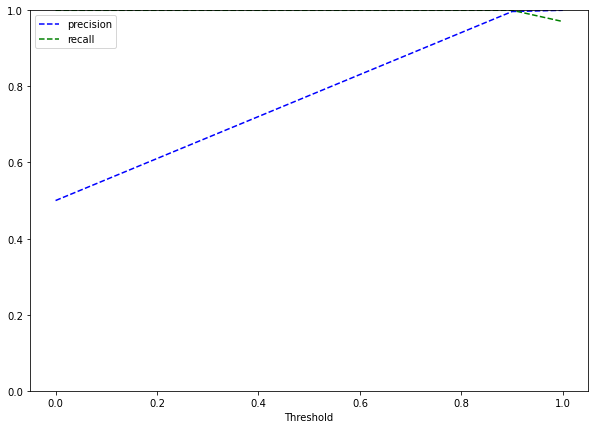

In [83]:
y_scores=clf.predict_proba(X_train_resampled) #predict_proba gives the probability of each observation belonging to each class
 
 
precisions, recalls, thresholds = precision_recall_curve(y_train_resampled, y_scores[:,1])
 
#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [84]:
threshold_range = np.arange (0.6, 0.8, 0.01)
print(threshold_range)

[0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73
 0.74 0.75 0.76 0.77 0.78 0.79 0.8 ]


In [85]:
threshold1 = []
accuracy1 = []

#for p in np.unique(logclass.predict_proba(X_train_resampled_new)[:,1]):
for p in np.unique(threshold_range):
  threshold1.append(p)
  y_pred = (clf.predict_proba(X_train_resampled)[:,1] >= p).astype(int)
  accuracy1.append(accuracy_score(y_train_resampled,y_pred))

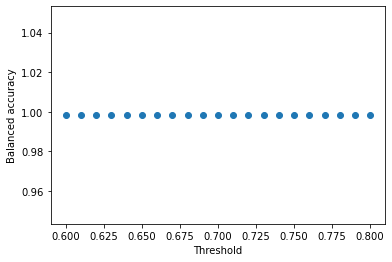

<Figure size 4000x2800 with 0 Axes>

In [86]:
plt.scatter(threshold1,accuracy1)

plt.xlabel("Threshold")
plt.ylabel("Balanced accuracy")
plt.figure(figsize=(10,7),dpi=400)
plt.show()

### Finding an optimal Thresold for classification

In [87]:
optimal_threshold = threshold1[np.argmax(accuracy1)]
print(optimal_threshold)

0.6


### Prediction using the optimal Thresold for classification

In [88]:
y_train_pred_DT = (clf.predict_proba(X_train_resampled)[:,1] >= optimal_threshold).astype(int)
y_test_pred_DT = (clf.predict_proba(X_test_resampled)[:,1] >= optimal_threshold).astype(int)

### Re-Evaluation after setting the new threshold value 

In [89]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(y_train_resampled, y_train_pred_DT))
print(classification_report(y_train_resampled, y_train_pred_DT))
print("Accuracy Of Decision Tree Classification on Train Dataset is -->",accuracy_score(y_train_resampled, y_train_pred_DT))
print("=================================\n")
print(confusion_matrix(y_test_resampled, y_test_pred_DT))
print(classification_report(y_test_resampled, y_test_pred_DT))
print("Accuracy Of Decision Tree Classification Test Dataset is-->",accuracy_score(y_test_resampled, y_test_pred_DT))


[[303   1]
 [  0 304]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       1.00      1.00      1.00       304

    accuracy                           1.00       608
   macro avg       1.00      1.00      1.00       608
weighted avg       1.00      1.00      1.00       608

Accuracy Of Decision Tree Classification on Train Dataset is --> 0.9983552631578947

[[103   0]
 [  8  95]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       103
           1       1.00      0.92      0.96       103

    accuracy                           0.96       206
   macro avg       0.96      0.96      0.96       206
weighted avg       0.96      0.96      0.96       206

Accuracy Of Decision Tree Classification Test Dataset is--> 0.9611650485436893


### ROC curve for Decision Tree

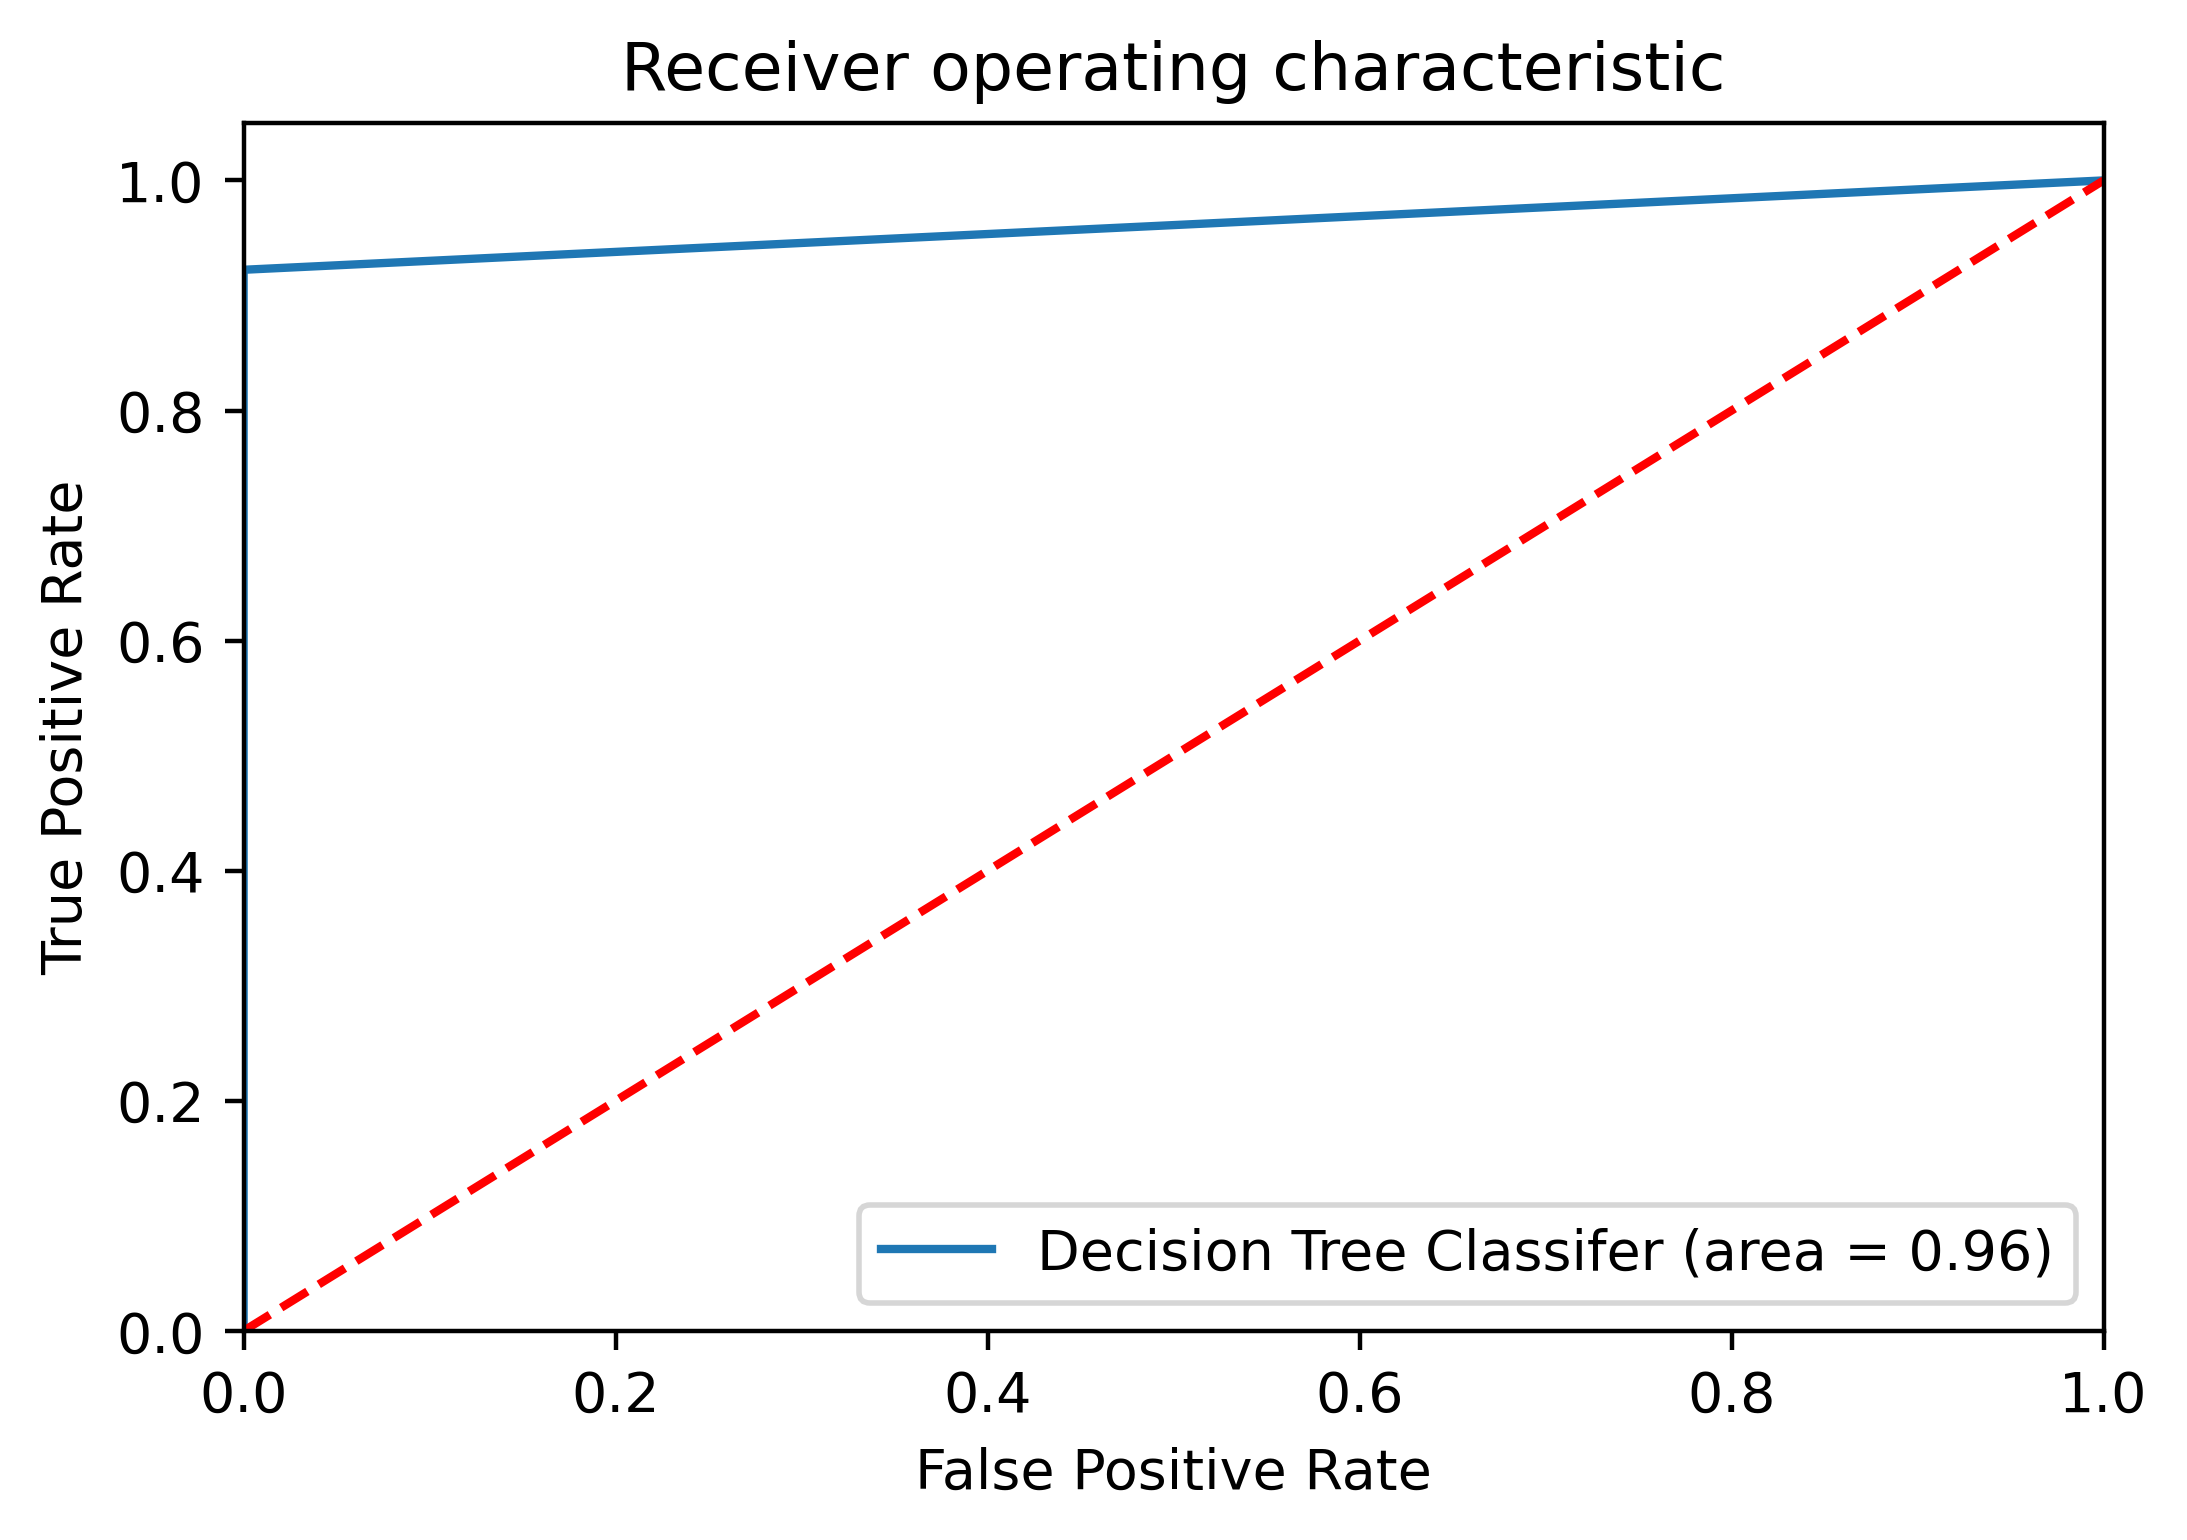

In [90]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
dt_roc_auc = roc_auc_score(y_test_resampled, y_test_pred_DT)
fpr, tpr, thresholds = roc_curve(y_test_resampled, y_test_pred_DT)
plt.figure(dpi=400)
plt.plot(fpr, tpr, label='Decision Tree Classifer (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [91]:
feature_cols = X.columns
print(feature_cols)

Index(['MScore'], dtype='object')


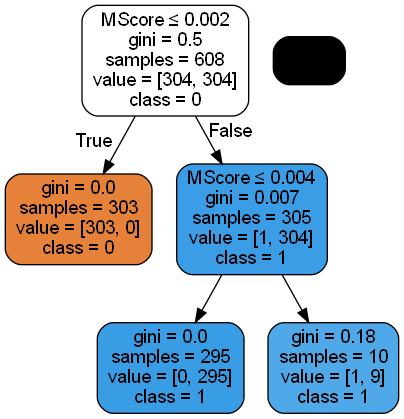

In [93]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('paysim.png')
Image(graph.create_png())

### Features Importance for Decesion Tree

<AxesSubplot:title={'center':'Feature Importance'}>

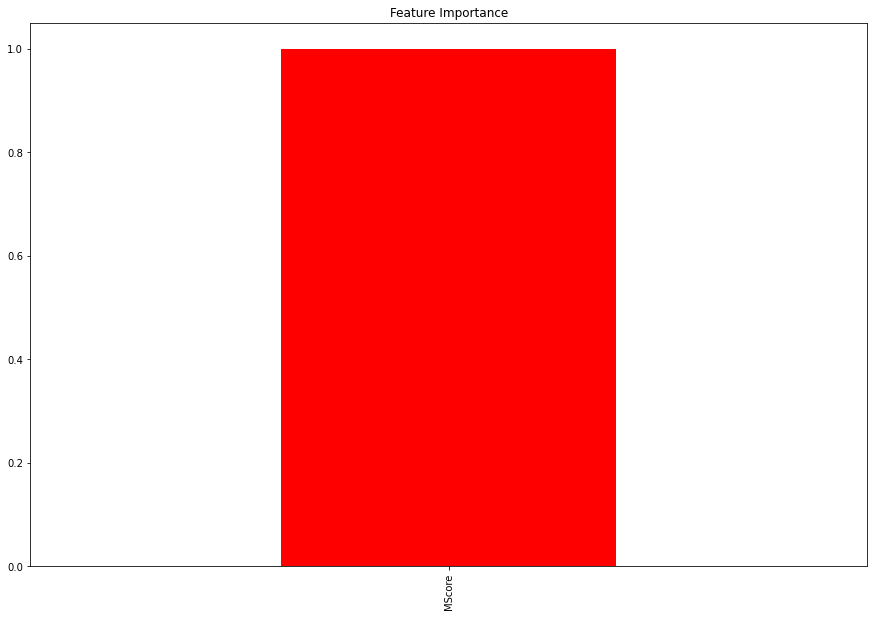

In [94]:
skplt.estimators.plot_feature_importances(clf, feature_names=feature_cols,figsize=(15, 10), x_tick_rotation=90)

# Random Forest With Parameter Tuning

In [95]:
#Models
from sklearn.ensemble import RandomForestClassifier

In [96]:
grid = { 
    'n_estimators': [10, 5],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'min_samples_leaf' : [2,5,10,20],
}
 
CV=RandomForestClassifier()
CV_rfc=GridSearchCV(CV, grid, cv= 5)
CV_rfc.fit(X_train_resampled, y_train_resampled)
 
print ("best params:", CV_rfc.best_params_)
print ("Test Score:",CV_rfc.score(X_test_resampled, y_test_resampled) )
 

best params: {'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 10}
Test Score: 0.9611650485436893


In [97]:
rfc = RandomForestClassifier(n_estimators =200, criterion ='entropy',max_features = 'log2',max_depth= 8 ,min_samples_leaf= 2,random_state=123)
rfc = rfc.fit(X_train_resampled, y_train_resampled)

In [98]:
# check the accuracy on the training set
print("accuracy on the training set:",rfc.score(X_train_resampled, y_train_resampled))

# check the accuracy on the test dataset
print("accuracy on the testing set:",rfc.score(X_test_resampled, y_test_resampled))

accuracy on the training set: 0.9983552631578947
accuracy on the testing set: 0.9611650485436893


In [99]:
# Predict class labels for the train set
y_train_pred_RFT = rfc.predict(X_train_resampled)
# Confusion Matrix for train data
print('Confusion Matrix on train data')
print(confusion_matrix( y_train_resampled,y_train_pred_RFT))

# Predict class labels for the test dataset
y_test_pred_RFT = rfc.predict(X_test_resampled)
# Confusion Matrix for test data
print('Confusion Matrix on test data')
print(confusion_matrix( y_test_resampled,y_test_pred_RFT))

Confusion Matrix on train data
[[303   1]
 [  0 304]]
Confusion Matrix on test data
[[103   0]
 [  8  95]]


In [100]:
RFT_confMat_train = confusion_matrix( y_train_resampled,y_train_pred_RFT)
RFT_confMat_test = confusion_matrix( y_test_resampled,y_test_pred_RFT)

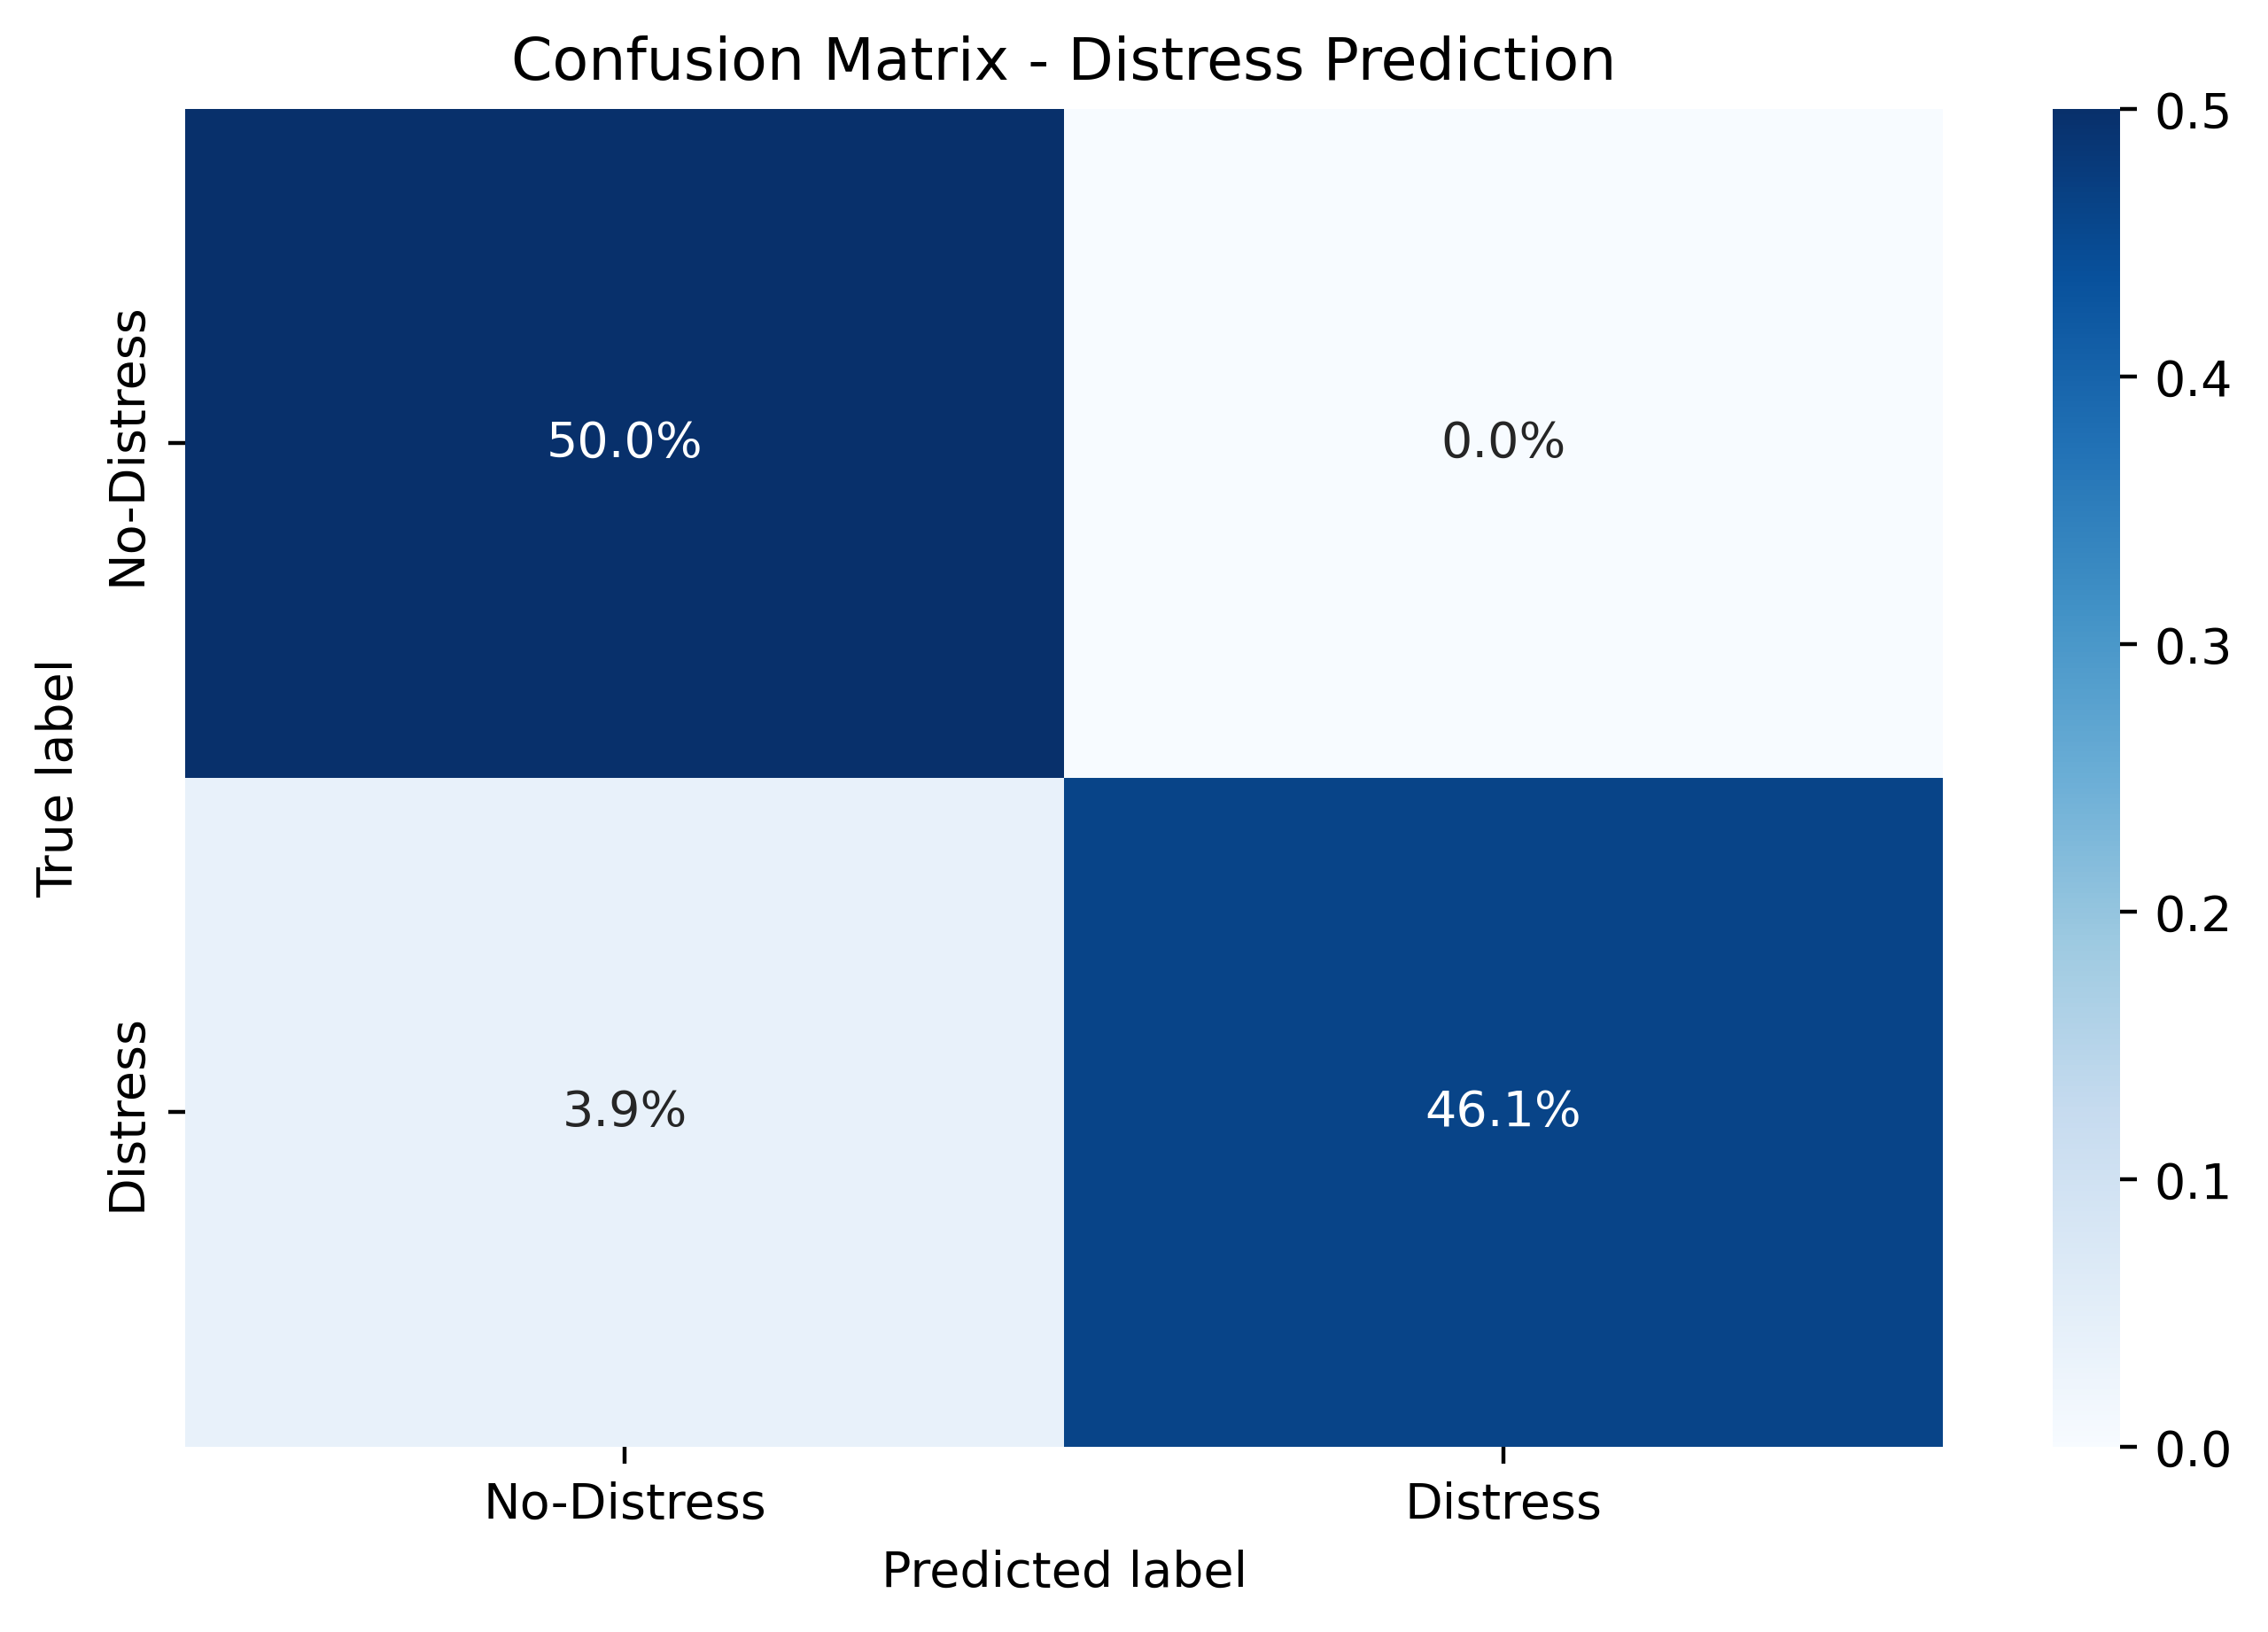

In [101]:
plt.figure(figsize=(8,5),dpi=400)
heatmap=sns.heatmap(RFT_confMat_test/np.sum(RFT_confMat_test),annot=True, 
            fmt= '.1%', cmap= 'Blues',
            xticklabels = ['No-Distress', 'Distress'], 
            yticklabels = ['No-Distress', 'Distress'])
plt.xlabel("Predicted label") 
plt.ylabel("True label")
plt.title("Confusion Matrix - Distress Prediction");

In [102]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(y_train_resampled, y_train_pred_RFT))
print(classification_report(y_train_resampled, y_train_pred_RFT))
print("Accuracy Of Random Forest Classification on Train Dataset is -->",accuracy_score(y_train_resampled, y_train_pred_RFT))
print("=================================\n")
print(confusion_matrix(y_test_resampled, y_test_pred_RFT))
print(classification_report(y_test_resampled, y_test_pred_RFT))
print("Accuracy Of Random Forest Classification Test Dataset is-->",accuracy_score(y_test_resampled, y_test_pred_RFT))


[[303   1]
 [  0 304]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       1.00      1.00      1.00       304

    accuracy                           1.00       608
   macro avg       1.00      1.00      1.00       608
weighted avg       1.00      1.00      1.00       608

Accuracy Of Random Forest Classification on Train Dataset is --> 0.9983552631578947

[[103   0]
 [  8  95]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       103
           1       1.00      0.92      0.96       103

    accuracy                           0.96       206
   macro avg       0.96      0.96      0.96       206
weighted avg       0.96      0.96      0.96       206

Accuracy Of Random Forest Classification Test Dataset is--> 0.9611650485436893


### Getting Optimal Threshold for Random Forest Model

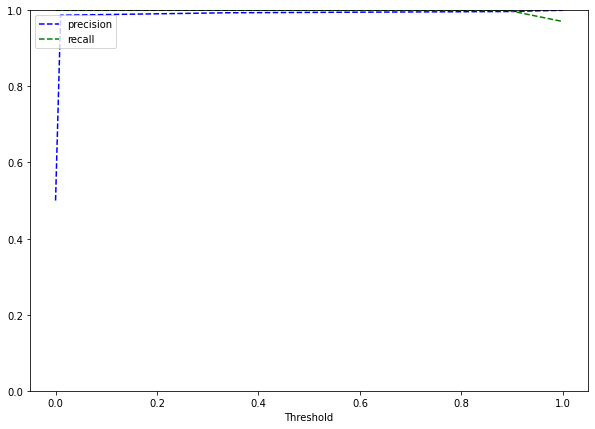

In [103]:
y_scores=rfc.predict_proba(X_train_resampled) #predict_proba gives the probability of each observation belonging to each class
 
 
precisions, recalls, thresholds = precision_recall_curve(y_train_resampled, y_scores[:,1])
 
#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [104]:
threshold_range = np.arange (0.4, 0.6, 0.01)
print(threshold_range)

[0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53
 0.54 0.55 0.56 0.57 0.58 0.59]


In [105]:
threshold1 = []
accuracy1 = []

#for p in np.unique(logclass.predict_proba(X_train_resampled_new)[:,1]):
for p in np.unique(threshold_range):
  threshold1.append(p)
  y_pred = (rfc.predict_proba(X_train_resampled)[:,1] >= p).astype(int)
  accuracy1.append(accuracy_score(y_train_resampled,y_pred))

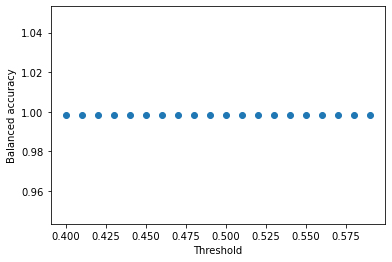

<Figure size 4000x2800 with 0 Axes>

In [106]:
plt.scatter(threshold1,accuracy1)

plt.xlabel("Threshold")
plt.ylabel("Balanced accuracy")
plt.figure(figsize=(10,7),dpi=400)
plt.show()

### Finding an optimal Thresold for classification

In [107]:
optimal_threshold = threshold1[np.argmax(accuracy1)]
print(optimal_threshold)

0.4


### Prediction using the optimal Thresold for classification

In [108]:
y_train_pred_RFT = (rfc.predict_proba(X_train_resampled)[:,1] >= optimal_threshold).astype(int)
y_test_pred_RFT = (rfc.predict_proba(X_test_resampled)[:,1] >= optimal_threshold).astype(int)

### Re-Evaluation after setting the new threshold value

In [109]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(y_train_resampled, y_train_pred_RFT))
print(classification_report(y_train_resampled, y_train_pred_RFT))
print("Accuracy Of Random Forest Classification on Train Dataset is -->",accuracy_score(y_train_resampled, y_train_pred_RFT))
print("=================================\n")
print(confusion_matrix(y_test_resampled, y_test_pred_RFT))
print(classification_report(y_test_resampled, y_test_pred_RFT))
print("Accuracy Of Random Forest Classification Test Dataset is-->",accuracy_score(y_test_resampled, y_test_pred_RFT))


[[303   1]
 [  0 304]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       1.00      1.00      1.00       304

    accuracy                           1.00       608
   macro avg       1.00      1.00      1.00       608
weighted avg       1.00      1.00      1.00       608

Accuracy Of Random Forest Classification on Train Dataset is --> 0.9983552631578947

[[103   0]
 [  8  95]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       103
           1       1.00      0.92      0.96       103

    accuracy                           0.96       206
   macro avg       0.96      0.96      0.96       206
weighted avg       0.96      0.96      0.96       206

Accuracy Of Random Forest Classification Test Dataset is--> 0.9611650485436893


### ROC curver for Random Forest

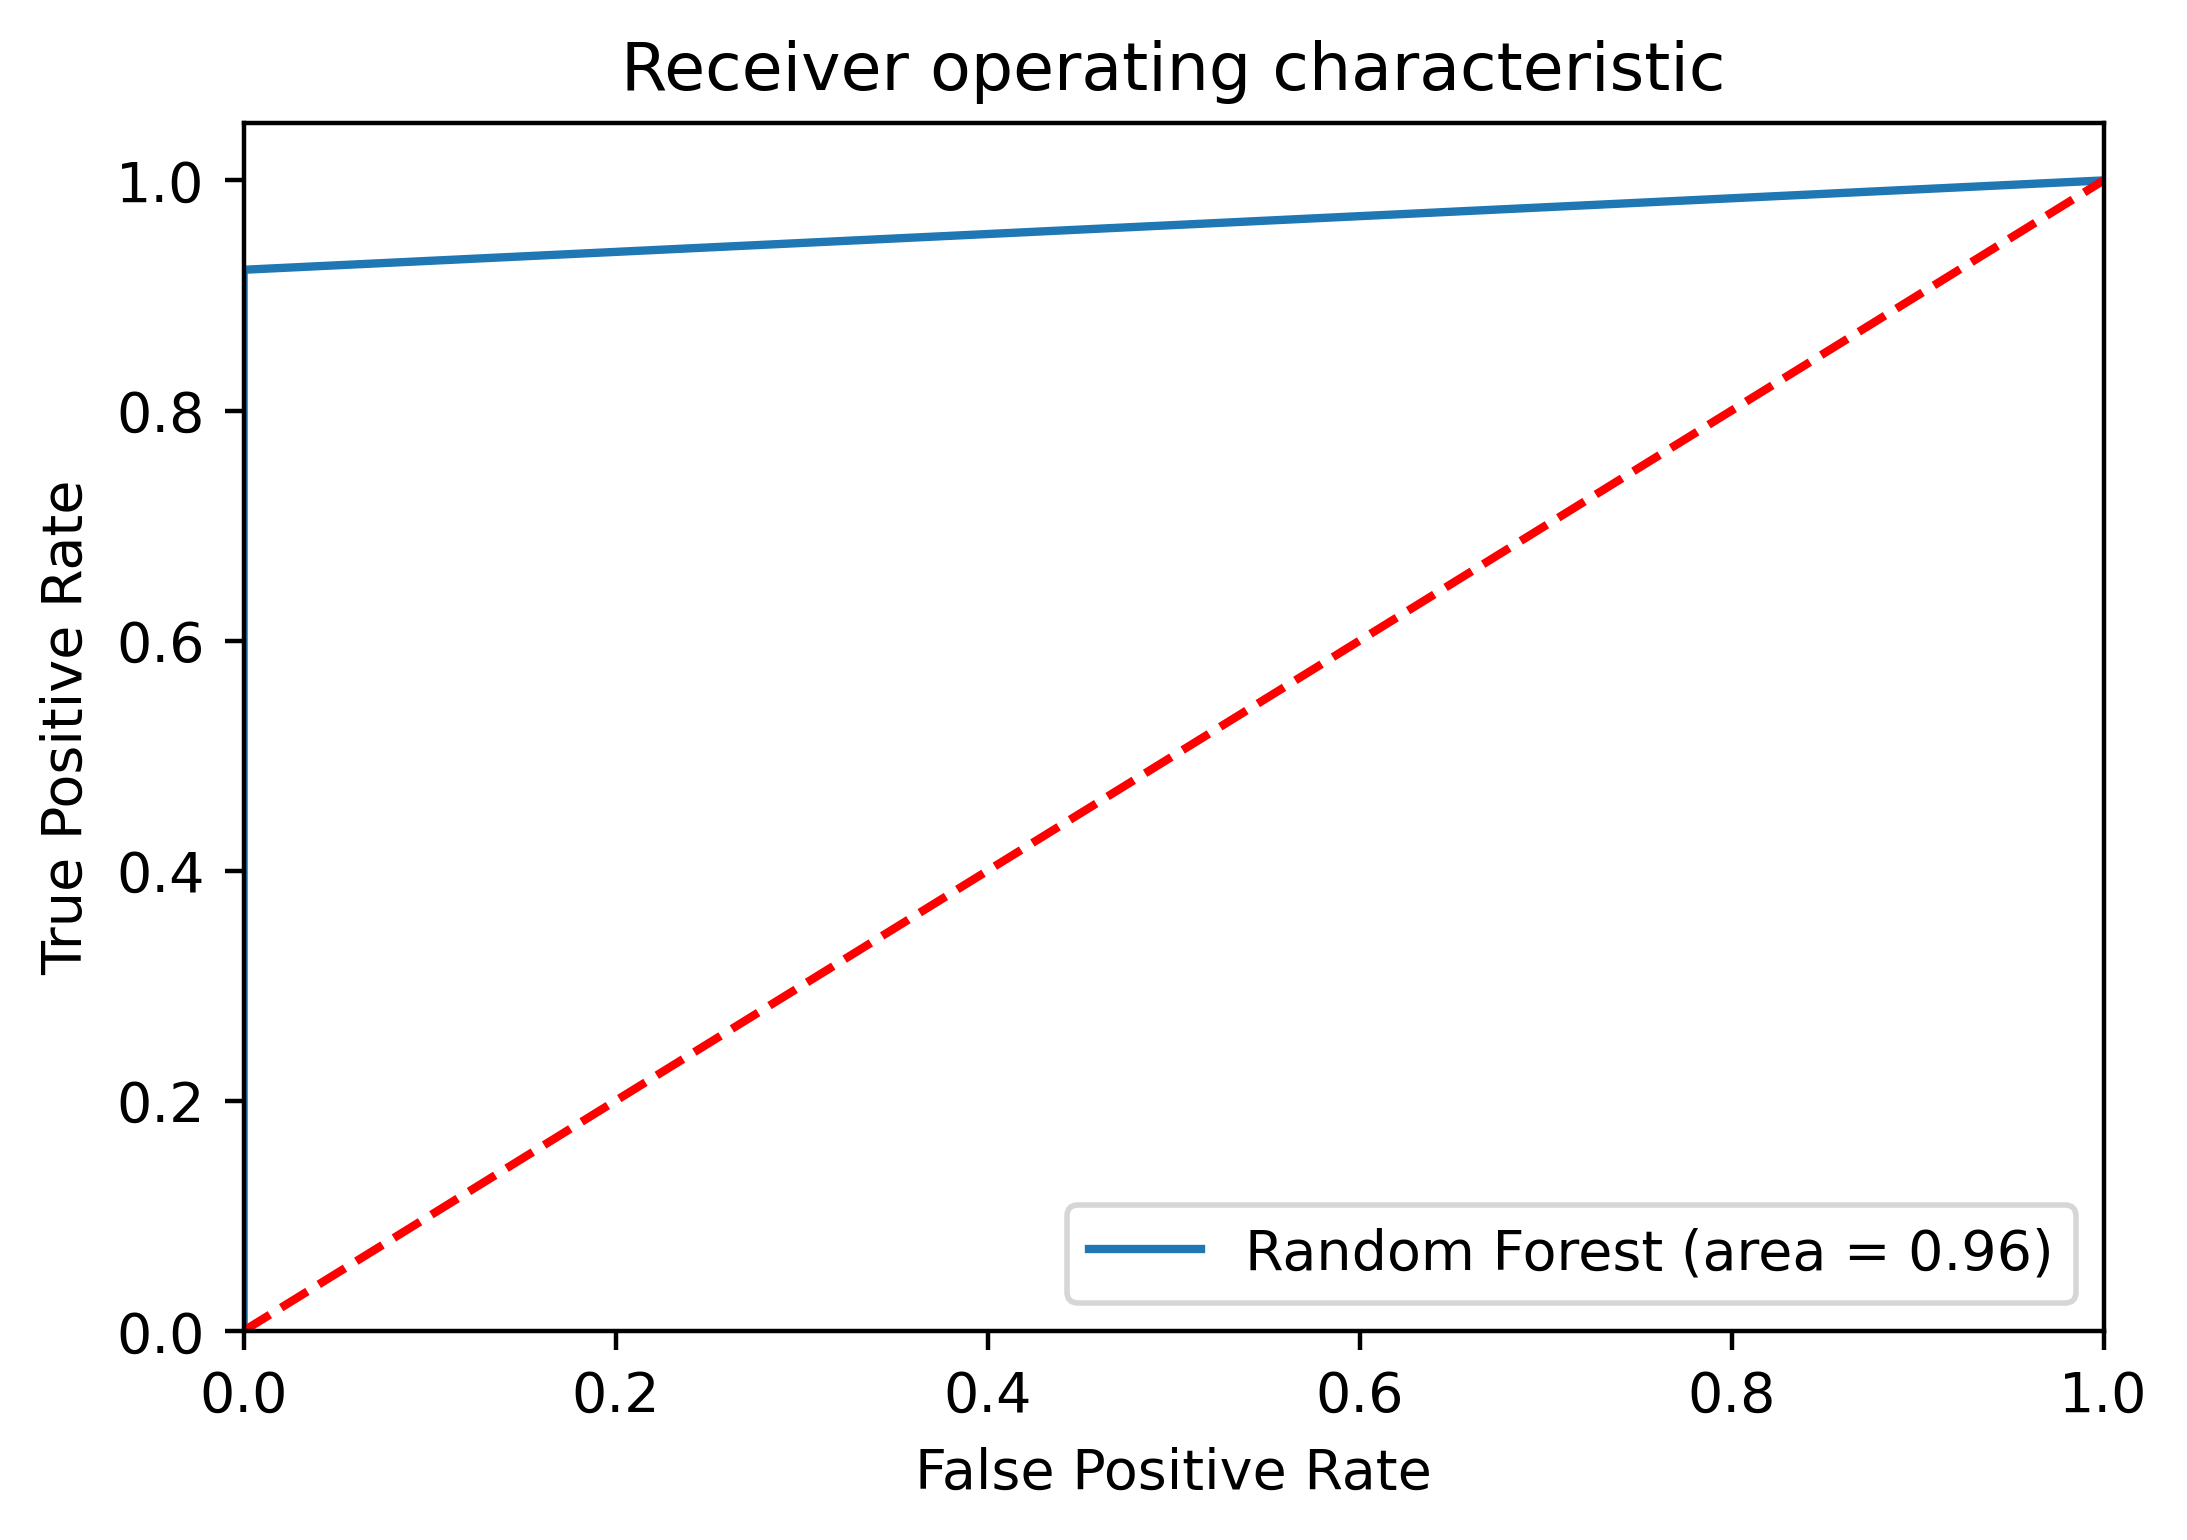

In [110]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rfc_roc_auc = roc_auc_score(y_test_resampled, y_test_pred_RFT)
fpr, tpr, thresholds = roc_curve(y_test_resampled, y_test_pred_RFT)
plt.figure(dpi =400)
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rfc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RFC_ROC')
plt.show()

## SVM Classifer with Parameter Tuning

In [162]:
df_svm=df_log.copy()
y=pd.DataFrame(df_svm.loc[:,'MScore Binary'])
X=df_svm[['MScore']]
#X=df_log.loc[:,df_log.columns.drop(['MScore Binary'])]['MScore']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=123)

X_train_resampled, y_train_resampled = method.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = method.fit_resample(X_test, y_test)

In [163]:
from sklearn.svm import SVC
SVC=SVC()
SVC.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [164]:
svclassifier = SVC.fit(X_train_resampled, y_train_resampled)

In [165]:
from sklearn.model_selection import GridSearchCV
hyperparameters = {'C': [0.1,1, 10, 100],
             'gamma': [1,0.1,0.01,0.001],
             'kernel': ['sigmoid','rbf'],
              'degree': [2,3,4,5]}

svc_clf = GridSearchCV(svclassifier, hyperparameters, cv=10, verbose=0)
print(svc_clf)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4, 5],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['sigmoid', 'rbf']})


In [168]:
#y_val_pred_SVM = svc_clf.fit(X_val_resampled,y_val_resampled)
result = svc_clf.fit(X_train_resampled,y_train_resampled)

In [169]:
# get the best performing model fit on the whole training set
best_model_SVM = result.best_estimator_
print(best_model_SVM)

SVC(C=100, degree=2, gamma=1)


In [170]:
#Print all the Parameters that gave the best results:
print('Best Parameters',svc_clf.best_params_)

Best Parameters {'C': 100, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}


In [171]:
y_train_pred_SVM = best_model_SVM.predict(X_train_resampled)
#y_val_pred_SVM = svc_clf.predict(X_val_resampled)
y_test_pred_SVM = best_model_SVM.predict(X_test_resampled)

### SVM Performance Evaluation 

In [172]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(y_train_resampled, y_train_pred_SVM))
print(classification_report(y_train_resampled, y_train_pred_SVM))
print("Accuracy Of Support Vector Classifiers on Train Dataset is -->",accuracy_score(y_train_resampled, y_train_pred_SVM))
print("=================================\n")
print(confusion_matrix(y_test_resampled, y_test_pred_SVM))
print(classification_report(y_test_resampled, y_test_pred_SVM))
print("Accuracy Of  Support Vector Classifiers on Test Dataset is-->",accuracy_score(y_test_resampled, y_test_pred_SVM))

print("=================================\n")
#print(confusion_matrix(y_val_resampled, y_val_pred_SVM))
#print(classification_report(y_val_resampled, y_val_pred_SVM))
#print("Accuracy Of  Support Vector Classifiers on Validation Dataset is-->",accuracy_score(y_val_resampled, y_val_pred_SVM))


[[303   1]
 [  0 304]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       1.00      1.00      1.00       304

    accuracy                           1.00       608
   macro avg       1.00      1.00      1.00       608
weighted avg       1.00      1.00      1.00       608

Accuracy Of Support Vector Classifiers on Train Dataset is --> 0.9983552631578947

[[103   0]
 [  8  95]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       103
           1       1.00      0.92      0.96       103

    accuracy                           0.96       206
   macro avg       0.96      0.96      0.96       206
weighted avg       0.96      0.96      0.96       206

Accuracy Of  Support Vector Classifiers on Test Dataset is--> 0.9611650485436893



In [173]:
score=cross_val_score(svclassifier, X_test_resampled, y_test_resampled, cv = 10, scoring='accuracy')
print(score)
print("Mean 10-Fold: {}".format(np.mean(score)))

[0.76190476 0.85714286 0.61904762 0.61904762 0.85714286 0.76190476
 0.7        0.75       0.8        0.9       ]
Mean 10-Fold: 0.7626190476190475


[[103   0]
 [  8  95]]


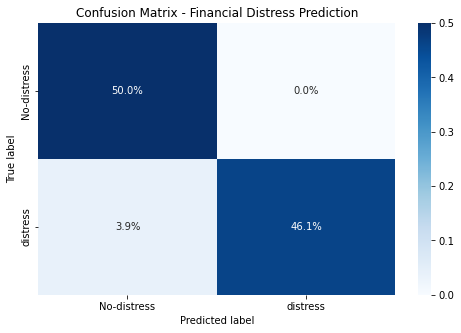

In [174]:
from sklearn.metrics import confusion_matrix
cmsvc = confusion_matrix(y_test_resampled, y_test_pred_SVM)
print(cmsvc)
plt.figure(figsize=(8,5))
heatmap=sns.heatmap(cmsvc/np.sum(cmsvc),annot=True, 
            fmt= '.1%', cmap= 'Blues',
            xticklabels = ['No-distress', 'distress'], 
            yticklabels = ['No-distress', 'distress'])
plt.xlabel("Predicted label") 
plt.ylabel("True label")
plt.title("Confusion Matrix - Financial Distress Prediction");

### Getting Optimal Threshold for SVM Model--- predict_proba  is not available for SVM Classification

### ROC Curve for SVM Classification

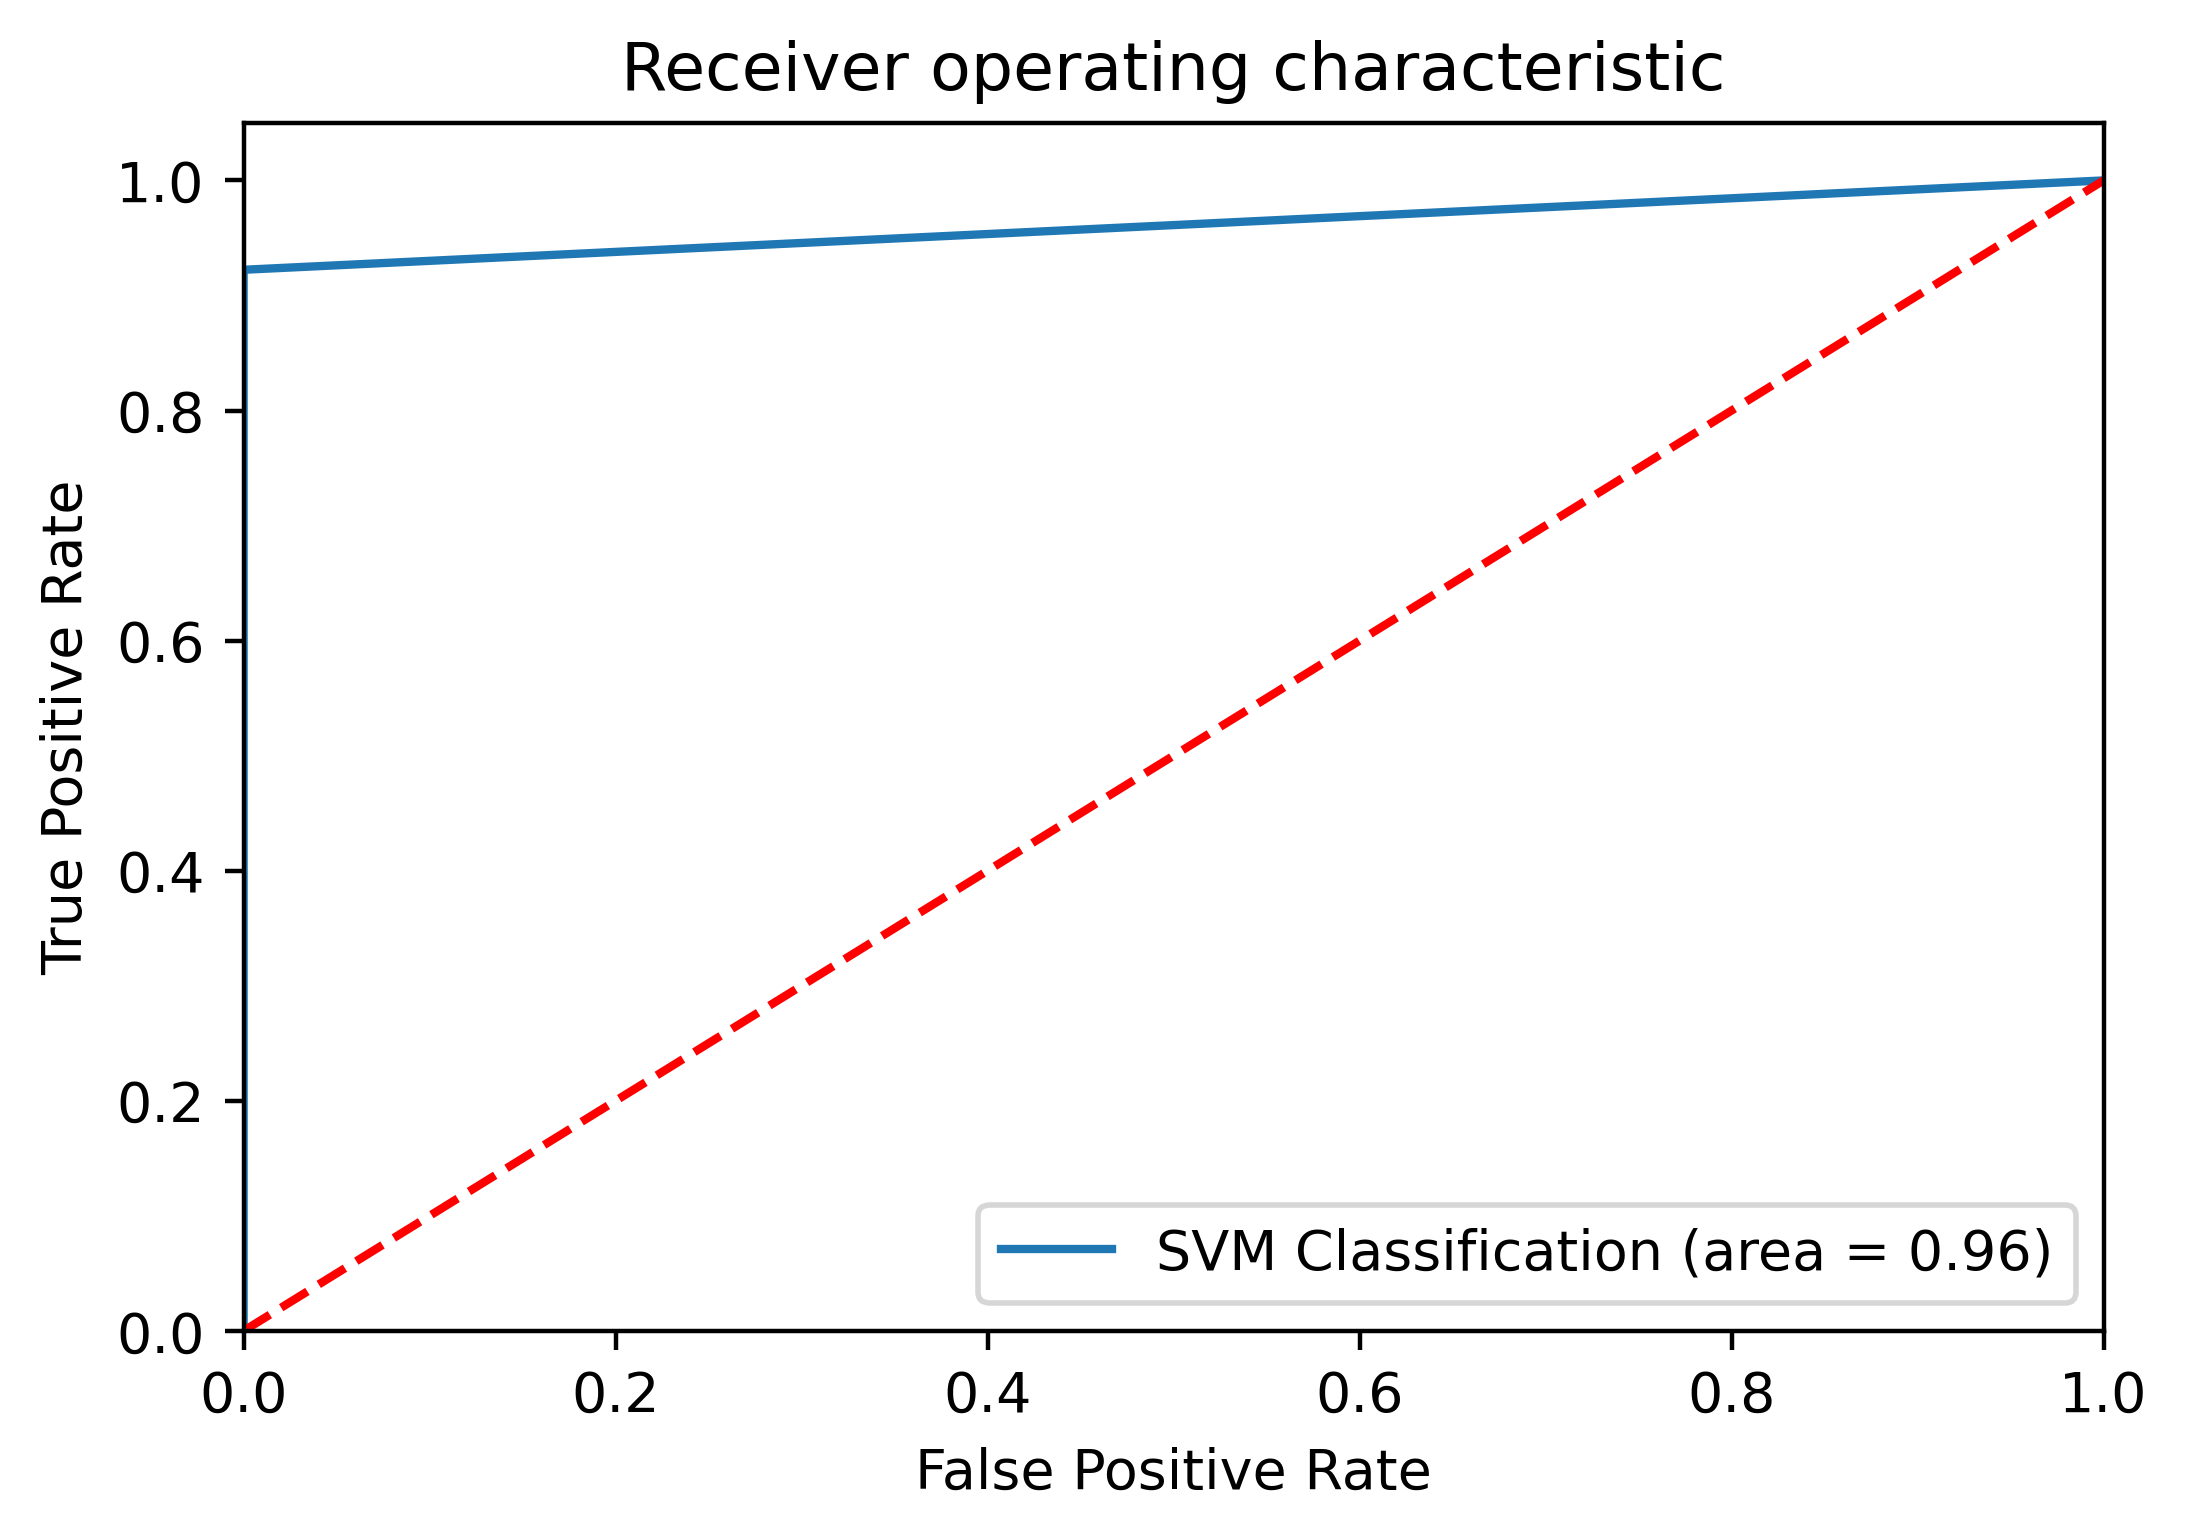

In [175]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
svm_roc_auc = roc_auc_score(y_test_resampled, y_test_pred_SVM)
fpr, tpr, thresholds = roc_curve(y_test_resampled, y_test_pred_SVM)
plt.figure(dpi=400)
plt.plot(fpr, tpr, label='SVM Classification (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('SVM_ROC')
plt.show()

### ANN model starts here

In [176]:
import tensorflow as tf
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import precision_score, recall_score
from keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.python.keras import regularizers
import warnings
warnings.simplefilter(action='ignore')

In [177]:
df_log

Companies    MScore  MScore Binary       ROA        CR        QR  \
0       ENB.TO -3.139361              0  0.036651  0.491470  0.399857   
1     BAM-A.TO -2.844616              0  0.010143  0.864695  0.733200   
2        CP.TO  0.269938              1  0.041832  0.427984  0.353593   
3       CNQ.TO -3.755082              0  0.099967  0.800593  0.592024   
4       NTR.TO -3.145775              0  0.063118  1.112754  0.604195   
..         ...       ...            ...       ...       ...       ...   
458      NVI.V -3.304670              0 -0.012543  0.929688  0.690223   
459      TTZ.V -3.392792              0  0.155359  7.861406  7.303970   
460      CHN.V -3.872002              0  0.033698  1.077998  1.077998   
461  RCG-PB.TO -0.576305              1 -0.009094  1.095585  1.095585   
462   AX-PE.TO -3.449364              0  0.085047  0.356267  0.290368   

          AccRT        AccPT        InvT        AT  ...            EV  \
0     47.928980    34.661469   18.724274  0.278751  ...  1.825730e+11   
1     77.587382   140.426510   48.801641  0.193684  ...  2.675664e+11   
2     37.390244     0.000000   24.019882  0.117268  ...  8.257092e+10   
3     34.562458     8.921136   25.363379  0.428540  ...  9.231347e+10   
4     70.676602     0.000000  126.193520  0.554750  ...  6.134212e+10   
..          ...          ...         ...       ...  ...           ...   
458   56.987813    78.922903  157.862108  0.761088  ...  6.397385e+06   
459   35.066274    27.650878   70.104428  0.443488  ...  1.995745e+06   
460  150.042592    85.394251    0.000000  1.028721  ...  3.538023e+06   
461  842.774588  1819.352549    0.000000  0.148248  ... -4.007280e+08   
462   13.493286    31.977383  126.352180  0.091673  ...  1.744164e+09   

        MarketCap     Rev_G       NI_G       D_G  CG_Score  ARO  BoardS  \
0    1.072190e+11  0.204262   0.840321  0.130693       6.0  3.0     9.0   
1    1.043284e+11  0.206830  30.597015  0.123276       8.0  4.0     6.0   
2    6.251292e+10  0.036965   0.166939  0.996330       1.0  1.0     1.0   
3    7.677947e+10  0.878337  18.618391 -0.241225       7.0  4.0     8.0   
4    5.099512e+10  0.325426   5.869281  0.078024       2.0  1.0     2.0   
..            ...       ...        ...       ...       ...  ...     ...   
458  4.010435e+06  0.447050   0.935005 -0.111403       NaN  NaN     NaN   
459  3.495102e+06  0.152444   0.892480 -0.092201       NaN  NaN     NaN   
460  4.736498e+06 -0.209263   1.513089  0.027204       NaN  NaN     NaN   
461  0.000000e+00  3.343881  -1.701012 -0.147397       NaN  NaN     NaN   
462  0.000000e+00 -0.085894  17.065033 -0.179926       7.0  8.0     7.0   

     ShareR  Comp  
0       4.0   3.0  
1       9.0   6.0  
2       1.0   1.0  
3       7.0   1.0  
4       4.0   5.0  
..      ...   ...  
458     NaN   NaN  
459     NaN   NaN  
460     NaN   NaN  
461     NaN   NaN  
462     1.0  10.0  

[463 rows x 40 columns]

In [178]:
y=pd.DataFrame(df_log.loc[:,'MScore Binary'])
X=df_log[['MScore']]
#X=df_log.loc[:,df_log.columns.drop(['MScore Binary'])]['MScore']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=123)

In [180]:
features= X.columns
print(features)

Index(['MScore'], dtype='object')


In [181]:
#I will look at a model that involved three dense lawyer and one dropout layer to prevent overfitting problems 
# Add one dropout layer so the model can learn from a fraction of the weights
model = Sequential() ##initialization of ANN
#First hidden layer
model.add(Dense(16, input_dim=len(features),kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model.add(Dropout(0.5))
#Second hidden layer
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
#Third hidden layer
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))#added because this is a binary classification problem
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                32        
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 batch_normalization_1 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 4)                 36        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                      

### Compile ANN model

In [182]:
#compiling the ANN model
model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [183]:
model.fit(X_train_resampled, y_train_resampled, epochs=400, batch_size=100)#according to sklearn batch size at default =min(200, n_samples)

Epoch 1/400
7/7 [==============================] - 1s 1ms/step - loss: 0.6944 - accuracy: 0.5806
Epoch 2/400
7/7 [==============================] - 0s 834us/step - loss: 0.7033 - accuracy: 0.6086
Epoch 3/400
7/7 [==============================] - 0s 999us/step - loss: 0.7071 - accuracy: 0.5280
Epoch 4/400
7/7 [==============================] - 0s 1ms/step - loss: 0.6893 - accuracy: 0.6151
Epoch 5/400
7/7 [==============================] - 0s 1ms/step - loss: 0.6901 - accuracy: 0.5806
Epoch 6/400
7/7 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.6003
Epoch 7/400
7/7 [==============================] - 0s 1ms/step - loss: 0.6881 - accuracy: 0.5888
Epoch 8/400
7/7 [==============================] - 0s 1ms/step - loss: 0.6726 - accuracy: 0.6266
Epoch 9/400
7/7 [==============================] - 0s 1ms/step - loss: 0.6840 - accuracy: 0.6135
Epoch 10/400
7/7 [==============================] - 0s 1ms/step - loss: 0.6800 - accuracy: 0.6053
Epoch 11/400
7/7 [=======

7/7 [==============================] - 0s 1ms/step - loss: 0.2909 - accuracy: 0.8914
Epoch 85/400
7/7 [==============================] - 0s 1ms/step - loss: 0.2686 - accuracy: 0.9095
Epoch 86/400
7/7 [==============================] - 0s 1000us/step - loss: 0.2386 - accuracy: 0.9112
Epoch 87/400
7/7 [==============================] - 0s 1ms/step - loss: 0.2759 - accuracy: 0.8931
Epoch 88/400
7/7 [==============================] - 0s 1ms/step - loss: 0.2525 - accuracy: 0.9128
Epoch 89/400
7/7 [==============================] - 0s 1ms/step - loss: 0.2695 - accuracy: 0.8947
Epoch 90/400
7/7 [==============================] - 0s 1ms/step - loss: 0.2841 - accuracy: 0.9062
Epoch 91/400
7/7 [==============================] - 0s 1ms/step - loss: 0.2722 - accuracy: 0.9013
Epoch 92/400
7/7 [==============================] - 0s 1ms/step - loss: 0.2649 - accuracy: 0.9062
Epoch 93/400
7/7 [==============================] - 0s 1ms/step - loss: 0.2343 - accuracy: 0.9194
Epoch 94/400
7/7 [============

Epoch 167/400
7/7 [==============================] - 0s 1ms/step - loss: 0.1381 - accuracy: 0.9737
Epoch 168/400
7/7 [==============================] - 0s 1ms/step - loss: 0.1325 - accuracy: 0.9671
Epoch 169/400
7/7 [==============================] - 0s 1ms/step - loss: 0.1372 - accuracy: 0.9605
Epoch 170/400
7/7 [==============================] - 0s 1ms/step - loss: 0.1314 - accuracy: 0.9539
Epoch 171/400
7/7 [==============================] - 0s 1ms/step - loss: 0.1071 - accuracy: 0.9671
Epoch 172/400
7/7 [==============================] - 0s 1ms/step - loss: 0.1022 - accuracy: 0.9671
Epoch 173/400
7/7 [==============================] - 0s 1ms/step - loss: 0.1360 - accuracy: 0.9753
Epoch 174/400
7/7 [==============================] - 0s 1ms/step - loss: 0.1401 - accuracy: 0.9605
Epoch 175/400
7/7 [==============================] - 0s 1ms/step - loss: 0.1157 - accuracy: 0.9786
Epoch 176/400
7/7 [==============================] - 0s 1ms/step - loss: 0.1038 - accuracy: 0.9655
Epoch 177/

7/7 [==============================] - 0s 1ms/step - loss: 0.1201 - accuracy: 0.9720
Epoch 250/400
7/7 [==============================] - 0s 1ms/step - loss: 0.1101 - accuracy: 0.9819
Epoch 251/400
7/7 [==============================] - 0s 1ms/step - loss: 0.1060 - accuracy: 0.9770
Epoch 252/400
7/7 [==============================] - 0s 1ms/step - loss: 0.1188 - accuracy: 0.9770
Epoch 253/400
7/7 [==============================] - 0s 1ms/step - loss: 0.1055 - accuracy: 0.9786
Epoch 254/400
7/7 [==============================] - 0s 1ms/step - loss: 0.0846 - accuracy: 0.9770
Epoch 255/400
7/7 [==============================] - 0s 1ms/step - loss: 0.0674 - accuracy: 0.9901
Epoch 256/400
7/7 [==============================] - 0s 1ms/step - loss: 0.0932 - accuracy: 0.9638
Epoch 257/400
7/7 [==============================] - 0s 1ms/step - loss: 0.0963 - accuracy: 0.9737
Epoch 258/400
7/7 [==============================] - 0s 1ms/step - loss: 0.1143 - accuracy: 0.9572
Epoch 259/400
7/7 [=====

7/7 [==============================] - 0s 1ms/step - loss: 0.0567 - accuracy: 0.9868
Epoch 332/400
7/7 [==============================] - 0s 1ms/step - loss: 0.1188 - accuracy: 0.9622
Epoch 333/400
7/7 [==============================] - 0s 1ms/step - loss: 0.0903 - accuracy: 0.9803
Epoch 334/400
7/7 [==============================] - 0s 1ms/step - loss: 0.0709 - accuracy: 0.9819
Epoch 335/400
7/7 [==============================] - 0s 1ms/step - loss: 0.0804 - accuracy: 0.9852
Epoch 336/400
7/7 [==============================] - 0s 1ms/step - loss: 0.0940 - accuracy: 0.9720
Epoch 337/400
7/7 [==============================] - 0s 1ms/step - loss: 0.0846 - accuracy: 0.9770
Epoch 338/400
7/7 [==============================] - 0s 1ms/step - loss: 0.0661 - accuracy: 0.9770
Epoch 339/400
7/7 [==============================] - 0s 1ms/step - loss: 0.0718 - accuracy: 0.9836
Epoch 340/400
7/7 [==============================] - 0s 1ms/step - loss: 0.0812 - accuracy: 0.9737
Epoch 341/400
7/7 [=====

In [184]:
scores = model.evaluate(X_test_resampled, y_test_resampled)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

7/7 [==============================] - 0s 832us/step - loss: 0.1681 - accuracy: 1.0000

accuracy: 100.00%


In [185]:
y_train_preds_AI = [round(x[0]) for x in model.predict(X_train_resampled)]
y_test_preds_AI = [round(x[0]) for x in model.predict(X_test_resampled)]

7/7 [==============================] - 0s 666us/step


### Performance Evaluation for ANN model

In [186]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(y_train_resampled, y_train_preds_AI))
print(classification_report(y_train_resampled, y_train_preds_AI))
print("Accuracy Of AI Sequential Classifiers on Train Dataset is -->",accuracy_score(y_train_resampled, y_train_preds_AI)*100)
print("=================================\n")
print(confusion_matrix(y_test_resampled, y_test_preds_AI))
print(classification_report(y_test_resampled, y_test_preds_AI))
print("Accuracy Of  AI Sequential Classifiers on Test Dataset is-->",accuracy_score(y_test_resampled, y_test_preds_AI)*100)


[[303   1]
 [  0 304]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       1.00      1.00      1.00       304

    accuracy                           1.00       608
   macro avg       1.00      1.00      1.00       608
weighted avg       1.00      1.00      1.00       608

Accuracy Of AI Sequential Classifiers on Train Dataset is --> 99.83552631578947

[[103   0]
 [  0 103]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       103

    accuracy                           1.00       206
   macro avg       1.00      1.00      1.00       206
weighted avg       1.00      1.00      1.00       206

Accuracy Of  AI Sequential Classifiers on Test Dataset is--> 100.0


## Batch size and Number of Epoch

In [187]:
##Try another variation of the ANN model but across a range of parameters with KerasClassifer
def grv_model(unit):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=unit, activation='relu'))
  model.add(Dropout(0.2))
  model.add(tf.keras.layers.Dense(units=unit, activation='relu'))
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))
  model.add(tf.keras.layers.Dense(units=16, activation='relu'))
  model.add(tf.keras.layers.Dense(units=8, activation='relu'))
  model.add(tf.keras.layers.Dense(units=4, activation='relu'))
  model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
  model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])#changed to sdg
  return model

In [188]:
clf=KerasClassifier(build_fn=grv_model)

In [189]:
params={'batch_size':[10, 20, 30, 25, 35], 
        'nb_epoch':[50, 100, 200],
        'unit':[5,6, 10, 11, 12, 15],
               
        }

In [190]:
grid=GridSearchCV(estimator=clf, param_grid=params, cv=3)#cv will be set to tree because of computational time
grid= grid.fit(X_train_resampled,y_train_resampled)

41/41 [==============================] - 0s 700us/step - loss: 0.6593 - accuracy: 0.6938


11/11 [==============================] - 0s 700us/step - loss: 0.7821 - accuracy: 0.1084


7/7 [==============================] - 0s 834us/step - loss: 0.6938 - accuracy: 0.3941


9/9 [==============================] - 0s 750us/step - loss: 0.7077 - accuracy: 0.0000e+00


6/6 [==============================] - 0s 800us/step - loss: 0.7030 - accuracy: 0.1084


18/18 [==============================] - 1s 765us/step - loss: 1.0854 - accuracy: 0.4408


In [191]:
print("Accuracy: {} using {}".format(round(grid.best_score_,3), 
                                                   grid.best_params_))

Accuracy: 0.601 using {'batch_size': 35, 'nb_epoch': 100, 'unit': 15}


## Dropout and Learning Rate

In [192]:
def grv_model(unit,learn_rate=0.01, dropout_rate=0.0):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=unit, activation='relu'))
  model.add(tf.keras.layers.Dense(units=unit, activation='relu'))
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))
  model.add(tf.keras.layers.Dense(units=16, activation='relu'))
  model.add(tf.keras.layers.Dense(units=8, activation='relu'))
  model.add(tf.keras.layers.Dense(units=4, activation='relu'))
  model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
  model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])#changed to sdg
  return model

In [193]:
clf=KerasClassifier(build_fn=grv_model)

In [194]:
params={'learn_rate': [0.001, 0.01, 0.1],
        'dropout_rate': [0.0, 0.1, 0.2],
        'unit':[5,6, 10, 11, 12,15],
           
        }

In [195]:
grid=GridSearchCV(estimator=clf, param_grid=params, cv=3)
grid= grid.fit(X_train_resampled,y_train_resampled)

7/7 [==============================] - 0s 839us/step - loss: 0.5804 - accuracy: 0.9310


13/13 [==============================] - 0s 833us/step - loss: 0.6742 - accuracy: 0.7709


13/13 [==============================] - 0s 750us/step - loss: 1.7456 - accuracy: 0.5852


19/19 [==============================] - 0s 778us/step - loss: 0.6475 - accuracy: 0.6184


In [134]:

print("Accuracy: {} using {}".format(round(grid.best_score_,3), grid.best_params_))

Accuracy: 0.669 using {'dropout_rate': 0.1, 'learn_rate': 0.01, 'unit': 5}


## Activation and Optimization

In [135]:
def grv_model(unit,activation ='relu',optimizer='adam'):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=unit, activation='relu'))
  model.add(Dropout(0.2))
  model.add(tf.keras.layers.Dense(units=unit, activation='relu'))
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))
  model.add(tf.keras.layers.Dense(units=16, activation='relu'))
  model.add(tf.keras.layers.Dense(units=8, activation='relu'))
  model.add(tf.keras.layers.Dense(units=4, activation='relu'))
  model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
  model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])#changed to sdg
  return model

In [136]:
clf=KerasClassifier(build_fn=grv_model)

In [137]:
params={'activation':['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'],
        'optimizer': ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'],
        'unit':[5,6, 10, 11, 12, 15],    
        }

In [138]:
grid=GridSearchCV(estimator=clf, param_grid=params, cv=3)#cross will be set to three because of computational time
grid= grid.fit(X_train_resampled,y_train_resampled)

12/12 [==============================] - 1s 3ms/step - loss: 0.6928 - accuracy: 0.5836


In [196]:
print("Accuracy: {} using {}".format(round(grid.best_score_,3), 
                                                   grid.best_params_))

Accuracy: 0.708 using {'dropout_rate': 0.0, 'learn_rate': 0.001, 'unit': 5}


## Final Model

In [197]:
model = Sequential()
model.add(Dense(units=15, input_dim=len(features),kernel_regularizer=regularizers.l2(0.001), activation='hard_sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(units=15, activation='hard_sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(units=12, activation='hard_sigmoid'))
model.add(BatchNormalization())
model.add(Dense(units=11, activation='hard_sigmoid'))
model.add(Dense(units=11, activation='hard_sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))#keep because  this is a binary classification problem
model.summary()

Model: "sequential_436"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3046 (Dense)          (None, 15)                30        
                                                                 
 dropout_273 (Dropout)       (None, 15)                0         
                                                                 
 dense_3047 (Dense)          (None, 15)                240       
                                                                 
 dropout_274 (Dropout)       (None, 15)                0         
                                                                 
 dense_3048 (Dense)          (None, 12)                192       
                                                                 
 batch_normalization_2 (Batc  (None, 12)               48        
 hNormalization)                                                 
                                                    

In [198]:
model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.01), metrics=['accuracy'])

In [199]:
model.fit(X_train, y_train, epochs=200, batch_size=25)

Epoch 1/200
14/14 [==============================] - 1s 1ms/step - loss: 0.4039 - accuracy: 0.8761
Epoch 2/200
14/14 [==============================] - 0s 1ms/step - loss: 0.3501 - accuracy: 0.8761
Epoch 3/200
14/14 [==============================] - 0s 1ms/step - loss: 0.3177 - accuracy: 0.8761
Epoch 4/200
14/14 [==============================] - 0s 1ms/step - loss: 0.2622 - accuracy: 0.8761
Epoch 5/200
14/14 [==============================] - 0s 1ms/step - loss: 0.2367 - accuracy: 0.8761
Epoch 6/200
14/14 [==============================] - 0s 1ms/step - loss: 0.2170 - accuracy: 0.8818
Epoch 7/200
14/14 [==============================] - 0s 1ms/step - loss: 0.1787 - accuracy: 0.9452
Epoch 8/200
14/14 [==============================] - 0s 1ms/step - loss: 0.1666 - accuracy: 0.9568
Epoch 9/200
14/14 [==============================] - 0s 1ms/step - loss: 0.1629 - accuracy: 0.9625
Epoch 10/200
14/14 [==============================] - 0s 1ms/step - loss: 0.1220 - accuracy: 0.9712
Epoch 11/

14/14 [==============================] - 0s 1ms/step - loss: 0.0334 - accuracy: 0.9942
Epoch 84/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0442 - accuracy: 0.9885
Epoch 85/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0578 - accuracy: 0.9827
Epoch 86/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0531 - accuracy: 0.9885
Epoch 87/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 0.9914
Epoch 88/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9856
Epoch 89/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0575 - accuracy: 0.9798
Epoch 90/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0464 - accuracy: 0.9856
Epoch 91/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0944 - accuracy: 0.9741
Epoch 92/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0396 - accuracy: 0.9942
Epoch 93/200


14/14 [==============================] - 0s 1ms/step - loss: 0.0468 - accuracy: 0.9885
Epoch 165/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0465 - accuracy: 0.9885
Epoch 166/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0416 - accuracy: 0.9914
Epoch 167/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0487 - accuracy: 0.9856
Epoch 168/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0401 - accuracy: 0.9885
Epoch 169/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0442 - accuracy: 0.9885
Epoch 170/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0480 - accuracy: 0.9885
Epoch 171/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0357 - accuracy: 0.9942
Epoch 172/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0480 - accuracy: 0.9856
Epoch 173/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0494 - accuracy: 0.9798
Epoc

In [200]:
y_train_preds_AI = [round(x[0]) for x in model.predict(X_train_resampled)]
y_test_preds_AI = [round(x[0]) for x in model.predict(X_test_resampled)]

7/7 [==============================] - 0s 667us/step


In [201]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(y_train_resampled, y_train_preds_AI))
print(classification_report(y_train_resampled, y_train_preds_AI))
print("Accuracy Of AI Sequential Classifiers on Train Dataset is -->",accuracy_score(y_train_resampled, y_train_preds_AI)*100)
print("=================================\n")
print(confusion_matrix(y_test_resampled, y_test_preds_AI))
print(classification_report(y_test_resampled, y_test_preds_AI))
print("Accuracy Of  AI Sequential Classifiers on Test Dataset is-->",accuracy_score(y_test_resampled, y_test_preds_AI)*100)


[[303   1]
 [  0 304]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       1.00      1.00      1.00       304

    accuracy                           1.00       608
   macro avg       1.00      1.00      1.00       608
weighted avg       1.00      1.00      1.00       608

Accuracy Of AI Sequential Classifiers on Train Dataset is --> 99.83552631578947

[[103   0]
 [  0 103]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       103

    accuracy                           1.00       206
   macro avg       1.00      1.00      1.00       206
weighted avg       1.00      1.00      1.00       206

Accuracy Of  AI Sequential Classifiers on Test Dataset is--> 100.0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=66c28fd8-1975-4cb1-a32c-8433918caec5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>